In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [173]:
"""import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.datasets as datasets

torch.__version__
"""

from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import StandardScaler

In [174]:
"""use_cuda = torch.cuda.is_available()
use_cuda
"""

'use_cuda = torch.cuda.is_available()\nuse_cuda\n'

In [175]:
RANDOM_STATE = 813

In [176]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [177]:
X = df.drop(['HeartDisease'], axis=1).values
Y = df['HeartDisease'].values

In [7]:
"""
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = RANDOM_STATE)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state = RANDOM_STATE)
"""

In [8]:
"""
enc = OneHotEncoder(handle_unknown='ignore')

X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)
X_val_enc = enc.transform(X_val)
"""

In [178]:
categ_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_oneHot=pd.get_dummies(df,columns=categ_columns,drop_first=False)
df_oneHot

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [179]:
X_oneHot = df_oneHot.drop(['HeartDisease'], axis=1).values
Y_oneHot = df_oneHot['HeartDisease'].values

In [180]:
X_train_OH, X_test_OH, Y_train_OH, Y_test_OH = train_test_split(X_oneHot, Y_oneHot, test_size=0.2, random_state = RANDOM_STATE)
X_train_OH, X_val_OH, Y_train_OH, Y_val_OH = train_test_split(X_train_OH, Y_train_OH, test_size=0.1, random_state = RANDOM_STATE)

In [181]:
X_train_OH

array([[ 48., 124., 255., ...,   0.,   0.,   1.],
       [ 38., 145., 292., ...,   0.,   0.,   1.],
       [ 60., 120.,   0., ...,   0.,   0.,   1.],
       ...,
       [ 71., 144., 221., ...,   0.,   1.,   0.],
       [ 37., 120., 215., ...,   0.,   0.,   1.],
       [ 54., 110., 206., ...,   0.,   1.,   0.]])

In [182]:
scaler = StandardScaler()
X_train_OH_sc = scaler.fit_transform(X_train_OH)
X_test_OH_sc = scaler.transform (X_test_OH)
X_val_OH_sc = scaler.transform (X_val_OH)

In [183]:
X_train_OH_sc

array([[-0.57615294, -0.45240053,  0.5212591 , ..., -0.25736329,
        -1.01526806,  1.15062751],
       [-1.63922518,  0.69201841,  0.86189298, ..., -0.25736329,
        -1.01526806,  1.15062751],
       [ 0.69953375, -0.67038509, -1.82635274, ..., -0.25736329,
        -1.01526806,  1.15062751],
       ...,
       [ 1.86891321,  0.63752227,  0.20824419, ..., -0.25736329,
         0.98496155, -0.86909099],
       [-1.74553241, -0.67038509,  0.15300626, ..., -0.25736329,
        -1.01526806,  1.15062751],
       [ 0.0616904 , -1.21534649,  0.07014938, ..., -0.25736329,
         0.98496155, -0.86909099]])

In [37]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [38]:
model.fit(X_train_OH_sc, Y_train_OH, epochs=500)

Epoch 1/500
24/24 [==============================] - 0s 783us/step - loss: 0.2343 - binary_accuracy: 0.6043
Epoch 2/500
24/24 [==============================] - 0s 740us/step - loss: 0.1781 - binary_accuracy: 0.7497
Epoch 3/500
24/24 [==============================] - 0s 740us/step - loss: 0.1469 - binary_accuracy: 0.8089
Epoch 4/500
24/24 [==============================] - 0s 740us/step - loss: 0.1301 - binary_accuracy: 0.8479
Epoch 5/500
24/24 [==============================] - 0s 740us/step - loss: 0.1204 - binary_accuracy: 0.8466
Epoch 6/500
24/24 [==============================] - 0s 740us/step - loss: 0.1143 - binary_accuracy: 0.8546
Epoch 7/500
24/24 [==============================] - 0s 740us/step - loss: 0.1101 - binary_accuracy: 0.8627
Epoch 8/500
24/24 [==============================] - 0s 740us/step - loss: 0.1070 - binary_accuracy: 0.8614
Epoch 9/500
24/24 [==============================] - 0s 696us/step - loss: 0.1048 - binary_accuracy: 0.8641
Epoch 10/500
24/24 [========

24/24 [==============================] - 0s 740us/step - loss: 0.0741 - binary_accuracy: 0.9112
Epoch 77/500
24/24 [==============================] - 0s 827us/step - loss: 0.0738 - binary_accuracy: 0.9112
Epoch 78/500
24/24 [==============================] - 0s 740us/step - loss: 0.0736 - binary_accuracy: 0.9125
Epoch 79/500
24/24 [==============================] - 0s 740us/step - loss: 0.0734 - binary_accuracy: 0.9139
Epoch 80/500
24/24 [==============================] - 0s 740us/step - loss: 0.0732 - binary_accuracy: 0.9125
Epoch 81/500
24/24 [==============================] - 0s 740us/step - loss: 0.0730 - binary_accuracy: 0.9166
Epoch 82/500
24/24 [==============================] - 0s 783us/step - loss: 0.0728 - binary_accuracy: 0.9166
Epoch 83/500
24/24 [==============================] - 0s 740us/step - loss: 0.0727 - binary_accuracy: 0.9152
Epoch 84/500
24/24 [==============================] - 0s 827us/step - loss: 0.0724 - binary_accuracy: 0.9166
Epoch 85/500
24/24 [============

24/24 [==============================] - 0s 783us/step - loss: 0.0625 - binary_accuracy: 0.9314
Epoch 151/500
24/24 [==============================] - 0s 740us/step - loss: 0.0623 - binary_accuracy: 0.9327
Epoch 152/500
24/24 [==============================] - 0s 740us/step - loss: 0.0623 - binary_accuracy: 0.9314
Epoch 153/500
24/24 [==============================] - 0s 740us/step - loss: 0.0620 - binary_accuracy: 0.9327
Epoch 154/500
24/24 [==============================] - 0s 740us/step - loss: 0.0621 - binary_accuracy: 0.9300
Epoch 155/500
24/24 [==============================] - 0s 740us/step - loss: 0.0618 - binary_accuracy: 0.9327
Epoch 156/500
24/24 [==============================] - 0s 740us/step - loss: 0.0617 - binary_accuracy: 0.9300
Epoch 157/500
24/24 [==============================] - 0s 696us/step - loss: 0.0616 - binary_accuracy: 0.9314
Epoch 158/500
24/24 [==============================] - 0s 740us/step - loss: 0.0616 - binary_accuracy: 0.9314
Epoch 159/500
24/24 [===

24/24 [==============================] - 0s 740us/step - loss: 0.0547 - binary_accuracy: 0.9408
Epoch 225/500
24/24 [==============================] - 0s 783us/step - loss: 0.0545 - binary_accuracy: 0.9408
Epoch 226/500
24/24 [==============================] - 0s 740us/step - loss: 0.0543 - binary_accuracy: 0.9421
Epoch 227/500
24/24 [==============================] - 0s 696us/step - loss: 0.0544 - binary_accuracy: 0.9408
Epoch 228/500
24/24 [==============================] - 0s 696us/step - loss: 0.0543 - binary_accuracy: 0.9435
Epoch 229/500
24/24 [==============================] - 0s 740us/step - loss: 0.0542 - binary_accuracy: 0.9421
Epoch 230/500
24/24 [==============================] - 0s 653us/step - loss: 0.0541 - binary_accuracy: 0.9448
Epoch 231/500
24/24 [==============================] - 0s 740us/step - loss: 0.0539 - binary_accuracy: 0.9435
Epoch 232/500
24/24 [==============================] - 0s 783us/step - loss: 0.0541 - binary_accuracy: 0.9462
Epoch 233/500
24/24 [===

24/24 [==============================] - 0s 783us/step - loss: 0.0489 - binary_accuracy: 0.9489
Epoch 299/500
24/24 [==============================] - 0s 783us/step - loss: 0.0488 - binary_accuracy: 0.9462
Epoch 300/500
24/24 [==============================] - 0s 827us/step - loss: 0.0489 - binary_accuracy: 0.9475
Epoch 301/500
24/24 [==============================] - 0s 783us/step - loss: 0.0487 - binary_accuracy: 0.9475
Epoch 302/500
24/24 [==============================] - 0s 783us/step - loss: 0.0486 - binary_accuracy: 0.9502
Epoch 303/500
24/24 [==============================] - 0s 827us/step - loss: 0.0486 - binary_accuracy: 0.9475
Epoch 304/500
24/24 [==============================] - 0s 783us/step - loss: 0.0488 - binary_accuracy: 0.9502
Epoch 305/500
24/24 [==============================] - 0s 740us/step - loss: 0.0484 - binary_accuracy: 0.9489
Epoch 306/500
24/24 [==============================] - 0s 740us/step - loss: 0.0486 - binary_accuracy: 0.9489
Epoch 307/500
24/24 [===

24/24 [==============================] - 0s 827us/step - loss: 0.0442 - binary_accuracy: 0.9583
Epoch 373/500
24/24 [==============================] - 0s 1ms/step - loss: 0.0441 - binary_accuracy: 0.9569
Epoch 374/500
24/24 [==============================] - 0s 740us/step - loss: 0.0441 - binary_accuracy: 0.9569
Epoch 375/500
24/24 [==============================] - 0s 827us/step - loss: 0.0440 - binary_accuracy: 0.9583
Epoch 376/500
24/24 [==============================] - 0s 740us/step - loss: 0.0438 - binary_accuracy: 0.9569
Epoch 377/500
24/24 [==============================] - 0s 827us/step - loss: 0.0438 - binary_accuracy: 0.9583
Epoch 378/500
24/24 [==============================] - 0s 827us/step - loss: 0.0438 - binary_accuracy: 0.9542
Epoch 379/500
24/24 [==============================] - 0s 827us/step - loss: 0.0437 - binary_accuracy: 0.9569
Epoch 380/500
24/24 [==============================] - 0s 870us/step - loss: 0.0436 - binary_accuracy: 0.9583
Epoch 381/500
24/24 [=====

24/24 [==============================] - 0s 696us/step - loss: 0.0404 - binary_accuracy: 0.9569
Epoch 447/500
24/24 [==============================] - 0s 827us/step - loss: 0.0403 - binary_accuracy: 0.9596
Epoch 448/500
24/24 [==============================] - 0s 827us/step - loss: 0.0398 - binary_accuracy: 0.9610
Epoch 449/500
24/24 [==============================] - 0s 783us/step - loss: 0.0398 - binary_accuracy: 0.9623
Epoch 450/500
24/24 [==============================] - 0s 783us/step - loss: 0.0397 - binary_accuracy: 0.9623
Epoch 451/500
24/24 [==============================] - 0s 783us/step - loss: 0.0397 - binary_accuracy: 0.9623
Epoch 452/500
24/24 [==============================] - 0s 783us/step - loss: 0.0398 - binary_accuracy: 0.9583
Epoch 453/500
24/24 [==============================] - 0s 783us/step - loss: 0.0396 - binary_accuracy: 0.9610
Epoch 454/500
24/24 [==============================] - 0s 740us/step - loss: 0.0396 - binary_accuracy: 0.9623
Epoch 455/500
24/24 [===

In [44]:
scores_train = model.evaluate(X_train_OH_sc, Y_train_OH)
scores_test = model.evaluate(X_test_OH_sc, Y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.1619 - binary_accuracy: 0.8152

binary_accuracy in train: 96.64%

binary_accuracy in test: 81.52%


In [96]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [97]:
model.fit(X_train_OH_sc, Y_train_OH, epochs=500)
scores_train = model.evaluate(X_train_OH_sc, Y_train_OH)

Epoch 1/500
24/24 [==============================] - 0s 914us/step - loss: 0.6889 - accuracy: 0.5680
Epoch 2/500
24/24 [==============================] - 0s 914us/step - loss: 0.6830 - accuracy: 0.5989
Epoch 3/500
24/24 [==============================] - 0s 870us/step - loss: 0.6784 - accuracy: 0.5922
Epoch 4/500
24/24 [==============================] - 0s 914us/step - loss: 0.6744 - accuracy: 0.5949
Epoch 5/500
24/24 [==============================] - 0s 827us/step - loss: 0.6706 - accuracy: 0.5760
Epoch 6/500
24/24 [==============================] - 0s 870us/step - loss: 0.6669 - accuracy: 0.5787
Epoch 7/500
24/24 [==============================] - 0s 957us/step - loss: 0.6631 - accuracy: 0.5882
Epoch 8/500
24/24 [==============================] - 0s 914us/step - loss: 0.6590 - accuracy: 0.5962
Epoch 9/500
24/24 [==============================] - 0s 870us/step - loss: 0.6545 - accuracy: 0.6043
Epoch 10/500
24/24 [==============================] - 0s 914us/step - loss: 0.6494 - accura

24/24 [==============================] - 0s 914us/step - loss: 0.2963 - accuracy: 0.8829
Epoch 82/500
24/24 [==============================] - 0s 914us/step - loss: 0.2956 - accuracy: 0.8829
Epoch 83/500
24/24 [==============================] - 0s 914us/step - loss: 0.2945 - accuracy: 0.8856
Epoch 84/500
24/24 [==============================] - 0s 914us/step - loss: 0.2942 - accuracy: 0.8856
Epoch 85/500
24/24 [==============================] - 0s 827us/step - loss: 0.2933 - accuracy: 0.8843
Epoch 86/500
24/24 [==============================] - 0s 870us/step - loss: 0.2926 - accuracy: 0.8883
Epoch 87/500
24/24 [==============================] - 0s 957us/step - loss: 0.2915 - accuracy: 0.8856
Epoch 88/500
24/24 [==============================] - 0s 957us/step - loss: 0.2910 - accuracy: 0.8896
Epoch 89/500
24/24 [==============================] - 0s 914us/step - loss: 0.2901 - accuracy: 0.8869
Epoch 90/500
24/24 [==============================] - 0s 914us/step - loss: 0.2896 - accuracy: 

Epoch 161/500
24/24 [==============================] - 0s 914us/step - loss: 0.2474 - accuracy: 0.9085
Epoch 162/500
24/24 [==============================] - 0s 957us/step - loss: 0.2472 - accuracy: 0.9098
Epoch 163/500
24/24 [==============================] - 0s 914us/step - loss: 0.2464 - accuracy: 0.9125
Epoch 164/500
24/24 [==============================] - 0s 870us/step - loss: 0.2461 - accuracy: 0.9085
Epoch 165/500
24/24 [==============================] - 0s 827us/step - loss: 0.2454 - accuracy: 0.9112
Epoch 166/500
24/24 [==============================] - 0s 870us/step - loss: 0.2449 - accuracy: 0.9112
Epoch 167/500
24/24 [==============================] - 0s 914us/step - loss: 0.2444 - accuracy: 0.9125
Epoch 168/500
24/24 [==============================] - 0s 957us/step - loss: 0.2442 - accuracy: 0.9112
Epoch 169/500
24/24 [==============================] - 0s 870us/step - loss: 0.2432 - accuracy: 0.9139
Epoch 170/500
24/24 [==============================] - 0s 957us/step - lo

24/24 [==============================] - 0s 1ms/step - loss: 0.2050 - accuracy: 0.9408
Epoch 241/500
24/24 [==============================] - 0s 914us/step - loss: 0.2042 - accuracy: 0.9394
Epoch 242/500
24/24 [==============================] - 0s 957us/step - loss: 0.2040 - accuracy: 0.9381
Epoch 243/500
24/24 [==============================] - 0s 870us/step - loss: 0.2031 - accuracy: 0.9394
Epoch 244/500
24/24 [==============================] - 0s 870us/step - loss: 0.2021 - accuracy: 0.9408
Epoch 245/500
24/24 [==============================] - 0s 783us/step - loss: 0.2021 - accuracy: 0.9408
Epoch 246/500
24/24 [==============================] - 0s 914us/step - loss: 0.2009 - accuracy: 0.9421
Epoch 247/500
24/24 [==============================] - 0s 870us/step - loss: 0.2000 - accuracy: 0.9408
Epoch 248/500
24/24 [==============================] - 0s 827us/step - loss: 0.1994 - accuracy: 0.9408
Epoch 249/500
24/24 [==============================] - 0s 892us/step - loss: 0.1991 - acc

24/24 [==============================] - 0s 914us/step - loss: 0.1564 - accuracy: 0.9569
Epoch 320/500
24/24 [==============================] - 0s 870us/step - loss: 0.1556 - accuracy: 0.9515
Epoch 321/500
24/24 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.9569
Epoch 322/500
24/24 [==============================] - 0s 783us/step - loss: 0.1541 - accuracy: 0.9569
Epoch 323/500
24/24 [==============================] - 0s 827us/step - loss: 0.1534 - accuracy: 0.9556
Epoch 324/500
24/24 [==============================] - 0s 870us/step - loss: 0.1524 - accuracy: 0.9542
Epoch 325/500
24/24 [==============================] - 0s 870us/step - loss: 0.1510 - accuracy: 0.9596
Epoch 326/500
24/24 [==============================] - 0s 870us/step - loss: 0.1499 - accuracy: 0.9583
Epoch 327/500
24/24 [==============================] - 0s 827us/step - loss: 0.1497 - accuracy: 0.9596
Epoch 328/500
24/24 [==============================] - 0s 914us/step - loss: 0.1487 - acc

24/24 [==============================] - 0s 914us/step - loss: 0.1094 - accuracy: 0.9731
Epoch 399/500
24/24 [==============================] - 0s 957us/step - loss: 0.1093 - accuracy: 0.9744
Epoch 400/500
24/24 [==============================] - 0s 827us/step - loss: 0.1076 - accuracy: 0.9731
Epoch 401/500
24/24 [==============================] - 0s 914us/step - loss: 0.1095 - accuracy: 0.9731
Epoch 402/500
24/24 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9731
Epoch 403/500
24/24 [==============================] - 0s 914us/step - loss: 0.1066 - accuracy: 0.9744
Epoch 404/500
24/24 [==============================] - 0s 914us/step - loss: 0.1056 - accuracy: 0.9758
Epoch 405/500
24/24 [==============================] - 0s 827us/step - loss: 0.1047 - accuracy: 0.9758
Epoch 406/500
24/24 [==============================] - 0s 914us/step - loss: 0.1042 - accuracy: 0.9744
Epoch 407/500
24/24 [==============================] - 0s 870us/step - loss: 0.1039 - acc

24/24 [==============================] - 0s 870us/step - loss: 0.0722 - accuracy: 0.9838
Epoch 478/500
24/24 [==============================] - 0s 870us/step - loss: 0.0721 - accuracy: 0.9865
Epoch 479/500
24/24 [==============================] - 0s 870us/step - loss: 0.0708 - accuracy: 0.9865
Epoch 480/500
24/24 [==============================] - 0s 870us/step - loss: 0.0712 - accuracy: 0.9852
Epoch 481/500
24/24 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9865
Epoch 482/500
24/24 [==============================] - 0s 870us/step - loss: 0.0697 - accuracy: 0.9865
Epoch 483/500
24/24 [==============================] - 0s 783us/step - loss: 0.0696 - accuracy: 0.9865
Epoch 484/500
24/24 [==============================] - 0s 870us/step - loss: 0.0708 - accuracy: 0.9865
Epoch 485/500
24/24 [==============================] - 0s 957us/step - loss: 0.0696 - accuracy: 0.9852
Epoch 486/500
24/24 [==============================] - 0s 870us/step - loss: 0.0682 - acc

In [98]:
scores_train = model.evaluate(X_train_OH_sc, Y_train_OH)
scores_test = model.evaluate(X_test_OH_sc, Y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.8706 - accuracy: 0.8043

accuracy in train: 99.06%

accuracy in test: 80.43%


In [202]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_focal_crossentropy',
              optimizer='sgd',
              metrics=['binary_accuracy'])

model.fit(X_train_OH_sc, Y_train_OH, epochs=1000)

scores_train_final = model.evaluate(X_train_OH_sc, Y_train_OH)
scores_test_final = model.evaluate(X_test_OH_sc, Y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train_final[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test_final[1]*100))

Epoch 1/1000
21/21 [==============================] - 1s 951us/step - loss: 0.1780 - binary_accuracy: 0.4273
Epoch 2/1000
21/21 [==============================] - 0s 951us/step - loss: 0.1764 - binary_accuracy: 0.4030
Epoch 3/1000
21/21 [==============================] - 0s 951us/step - loss: 0.1753 - binary_accuracy: 0.4227
Epoch 4/1000
21/21 [==============================] - 0s 901us/step - loss: 0.1745 - binary_accuracy: 0.4697
Epoch 5/1000
21/21 [==============================] - 0s 951us/step - loss: 0.1739 - binary_accuracy: 0.4970
Epoch 6/1000
21/21 [==============================] - 0s 901us/step - loss: 0.1735 - binary_accuracy: 0.5136
Epoch 7/1000
21/21 [==============================] - 0s 951us/step - loss: 0.1732 - binary_accuracy: 0.5197
Epoch 8/1000
21/21 [==============================] - 0s 951us/step - loss: 0.1729 - binary_accuracy: 0.5288
Epoch 9/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.1726 - binary_accuracy: 0.5394
Epoch 10/1000
21/21 [

21/21 [==============================] - 0s 901us/step - loss: 0.1585 - binary_accuracy: 0.6697
Epoch 77/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.1577 - binary_accuracy: 0.6894
Epoch 78/1000
21/21 [==============================] - 0s 951us/step - loss: 0.1567 - binary_accuracy: 0.7076
Epoch 79/1000
21/21 [==============================] - 0s 951us/step - loss: 0.1557 - binary_accuracy: 0.7121
Epoch 80/1000
21/21 [==============================] - 0s 951us/step - loss: 0.1546 - binary_accuracy: 0.7258
Epoch 81/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.1534 - binary_accuracy: 0.7470
Epoch 82/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.1521 - binary_accuracy: 0.7545
Epoch 83/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.1507 - binary_accuracy: 0.7727
Epoch 84/1000
21/21 [==============================] - 0s 901us/step - loss: 0.1491 - binary_accuracy: 0.7879
Epoch 85/1000
21/21 [===========

Epoch 151/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0848 - binary_accuracy: 0.8833
Epoch 152/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0846 - binary_accuracy: 0.8833
Epoch 153/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0844 - binary_accuracy: 0.8848
Epoch 154/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0841 - binary_accuracy: 0.8818
Epoch 155/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0841 - binary_accuracy: 0.8818
Epoch 156/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0837 - binary_accuracy: 0.8818
Epoch 157/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0836 - binary_accuracy: 0.8833
Epoch 158/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0834 - binary_accuracy: 0.8803
Epoch 159/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0832 - binary_accuracy: 0.8818
Epoch 160/1

21/21 [==============================] - 0s 951us/step - loss: 0.0733 - binary_accuracy: 0.9000
Epoch 226/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0731 - binary_accuracy: 0.8955
Epoch 227/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0732 - binary_accuracy: 0.9000
Epoch 228/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0730 - binary_accuracy: 0.9000
Epoch 229/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0729 - binary_accuracy: 0.9000
Epoch 230/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0728 - binary_accuracy: 0.9015
Epoch 231/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0726 - binary_accuracy: 0.8985
Epoch 232/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0725 - binary_accuracy: 0.9015
Epoch 233/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0724 - binary_accuracy: 0.9030
Epoch 234/1000
21/21 [

21/21 [==============================] - 0s 1ms/step - loss: 0.0647 - binary_accuracy: 0.9167
Epoch 300/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0647 - binary_accuracy: 0.9167
Epoch 301/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0646 - binary_accuracy: 0.9152
Epoch 302/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0645 - binary_accuracy: 0.9167
Epoch 303/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0644 - binary_accuracy: 0.9152
Epoch 304/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0642 - binary_accuracy: 0.9182
Epoch 305/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0639 - binary_accuracy: 0.9182
Epoch 306/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0638 - binary_accuracy: 0.9182
Epoch 307/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0637 - binary_accuracy: 0.9182
Epoch 308/1000
21/21 [========

21/21 [==============================] - 0s 1ms/step - loss: 0.0559 - binary_accuracy: 0.9273
Epoch 374/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0557 - binary_accuracy: 0.9258
Epoch 375/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0556 - binary_accuracy: 0.9273
Epoch 376/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0556 - binary_accuracy: 0.9242
Epoch 377/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0554 - binary_accuracy: 0.9242
Epoch 378/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0552 - binary_accuracy: 0.9258
Epoch 379/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0552 - binary_accuracy: 0.9288
Epoch 380/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0551 - binary_accuracy: 0.9273
Epoch 381/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0551 - binary_accuracy: 0.9258
Epoch 382/1000
21/21 [

21/21 [==============================] - 0s 951us/step - loss: 0.0469 - binary_accuracy: 0.9455
Epoch 448/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0464 - binary_accuracy: 0.9485
Epoch 449/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0460 - binary_accuracy: 0.9470
Epoch 450/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0460 - binary_accuracy: 0.9515
Epoch 451/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0460 - binary_accuracy: 0.9485
Epoch 452/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0459 - binary_accuracy: 0.9470
Epoch 453/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0458 - binary_accuracy: 0.9500
Epoch 454/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0458 - binary_accuracy: 0.9485
Epoch 455/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0456 - binary_accuracy: 0.9470
Epoch 456/1000
21/21 [==

21/21 [==============================] - 0s 1ms/step - loss: 0.0331 - binary_accuracy: 0.9606
Epoch 522/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0330 - binary_accuracy: 0.9621
Epoch 523/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0332 - binary_accuracy: 0.9591
Epoch 524/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0327 - binary_accuracy: 0.9606
Epoch 525/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0326 - binary_accuracy: 0.9591
Epoch 526/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0332 - binary_accuracy: 0.9591
Epoch 527/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0324 - binary_accuracy: 0.9591
Epoch 528/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0322 - binary_accuracy: 0.9621
Epoch 529/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0325 - binary_accuracy: 0.9621
Epoch 530/1000
21/

21/21 [==============================] - 0s 951us/step - loss: 0.0240 - binary_accuracy: 0.9803
Epoch 596/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0239 - binary_accuracy: 0.9773
Epoch 597/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0232 - binary_accuracy: 0.9788
Epoch 598/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0234 - binary_accuracy: 0.9788
Epoch 599/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0238 - binary_accuracy: 0.9773
Epoch 600/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0232 - binary_accuracy: 0.9788
Epoch 601/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0234 - binary_accuracy: 0.9788
Epoch 602/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0240 - binary_accuracy: 0.9773
Epoch 603/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0235 - binary_accuracy: 0.9788
Epoch 604/1000
21/21

21/21 [==============================] - 0s 1ms/step - loss: 0.0138 - binary_accuracy: 0.9864
Epoch 670/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0138 - binary_accuracy: 0.9894
Epoch 671/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0134 - binary_accuracy: 0.9879
Epoch 672/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0138 - binary_accuracy: 0.9879
Epoch 673/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0136 - binary_accuracy: 0.9894
Epoch 674/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0143 - binary_accuracy: 0.9894
Epoch 675/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0137 - binary_accuracy: 0.9894
Epoch 676/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0133 - binary_accuracy: 0.9894
Epoch 677/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0139 - binary_accuracy: 0.9879
Epoch 678/1000
21/21 [==

21/21 [==============================] - 0s 1ms/step - loss: 0.0085 - binary_accuracy: 0.9894
Epoch 744/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0079 - binary_accuracy: 0.9924
Epoch 745/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0082 - binary_accuracy: 0.9909
Epoch 746/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0080 - binary_accuracy: 0.9909
Epoch 747/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0084 - binary_accuracy: 0.9939
Epoch 748/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0087 - binary_accuracy: 0.9909
Epoch 749/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0077 - binary_accuracy: 0.9924
Epoch 750/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0104 - binary_accuracy: 0.9879
Epoch 751/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0085 - binary_accuracy: 0.9894
Epoch 752/1000
21/21 [==

21/21 [==============================] - 0s 1ms/step - loss: 0.0048 - binary_accuracy: 0.9970
Epoch 818/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0054 - binary_accuracy: 0.9924
Epoch 819/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0051 - binary_accuracy: 0.9939
Epoch 820/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0059 - binary_accuracy: 0.9924
Epoch 821/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0060 - binary_accuracy: 0.9939
Epoch 822/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0059 - binary_accuracy: 0.9924
Epoch 823/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0054 - binary_accuracy: 0.9939
Epoch 824/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0051 - binary_accuracy: 0.9939
Epoch 825/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0051 - binary_accuracy: 0.9939
Epoch 826/1000
21/21 [========

Epoch 892/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0035 - binary_accuracy: 0.9955
Epoch 893/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0080 - binary_accuracy: 0.9909
Epoch 894/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0043 - binary_accuracy: 0.9939
Epoch 895/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0037 - binary_accuracy: 0.9955
Epoch 896/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0043 - binary_accuracy: 0.9939
Epoch 897/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0036 - binary_accuracy: 0.9955
Epoch 898/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0033 - binary_accuracy: 0.9955
Epoch 899/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0038 - binary_accuracy: 0.9939
Epoch 900/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0031 - binary_accuracy: 0.9970
Epoch 901/100

21/21 [==============================] - 0s 951us/step - loss: 0.0023 - binary_accuracy: 0.9985
Epoch 967/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0022 - binary_accuracy: 0.9985
Epoch 968/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0021 - binary_accuracy: 0.9985
Epoch 969/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0028 - binary_accuracy: 0.9970
Epoch 970/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0023 - binary_accuracy: 0.9985
Epoch 971/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 972/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0022 - binary_accuracy: 0.9985
Epoch 973/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0026 - binary_accuracy: 0.9970
Epoch 974/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 975/1000
21/

In [123]:
import warnings
warnings.filterwarnings('ignore')

## Train Model
def network_train(optimizer, loss, neuron_num): # penalty, max_iter, learning_rate, alpha, eta0
    model = Sequential()
    model.add(Dense(neuron_num, input_dim=20, activation='relu'))
    model.add(Dense(neuron_num, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 
    model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['binary_accuracy'])
    
    model.fit(X_train_OH_sc, Y_train_OH, epochs=500)
    
    scores_val = model.evaluate(X_val_OH_sc, Y_val_OH)

    return scores_val[1] #precision

In [126]:
results = []
optimizers = ['adam', 'sgd']
losses = ['binary_crossentropy', 'binary_focal_crossentropy', 'hinge', 'squared_hinge']
neurons = [8,16,20]
for optimizer in optimizers:
    for loss in losses:
        for neuron_num in neurons:
            accuracy = network_train(optimizer, loss, neuron_num)
            results.append([optimizer, loss, neuron_num, accuracy])             

print("Numero de combinaciones: {total}".format(total=len(results)))

Epoch 1/500
21/21 [==============================] - 1s 2ms/step - loss: 0.6014 - binary_accuracy: 0.6258
Epoch 2/500
21/21 [==============================] - 0s 2ms/step - loss: 0.5700 - binary_accuracy: 0.7121
Epoch 3/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5445 - binary_accuracy: 0.7561
Epoch 4/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5236 - binary_accuracy: 0.7818
Epoch 5/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5055 - binary_accuracy: 0.8030
Epoch 6/500
21/21 [==============================] - 0s 1ms/step - loss: 0.4887 - binary_accuracy: 0.8152
Epoch 7/500
21/21 [==============================] - 0s 1ms/step - loss: 0.4724 - binary_accuracy: 0.8288
Epoch 8/500
21/21 [==============================] - 0s 1ms/step - loss: 0.4546 - binary_accuracy: 0.8379
Epoch 9/500
21/21 [==============================] - 0s 1ms/step - loss: 0.4363 - binary_accuracy: 0.8364
Epoch 10/500
21/21 [==========================

21/21 [==============================] - 0s 851us/step - loss: 0.2635 - binary_accuracy: 0.8924
Epoch 77/500
21/21 [==============================] - 0s 851us/step - loss: 0.2635 - binary_accuracy: 0.8939
Epoch 78/500
21/21 [==============================] - 0s 851us/step - loss: 0.2622 - binary_accuracy: 0.8939
Epoch 79/500
21/21 [==============================] - 0s 851us/step - loss: 0.2618 - binary_accuracy: 0.8939
Epoch 80/500
21/21 [==============================] - 0s 851us/step - loss: 0.2607 - binary_accuracy: 0.8939
Epoch 81/500
21/21 [==============================] - 0s 851us/step - loss: 0.2603 - binary_accuracy: 0.8955
Epoch 82/500
21/21 [==============================] - 0s 851us/step - loss: 0.2596 - binary_accuracy: 0.8939
Epoch 83/500
21/21 [==============================] - 0s 901us/step - loss: 0.2591 - binary_accuracy: 0.8939
Epoch 84/500
21/21 [==============================] - 0s 801us/step - loss: 0.2587 - binary_accuracy: 0.8939
Epoch 85/500
21/21 [============

21/21 [==============================] - 0s 951us/step - loss: 0.2257 - binary_accuracy: 0.9000
Epoch 151/500
21/21 [==============================] - 0s 851us/step - loss: 0.2254 - binary_accuracy: 0.9015
Epoch 152/500
21/21 [==============================] - 0s 801us/step - loss: 0.2246 - binary_accuracy: 0.9015
Epoch 153/500
21/21 [==============================] - 0s 851us/step - loss: 0.2242 - binary_accuracy: 0.9030
Epoch 154/500
21/21 [==============================] - 0s 851us/step - loss: 0.2240 - binary_accuracy: 0.9030
Epoch 155/500
21/21 [==============================] - 0s 851us/step - loss: 0.2233 - binary_accuracy: 0.9030
Epoch 156/500
21/21 [==============================] - 0s 751us/step - loss: 0.2234 - binary_accuracy: 0.9015
Epoch 157/500
21/21 [==============================] - 0s 851us/step - loss: 0.2226 - binary_accuracy: 0.9015
Epoch 158/500
21/21 [==============================] - 0s 851us/step - loss: 0.2221 - binary_accuracy: 0.9015
Epoch 159/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.1877 - binary_accuracy: 0.9212
Epoch 225/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1872 - binary_accuracy: 0.9197
Epoch 226/500
21/21 [==============================] - 0s 851us/step - loss: 0.1872 - binary_accuracy: 0.9212
Epoch 227/500
21/21 [==============================] - 0s 851us/step - loss: 0.1855 - binary_accuracy: 0.9212
Epoch 228/500
21/21 [==============================] - 0s 801us/step - loss: 0.1861 - binary_accuracy: 0.9212
Epoch 229/500
21/21 [==============================] - 0s 801us/step - loss: 0.1856 - binary_accuracy: 0.9212
Epoch 230/500
21/21 [==============================] - 0s 801us/step - loss: 0.1852 - binary_accuracy: 0.9212
Epoch 231/500
21/21 [==============================] - 0s 851us/step - loss: 0.1843 - binary_accuracy: 0.9227
Epoch 232/500
21/21 [==============================] - 0s 851us/step - loss: 0.1827 - binary_accuracy: 0.9227
Epoch 233/500
21/21 [=====

21/21 [==============================] - 0s 801us/step - loss: 0.1517 - binary_accuracy: 0.9364
Epoch 299/500
21/21 [==============================] - 0s 801us/step - loss: 0.1511 - binary_accuracy: 0.9364
Epoch 300/500
21/21 [==============================] - 0s 801us/step - loss: 0.1515 - binary_accuracy: 0.9364
Epoch 301/500
21/21 [==============================] - 0s 851us/step - loss: 0.1505 - binary_accuracy: 0.9364
Epoch 302/500
21/21 [==============================] - 0s 851us/step - loss: 0.1498 - binary_accuracy: 0.9364
Epoch 303/500
21/21 [==============================] - 0s 801us/step - loss: 0.1494 - binary_accuracy: 0.9348
Epoch 304/500
21/21 [==============================] - 0s 851us/step - loss: 0.1496 - binary_accuracy: 0.9364
Epoch 305/500
21/21 [==============================] - 0s 801us/step - loss: 0.1494 - binary_accuracy: 0.9348
Epoch 306/500
21/21 [==============================] - 0s 851us/step - loss: 0.1490 - binary_accuracy: 0.9348
Epoch 307/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.1339 - binary_accuracy: 0.9455
Epoch 373/500
21/21 [==============================] - 0s 801us/step - loss: 0.1334 - binary_accuracy: 0.9470
Epoch 374/500
21/21 [==============================] - 0s 851us/step - loss: 0.1332 - binary_accuracy: 0.9455
Epoch 375/500
21/21 [==============================] - 0s 801us/step - loss: 0.1326 - binary_accuracy: 0.9470
Epoch 376/500
21/21 [==============================] - 0s 801us/step - loss: 0.1334 - binary_accuracy: 0.9485
Epoch 377/500
21/21 [==============================] - 0s 801us/step - loss: 0.1325 - binary_accuracy: 0.9470
Epoch 378/500
21/21 [==============================] - 0s 851us/step - loss: 0.1319 - binary_accuracy: 0.9470
Epoch 379/500
21/21 [==============================] - 0s 801us/step - loss: 0.1321 - binary_accuracy: 0.9470
Epoch 380/500
21/21 [==============================] - 0s 851us/step - loss: 0.1320 - binary_accuracy: 0.9485
Epoch 381/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.1229 - binary_accuracy: 0.9561
Epoch 447/500
21/21 [==============================] - 0s 801us/step - loss: 0.1226 - binary_accuracy: 0.9530
Epoch 448/500
21/21 [==============================] - 0s 851us/step - loss: 0.1229 - binary_accuracy: 0.9545
Epoch 449/500
21/21 [==============================] - 0s 801us/step - loss: 0.1225 - binary_accuracy: 0.9545
Epoch 450/500
21/21 [==============================] - 0s 851us/step - loss: 0.1224 - binary_accuracy: 0.9545
Epoch 451/500
21/21 [==============================] - 0s 751us/step - loss: 0.1226 - binary_accuracy: 0.9545
Epoch 452/500
21/21 [==============================] - 0s 901us/step - loss: 0.1215 - binary_accuracy: 0.9561
Epoch 453/500
21/21 [==============================] - 0s 851us/step - loss: 0.1231 - binary_accuracy: 0.9500
Epoch 454/500
21/21 [==============================] - 0s 851us/step - loss: 0.1214 - binary_accuracy: 0.9545
Epoch 455/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.2813 - binary_accuracy: 0.8879
Epoch 21/500
21/21 [==============================] - 0s 851us/step - loss: 0.2793 - binary_accuracy: 0.8894
Epoch 22/500
21/21 [==============================] - 0s 801us/step - loss: 0.2778 - binary_accuracy: 0.8909
Epoch 23/500
21/21 [==============================] - 0s 851us/step - loss: 0.2772 - binary_accuracy: 0.8909
Epoch 24/500
21/21 [==============================] - 0s 851us/step - loss: 0.2749 - binary_accuracy: 0.8939
Epoch 25/500
21/21 [==============================] - 0s 851us/step - loss: 0.2732 - binary_accuracy: 0.8924
Epoch 26/500
21/21 [==============================] - 0s 951us/step - loss: 0.2721 - binary_accuracy: 0.8924
Epoch 27/500
21/21 [==============================] - 0s 851us/step - loss: 0.2708 - binary_accuracy: 0.8939
Epoch 28/500
21/21 [==============================] - 0s 801us/step - loss: 0.2697 - binary_accuracy: 0.8924
Epoch 29/500
21/21 [============

21/21 [==============================] - 0s 801us/step - loss: 0.1911 - binary_accuracy: 0.9258
Epoch 96/500
21/21 [==============================] - 0s 801us/step - loss: 0.1902 - binary_accuracy: 0.9227
Epoch 97/500
21/21 [==============================] - 0s 851us/step - loss: 0.1890 - binary_accuracy: 0.9242
Epoch 98/500
21/21 [==============================] - 0s 801us/step - loss: 0.1886 - binary_accuracy: 0.9242
Epoch 99/500
21/21 [==============================] - 0s 851us/step - loss: 0.1867 - binary_accuracy: 0.9318
Epoch 100/500
21/21 [==============================] - 0s 851us/step - loss: 0.1853 - binary_accuracy: 0.9273
Epoch 101/500
21/21 [==============================] - 0s 851us/step - loss: 0.1842 - binary_accuracy: 0.9273
Epoch 102/500
21/21 [==============================] - 0s 851us/step - loss: 0.1832 - binary_accuracy: 0.9318
Epoch 103/500
21/21 [==============================] - 0s 851us/step - loss: 0.1820 - binary_accuracy: 0.9288
Epoch 104/500
21/21 [=======

21/21 [==============================] - 0s 851us/step - loss: 0.1184 - binary_accuracy: 0.9621
Epoch 170/500
21/21 [==============================] - 0s 801us/step - loss: 0.1182 - binary_accuracy: 0.9636
Epoch 171/500
21/21 [==============================] - 0s 801us/step - loss: 0.1172 - binary_accuracy: 0.9652
Epoch 172/500
21/21 [==============================] - 0s 851us/step - loss: 0.1161 - binary_accuracy: 0.9667
Epoch 173/500
21/21 [==============================] - 0s 801us/step - loss: 0.1156 - binary_accuracy: 0.9682
Epoch 174/500
21/21 [==============================] - 0s 851us/step - loss: 0.1139 - binary_accuracy: 0.9652
Epoch 175/500
21/21 [==============================] - 0s 851us/step - loss: 0.1135 - binary_accuracy: 0.9667
Epoch 176/500
21/21 [==============================] - 0s 801us/step - loss: 0.1138 - binary_accuracy: 0.9652
Epoch 177/500
21/21 [==============================] - 0s 851us/step - loss: 0.1120 - binary_accuracy: 0.9667
Epoch 178/500
21/21 [===

21/21 [==============================] - 0s 951us/step - loss: 0.0721 - binary_accuracy: 0.9788
Epoch 244/500
21/21 [==============================] - 0s 901us/step - loss: 0.0724 - binary_accuracy: 0.9818
Epoch 245/500
21/21 [==============================] - 0s 851us/step - loss: 0.0724 - binary_accuracy: 0.9818
Epoch 246/500
21/21 [==============================] - 0s 851us/step - loss: 0.0713 - binary_accuracy: 0.9803
Epoch 247/500
21/21 [==============================] - 0s 801us/step - loss: 0.0712 - binary_accuracy: 0.9818
Epoch 248/500
21/21 [==============================] - 0s 801us/step - loss: 0.0705 - binary_accuracy: 0.9803
Epoch 249/500
21/21 [==============================] - 0s 851us/step - loss: 0.0702 - binary_accuracy: 0.9818
Epoch 250/500
21/21 [==============================] - 0s 851us/step - loss: 0.0694 - binary_accuracy: 0.9848
Epoch 251/500
21/21 [==============================] - 0s 851us/step - loss: 0.0689 - binary_accuracy: 0.9818
Epoch 252/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.0452 - binary_accuracy: 0.9939
Epoch 318/500
21/21 [==============================] - 0s 851us/step - loss: 0.0453 - binary_accuracy: 0.9939
Epoch 319/500
21/21 [==============================] - 0s 851us/step - loss: 0.0443 - binary_accuracy: 0.9939
Epoch 320/500
21/21 [==============================] - 0s 851us/step - loss: 0.0439 - binary_accuracy: 0.9939
Epoch 321/500
21/21 [==============================] - 0s 801us/step - loss: 0.0435 - binary_accuracy: 0.9939
Epoch 322/500
21/21 [==============================] - 0s 801us/step - loss: 0.0432 - binary_accuracy: 0.9939
Epoch 323/500
21/21 [==============================] - 0s 851us/step - loss: 0.0424 - binary_accuracy: 0.9939
Epoch 324/500
21/21 [==============================] - 0s 851us/step - loss: 0.0427 - binary_accuracy: 0.9939
Epoch 325/500
21/21 [==============================] - 0s 801us/step - loss: 0.0426 - binary_accuracy: 0.9939
Epoch 326/500
21/21 [===

21/21 [==============================] - 0s 801us/step - loss: 0.0274 - binary_accuracy: 0.9955
Epoch 392/500
21/21 [==============================] - 0s 851us/step - loss: 0.0275 - binary_accuracy: 0.9955
Epoch 393/500
21/21 [==============================] - 0s 851us/step - loss: 0.0277 - binary_accuracy: 0.9970
Epoch 394/500
21/21 [==============================] - 0s 801us/step - loss: 0.0272 - binary_accuracy: 0.9955
Epoch 395/500
21/21 [==============================] - 0s 851us/step - loss: 0.0262 - binary_accuracy: 0.9955
Epoch 396/500
21/21 [==============================] - 0s 851us/step - loss: 0.0263 - binary_accuracy: 0.9955
Epoch 397/500
21/21 [==============================] - 0s 801us/step - loss: 0.0261 - binary_accuracy: 0.9955
Epoch 398/500
21/21 [==============================] - 0s 851us/step - loss: 0.0260 - binary_accuracy: 0.9955
Epoch 399/500
21/21 [==============================] - 0s 851us/step - loss: 0.0257 - binary_accuracy: 0.9970
Epoch 400/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.0164 - binary_accuracy: 0.9970
Epoch 466/500
21/21 [==============================] - 0s 851us/step - loss: 0.0169 - binary_accuracy: 0.9970
Epoch 467/500
21/21 [==============================] - 0s 801us/step - loss: 0.0166 - binary_accuracy: 0.9970
Epoch 468/500
21/21 [==============================] - 0s 801us/step - loss: 0.0156 - binary_accuracy: 0.9970
Epoch 469/500
21/21 [==============================] - 0s 851us/step - loss: 0.0163 - binary_accuracy: 0.9970
Epoch 470/500
21/21 [==============================] - 0s 851us/step - loss: 0.0167 - binary_accuracy: 0.9970
Epoch 471/500
21/21 [==============================] - 0s 851us/step - loss: 0.0170 - binary_accuracy: 0.9955
Epoch 472/500
21/21 [==============================] - 0s 851us/step - loss: 0.0156 - binary_accuracy: 0.9970
Epoch 473/500
21/21 [==============================] - 0s 851us/step - loss: 0.0160 - binary_accuracy: 0.9970
Epoch 474/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.2375 - binary_accuracy: 0.9000
Epoch 40/500
21/21 [==============================] - 0s 901us/step - loss: 0.2354 - binary_accuracy: 0.9061
Epoch 41/500
21/21 [==============================] - 0s 851us/step - loss: 0.2341 - binary_accuracy: 0.9106
Epoch 42/500
21/21 [==============================] - 0s 751us/step - loss: 0.2323 - binary_accuracy: 0.9076
Epoch 43/500
21/21 [==============================] - 0s 801us/step - loss: 0.2299 - binary_accuracy: 0.9076
Epoch 44/500
21/21 [==============================] - 0s 851us/step - loss: 0.2286 - binary_accuracy: 0.9106
Epoch 45/500
21/21 [==============================] - 0s 851us/step - loss: 0.2274 - binary_accuracy: 0.9106
Epoch 46/500
21/21 [==============================] - 0s 851us/step - loss: 0.2250 - binary_accuracy: 0.9136
Epoch 47/500
21/21 [==============================] - 0s 901us/step - loss: 0.2232 - binary_accuracy: 0.9167
Epoch 48/500
21/21 [============

21/21 [==============================] - 0s 901us/step - loss: 0.1383 - binary_accuracy: 0.9576
Epoch 115/500
21/21 [==============================] - 0s 951us/step - loss: 0.1373 - binary_accuracy: 0.9576
Epoch 116/500
21/21 [==============================] - 0s 901us/step - loss: 0.1368 - binary_accuracy: 0.9576
Epoch 117/500
21/21 [==============================] - 0s 851us/step - loss: 0.1358 - binary_accuracy: 0.9606
Epoch 118/500
21/21 [==============================] - 0s 851us/step - loss: 0.1347 - binary_accuracy: 0.9606
Epoch 119/500
21/21 [==============================] - 0s 901us/step - loss: 0.1343 - binary_accuracy: 0.9606
Epoch 120/500
21/21 [==============================] - 0s 951us/step - loss: 0.1339 - binary_accuracy: 0.9591
Epoch 121/500
21/21 [==============================] - 0s 901us/step - loss: 0.1321 - binary_accuracy: 0.9606
Epoch 122/500
21/21 [==============================] - 0s 951us/step - loss: 0.1308 - binary_accuracy: 0.9636
Epoch 123/500
21/21 [===

21/21 [==============================] - 0s 951us/step - loss: 0.0785 - binary_accuracy: 0.9697
Epoch 189/500
21/21 [==============================] - 0s 951us/step - loss: 0.0774 - binary_accuracy: 0.9758
Epoch 190/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0767 - binary_accuracy: 0.9773
Epoch 191/500
21/21 [==============================] - 0s 951us/step - loss: 0.0763 - binary_accuracy: 0.9742
Epoch 192/500
21/21 [==============================] - 0s 901us/step - loss: 0.0758 - binary_accuracy: 0.9742
Epoch 193/500
21/21 [==============================] - 0s 901us/step - loss: 0.0749 - binary_accuracy: 0.9758
Epoch 194/500
21/21 [==============================] - 0s 801us/step - loss: 0.0741 - binary_accuracy: 0.9742
Epoch 195/500
21/21 [==============================] - 0s 851us/step - loss: 0.0733 - binary_accuracy: 0.9742
Epoch 196/500
21/21 [==============================] - 0s 851us/step - loss: 0.0725 - binary_accuracy: 0.9758
Epoch 197/500
21/21 [=====

21/21 [==============================] - 0s 1ms/step - loss: 0.0399 - binary_accuracy: 0.9848
Epoch 264/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0395 - binary_accuracy: 0.9864
Epoch 265/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0382 - binary_accuracy: 0.9879
Epoch 266/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0384 - binary_accuracy: 0.9894
Epoch 267/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0378 - binary_accuracy: 0.9894
Epoch 268/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0388 - binary_accuracy: 0.9864
Epoch 269/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0378 - binary_accuracy: 0.9894
Epoch 270/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0369 - binary_accuracy: 0.9879
Epoch 271/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0368 - binary_accuracy: 0.9909
Epoch 272/500
21/21 [=====================

21/21 [==============================] - 0s 1ms/step - loss: 0.0183 - binary_accuracy: 1.0000
Epoch 339/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0187 - binary_accuracy: 1.0000
Epoch 340/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0178 - binary_accuracy: 1.0000
Epoch 341/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 342/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0173 - binary_accuracy: 1.0000
Epoch 343/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0173 - binary_accuracy: 1.0000
Epoch 344/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0170 - binary_accuracy: 1.0000
Epoch 345/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0178 - binary_accuracy: 0.9985
Epoch 346/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0170 - binary_accuracy: 0.9985
Epoch 347/500
21/21 [=====================

21/21 [==============================] - 0s 901us/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 414/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 415/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 416/500
21/21 [==============================] - 0s 951us/step - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 417/500
21/21 [==============================] - 0s 851us/step - loss: 0.0070 - binary_accuracy: 1.0000
Epoch 418/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 419/500
21/21 [==============================] - 0s 926us/step - loss: 0.0073 - binary_accuracy: 1.0000
Epoch 420/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0069 - binary_accuracy: 1.0000
Epoch 421/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0073 - binary_accuracy: 1.0000
Epoch 422/500
21/21 [=============

21/21 [==============================] - 0s 1ms/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 489/500
21/21 [==============================] - 0s 951us/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 490/500
21/21 [==============================] - 0s 901us/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 491/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 492/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 493/500
21/21 [==============================] - 0s 901us/step - loss: 0.0030 - binary_accuracy: 1.0000
Epoch 494/500
21/21 [==============================] - 0s 951us/step - loss: 0.0031 - binary_accuracy: 1.0000
Epoch 495/500
21/21 [==============================] - 0s 951us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 496/500
21/21 [==============================] - 0s 851us/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 497/500
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 0.0676 - binary_accuracy: 0.8818
Epoch 64/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0674 - binary_accuracy: 0.8848
Epoch 65/500
21/21 [==============================] - 0s 951us/step - loss: 0.0671 - binary_accuracy: 0.8833
Epoch 66/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0668 - binary_accuracy: 0.8818
Epoch 67/500
21/21 [==============================] - 0s 951us/step - loss: 0.0665 - binary_accuracy: 0.8864
Epoch 68/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0662 - binary_accuracy: 0.8894
Epoch 69/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0660 - binary_accuracy: 0.8894
Epoch 70/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0656 - binary_accuracy: 0.8894
Epoch 71/500
21/21 [==============================] - 0s 901us/step - loss: 0.0655 - binary_accuracy: 0.8909
Epoch 72/500
21/21 [========================

21/21 [==============================] - 0s 901us/step - loss: 0.0545 - binary_accuracy: 0.9091
Epoch 139/500
21/21 [==============================] - 0s 951us/step - loss: 0.0544 - binary_accuracy: 0.9091
Epoch 140/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0541 - binary_accuracy: 0.9091
Epoch 141/500
21/21 [==============================] - 0s 901us/step - loss: 0.0543 - binary_accuracy: 0.9076
Epoch 142/500
21/21 [==============================] - 0s 901us/step - loss: 0.0539 - binary_accuracy: 0.9076
Epoch 143/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0536 - binary_accuracy: 0.9106
Epoch 144/500
21/21 [==============================] - 0s 951us/step - loss: 0.0536 - binary_accuracy: 0.9121
Epoch 145/500
21/21 [==============================] - 0s 901us/step - loss: 0.0533 - binary_accuracy: 0.9106
Epoch 146/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0533 - binary_accuracy: 0.9076
Epoch 147/500
21/21 [=========

21/21 [==============================] - 0s 901us/step - loss: 0.0463 - binary_accuracy: 0.9273
Epoch 214/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0462 - binary_accuracy: 0.9288
Epoch 215/500
21/21 [==============================] - 0s 901us/step - loss: 0.0460 - binary_accuracy: 0.9273
Epoch 216/500
21/21 [==============================] - 0s 951us/step - loss: 0.0461 - binary_accuracy: 0.9258
Epoch 217/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0459 - binary_accuracy: 0.9258
Epoch 218/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0459 - binary_accuracy: 0.9242
Epoch 219/500
21/21 [==============================] - 0s 851us/step - loss: 0.0457 - binary_accuracy: 0.9288
Epoch 220/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0459 - binary_accuracy: 0.9273
Epoch 221/500
21/21 [==============================] - 0s 901us/step - loss: 0.0456 - binary_accuracy: 0.9242
Epoch 222/500
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 0.0405 - binary_accuracy: 0.9364
Epoch 289/500
21/21 [==============================] - 0s 851us/step - loss: 0.0407 - binary_accuracy: 0.9379
Epoch 290/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0406 - binary_accuracy: 0.9318
Epoch 291/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0406 - binary_accuracy: 0.9364
Epoch 292/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0403 - binary_accuracy: 0.9348
Epoch 293/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0403 - binary_accuracy: 0.9394
Epoch 294/500
21/21 [==============================] - 0s 951us/step - loss: 0.0402 - binary_accuracy: 0.9379
Epoch 295/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0403 - binary_accuracy: 0.9364
Epoch 296/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0402 - binary_accuracy: 0.9379
Epoch 297/500
21/21 [=================

21/21 [==============================] - 0s 951us/step - loss: 0.0364 - binary_accuracy: 0.9485
Epoch 364/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0365 - binary_accuracy: 0.9455
Epoch 365/500
21/21 [==============================] - 0s 901us/step - loss: 0.0360 - binary_accuracy: 0.9515
Epoch 366/500
21/21 [==============================] - 0s 951us/step - loss: 0.0363 - binary_accuracy: 0.9500
Epoch 367/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0362 - binary_accuracy: 0.9530
Epoch 368/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0360 - binary_accuracy: 0.9485
Epoch 369/500
21/21 [==============================] - 0s 901us/step - loss: 0.0358 - binary_accuracy: 0.9500
Epoch 370/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0357 - binary_accuracy: 0.9500
Epoch 371/500
21/21 [==============================] - 0s 901us/step - loss: 0.0357 - binary_accuracy: 0.9500
Epoch 372/500
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 0.0317 - binary_accuracy: 0.9561
Epoch 439/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0316 - binary_accuracy: 0.9530
Epoch 440/500
21/21 [==============================] - 0s 901us/step - loss: 0.0315 - binary_accuracy: 0.9515
Epoch 441/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0313 - binary_accuracy: 0.9545
Epoch 442/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0314 - binary_accuracy: 0.9561
Epoch 443/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0315 - binary_accuracy: 0.9561
Epoch 444/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0313 - binary_accuracy: 0.9545
Epoch 445/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0313 - binary_accuracy: 0.9561
Epoch 446/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0314 - binary_accuracy: 0.9530
Epoch 447/500
21/21 [===================

21/21 [==============================] - 0s 1ms/step - loss: 0.0776 - binary_accuracy: 0.8773
Epoch 14/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0764 - binary_accuracy: 0.8788
Epoch 15/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0756 - binary_accuracy: 0.8788
Epoch 16/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0750 - binary_accuracy: 0.8818
Epoch 17/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0739 - binary_accuracy: 0.8818
Epoch 18/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0731 - binary_accuracy: 0.8848
Epoch 19/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0723 - binary_accuracy: 0.8848
Epoch 20/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0715 - binary_accuracy: 0.8879
Epoch 21/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0708 - binary_accuracy: 0.8833
Epoch 22/500
21/21 [==============================

21/21 [==============================] - 0s 1ms/step - loss: 0.0396 - binary_accuracy: 0.9364
Epoch 90/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0392 - binary_accuracy: 0.9379
Epoch 91/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0388 - binary_accuracy: 0.9379
Epoch 92/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0388 - binary_accuracy: 0.9379
Epoch 93/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0383 - binary_accuracy: 0.9394
Epoch 94/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0383 - binary_accuracy: 0.9439
Epoch 95/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0376 - binary_accuracy: 0.9424
Epoch 96/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0372 - binary_accuracy: 0.9455
Epoch 97/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0368 - binary_accuracy: 0.9439
Epoch 98/500
21/21 [==============================

21/21 [==============================] - 0s 901us/step - loss: 0.0181 - binary_accuracy: 0.9818
Epoch 165/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0176 - binary_accuracy: 0.9788
Epoch 166/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0175 - binary_accuracy: 0.9818
Epoch 167/500
21/21 [==============================] - 0s 951us/step - loss: 0.0170 - binary_accuracy: 0.9803
Epoch 168/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0172 - binary_accuracy: 0.9803
Epoch 169/500
21/21 [==============================] - 0s 951us/step - loss: 0.0168 - binary_accuracy: 0.9818
Epoch 170/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0166 - binary_accuracy: 0.9803
Epoch 171/500
21/21 [==============================] - 0s 901us/step - loss: 0.0164 - binary_accuracy: 0.9833
Epoch 172/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0163 - binary_accuracy: 0.9833
Epoch 173/500
21/21 [=============

21/21 [==============================] - 0s 951us/step - loss: 0.0079 - binary_accuracy: 0.9909
Epoch 240/500
21/21 [==============================] - 0s 851us/step - loss: 0.0081 - binary_accuracy: 0.9909
Epoch 241/500
21/21 [==============================] - 0s 951us/step - loss: 0.0080 - binary_accuracy: 0.9924
Epoch 242/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0077 - binary_accuracy: 0.9909
Epoch 243/500
21/21 [==============================] - 0s 951us/step - loss: 0.0078 - binary_accuracy: 0.9955
Epoch 244/500
21/21 [==============================] - 0s 951us/step - loss: 0.0076 - binary_accuracy: 0.9909
Epoch 245/500
21/21 [==============================] - 0s 951us/step - loss: 0.0074 - binary_accuracy: 0.9924
Epoch 246/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0073 - binary_accuracy: 0.9924
Epoch 247/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0074 - binary_accuracy: 0.9924
Epoch 248/500
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 0.0040 - binary_accuracy: 0.9955
Epoch 315/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0040 - binary_accuracy: 0.9955
Epoch 316/500
21/21 [==============================] - 0s 901us/step - loss: 0.0038 - binary_accuracy: 0.9955
Epoch 317/500
21/21 [==============================] - 0s 851us/step - loss: 0.0039 - binary_accuracy: 0.9970
Epoch 318/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0036 - binary_accuracy: 0.9970
Epoch 319/500
21/21 [==============================] - 0s 951us/step - loss: 0.0037 - binary_accuracy: 0.9985
Epoch 320/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0039 - binary_accuracy: 0.9970
Epoch 321/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0038 - binary_accuracy: 0.9970
Epoch 322/500
21/21 [==============================] - 0s 901us/step - loss: 0.0036 - binary_accuracy: 0.9955
Epoch 323/500
21/21 [=============

21/21 [==============================] - 0s 1ms/step - loss: 0.0023 - binary_accuracy: 0.9985
Epoch 390/500
21/21 [==============================] - 0s 951us/step - loss: 0.0021 - binary_accuracy: 0.9985
Epoch 391/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 392/500
21/21 [==============================] - 0s 901us/step - loss: 0.0020 - binary_accuracy: 0.9985
Epoch 393/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 394/500
21/21 [==============================] - 0s 951us/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 395/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 396/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 397/500
21/21 [==============================] - 0s 901us/step - loss: 0.0019 - binary_accuracy: 1.0000
Epoch 398/500
21/21 [=============

21/21 [==============================] - 0s 851us/step - loss: 9.9839e-04 - binary_accuracy: 1.0000
Epoch 465/500
21/21 [==============================] - 0s 1ms/step - loss: 9.6772e-04 - binary_accuracy: 1.0000
Epoch 466/500
21/21 [==============================] - 0s 1ms/step - loss: 9.4227e-04 - binary_accuracy: 1.0000
Epoch 467/500
21/21 [==============================] - 0s 951us/step - loss: 9.4419e-04 - binary_accuracy: 1.0000
Epoch 468/500
21/21 [==============================] - 0s 1ms/step - loss: 9.5077e-04 - binary_accuracy: 1.0000
Epoch 469/500
21/21 [==============================] - 0s 951us/step - loss: 9.5786e-04 - binary_accuracy: 1.0000
Epoch 470/500
21/21 [==============================] - 0s 951us/step - loss: 8.8243e-04 - binary_accuracy: 1.0000
Epoch 471/500
21/21 [==============================] - 0s 951us/step - loss: 9.8020e-04 - binary_accuracy: 1.0000
Epoch 472/500
21/21 [==============================] - 0s 1ms/step - loss: 9.6288e-04 - binary_accuracy: 1.0

21/21 [==============================] - 0s 901us/step - loss: 0.0558 - binary_accuracy: 0.9061
Epoch 38/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0547 - binary_accuracy: 0.9091
Epoch 39/500
21/21 [==============================] - 0s 901us/step - loss: 0.0543 - binary_accuracy: 0.9091
Epoch 40/500
21/21 [==============================] - 0s 951us/step - loss: 0.0536 - binary_accuracy: 0.9121
Epoch 41/500
21/21 [==============================] - 0s 901us/step - loss: 0.0535 - binary_accuracy: 0.9121
Epoch 42/500
21/21 [==============================] - 0s 951us/step - loss: 0.0524 - binary_accuracy: 0.9182
Epoch 43/500
21/21 [==============================] - 0s 951us/step - loss: 0.0522 - binary_accuracy: 0.9212
Epoch 44/500
21/21 [==============================] - 0s 901us/step - loss: 0.0522 - binary_accuracy: 0.9121
Epoch 45/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0508 - binary_accuracy: 0.9227
Epoch 46/500
21/21 [================

21/21 [==============================] - 0s 951us/step - loss: 0.0224 - binary_accuracy: 0.9712
Epoch 113/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0220 - binary_accuracy: 0.9697
Epoch 114/500
21/21 [==============================] - 0s 951us/step - loss: 0.0217 - binary_accuracy: 0.9667
Epoch 115/500
21/21 [==============================] - 0s 951us/step - loss: 0.0217 - binary_accuracy: 0.9682
Epoch 116/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0210 - binary_accuracy: 0.9697
Epoch 117/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0211 - binary_accuracy: 0.9697
Epoch 118/500
21/21 [==============================] - 0s 901us/step - loss: 0.0210 - binary_accuracy: 0.9667
Epoch 119/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0204 - binary_accuracy: 0.9758
Epoch 120/500
21/21 [==============================] - 0s 951us/step - loss: 0.0199 - binary_accuracy: 0.9697
Epoch 121/500
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 0.0073 - binary_accuracy: 0.9970
Epoch 188/500
21/21 [==============================] - 0s 851us/step - loss: 0.0074 - binary_accuracy: 0.9985
Epoch 189/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0071 - binary_accuracy: 0.9985
Epoch 190/500
21/21 [==============================] - 0s 951us/step - loss: 0.0070 - binary_accuracy: 0.9970
Epoch 191/500
21/21 [==============================] - 0s 901us/step - loss: 0.0069 - binary_accuracy: 0.9970
Epoch 192/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0069 - binary_accuracy: 0.9970
Epoch 193/500
21/21 [==============================] - 0s 951us/step - loss: 0.0068 - binary_accuracy: 0.9970
Epoch 194/500
21/21 [==============================] - 0s 901us/step - loss: 0.0067 - binary_accuracy: 0.9955
Epoch 195/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0065 - binary_accuracy: 0.9955
Epoch 196/500
21/21 [===========

21/21 [==============================] - 0s 951us/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 263/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 264/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0027 - binary_accuracy: 0.9985
Epoch 265/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 266/500
21/21 [==============================] - 0s 951us/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 267/500
21/21 [==============================] - 0s 851us/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 268/500
21/21 [==============================] - 0s 951us/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 269/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 270/500
21/21 [==============================] - 0s 851us/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 271/500
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 9.4774e-04 - binary_accuracy: 1.0000
Epoch 338/500
21/21 [==============================] - 0s 951us/step - loss: 9.6055e-04 - binary_accuracy: 1.0000
Epoch 339/500
21/21 [==============================] - 0s 1ms/step - loss: 9.8278e-04 - binary_accuracy: 1.0000
Epoch 340/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0010 - binary_accuracy: 1.0000
Epoch 341/500
21/21 [==============================] - 0s 1ms/step - loss: 9.8433e-04 - binary_accuracy: 1.0000
Epoch 342/500
21/21 [==============================] - 0s 1ms/step - loss: 9.2967e-04 - binary_accuracy: 1.0000
Epoch 343/500
21/21 [==============================] - 0s 951us/step - loss: 9.0396e-04 - binary_accuracy: 1.0000
Epoch 344/500
21/21 [==============================] - 0s 1ms/step - loss: 9.1591e-04 - binary_accuracy: 1.0000
Epoch 345/500
21/21 [==============================] - 0s 1ms/step - loss: 8.8931e-04 - binary_accuracy: 1.0000
Epoch 

Epoch 410/500
21/21 [==============================] - 0s 951us/step - loss: 3.7236e-04 - binary_accuracy: 1.0000
Epoch 411/500
21/21 [==============================] - 0s 1ms/step - loss: 3.6246e-04 - binary_accuracy: 1.0000
Epoch 412/500
21/21 [==============================] - 0s 1ms/step - loss: 3.5934e-04 - binary_accuracy: 1.0000
Epoch 413/500
21/21 [==============================] - 0s 951us/step - loss: 3.5065e-04 - binary_accuracy: 1.0000
Epoch 414/500
21/21 [==============================] - 0s 951us/step - loss: 3.5378e-04 - binary_accuracy: 1.0000
Epoch 415/500
21/21 [==============================] - 0s 2ms/step - loss: 3.4346e-04 - binary_accuracy: 1.0000
Epoch 416/500
21/21 [==============================] - 0s 1ms/step - loss: 3.4459e-04 - binary_accuracy: 1.0000
Epoch 417/500
21/21 [==============================] - 0s 851us/step - loss: 3.4517e-04 - binary_accuracy: 1.0000
Epoch 418/500
21/21 [==============================] - 0s 951us/step - loss: 3.3683e-04 - binary

21/21 [==============================] - 0s 1ms/step - loss: 1.4953e-04 - binary_accuracy: 1.0000
Epoch 483/500
21/21 [==============================] - 0s 951us/step - loss: 1.4926e-04 - binary_accuracy: 1.0000
Epoch 484/500
21/21 [==============================] - 0s 1ms/step - loss: 1.4418e-04 - binary_accuracy: 1.0000
Epoch 485/500
21/21 [==============================] - 0s 1ms/step - loss: 1.3909e-04 - binary_accuracy: 1.0000
Epoch 486/500
21/21 [==============================] - 0s 951us/step - loss: 1.3982e-04 - binary_accuracy: 1.0000
Epoch 487/500
21/21 [==============================] - 0s 951us/step - loss: 1.3528e-04 - binary_accuracy: 1.0000
Epoch 488/500
21/21 [==============================] - 0s 901us/step - loss: 1.3728e-04 - binary_accuracy: 1.0000
Epoch 489/500
21/21 [==============================] - 0s 1ms/step - loss: 1.3735e-04 - binary_accuracy: 1.0000
Epoch 490/500
21/21 [==============================] - 0s 1ms/step - loss: 1.3339e-04 - binary_accuracy: 1.000

21/21 [==============================] - 0s 951us/step - loss: 0.5595 - binary_accuracy: 0.8970
Epoch 57/500
21/21 [==============================] - 0s 951us/step - loss: 0.5593 - binary_accuracy: 0.8970
Epoch 58/500
21/21 [==============================] - 0s 951us/step - loss: 0.5588 - binary_accuracy: 0.8985
Epoch 59/500
21/21 [==============================] - 0s 801us/step - loss: 0.5586 - binary_accuracy: 0.8985
Epoch 60/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5580 - binary_accuracy: 0.9000
Epoch 61/500
21/21 [==============================] - 0s 901us/step - loss: 0.5577 - binary_accuracy: 0.9000
Epoch 62/500
21/21 [==============================] - 0s 901us/step - loss: 0.5572 - binary_accuracy: 0.9000
Epoch 63/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5569 - binary_accuracy: 0.9000
Epoch 64/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5565 - binary_accuracy: 0.9000
Epoch 65/500
21/21 [==================

21/21 [==============================] - 0s 951us/step - loss: 0.5408 - binary_accuracy: 0.9121
Epoch 132/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5408 - binary_accuracy: 0.9121
Epoch 133/500
21/21 [==============================] - 0s 901us/step - loss: 0.5406 - binary_accuracy: 0.9121
Epoch 134/500
21/21 [==============================] - 0s 901us/step - loss: 0.5407 - binary_accuracy: 0.9121
Epoch 135/500
21/21 [==============================] - 0s 851us/step - loss: 0.5406 - binary_accuracy: 0.9121
Epoch 136/500
21/21 [==============================] - 0s 901us/step - loss: 0.5404 - binary_accuracy: 0.9121
Epoch 137/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5405 - binary_accuracy: 0.9121
Epoch 138/500
21/21 [==============================] - 0s 901us/step - loss: 0.5406 - binary_accuracy: 0.9121
Epoch 139/500
21/21 [==============================] - 0s 901us/step - loss: 0.5409 - binary_accuracy: 0.9121
Epoch 140/500
21/21 [=======

21/21 [==============================] - 0s 951us/step - loss: 0.5336 - binary_accuracy: 0.9182
Epoch 207/500
21/21 [==============================] - 0s 951us/step - loss: 0.5336 - binary_accuracy: 0.9182
Epoch 208/500
21/21 [==============================] - 0s 951us/step - loss: 0.5335 - binary_accuracy: 0.9182
Epoch 209/500
21/21 [==============================] - 0s 951us/step - loss: 0.5335 - binary_accuracy: 0.9182
Epoch 210/500
21/21 [==============================] - 0s 901us/step - loss: 0.5334 - binary_accuracy: 0.9182
Epoch 211/500
21/21 [==============================] - 0s 901us/step - loss: 0.5334 - binary_accuracy: 0.9182
Epoch 212/500
21/21 [==============================] - 0s 951us/step - loss: 0.5333 - binary_accuracy: 0.9182
Epoch 213/500
21/21 [==============================] - 0s 901us/step - loss: 0.5334 - binary_accuracy: 0.9182
Epoch 214/500
21/21 [==============================] - 0s 951us/step - loss: 0.5333 - binary_accuracy: 0.9182
Epoch 215/500
21/21 [===

21/21 [==============================] - 0s 951us/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 281/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 282/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 283/500
21/21 [==============================] - 0s 951us/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 284/500
21/21 [==============================] - 0s 851us/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 285/500
21/21 [==============================] - 0s 951us/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 286/500
21/21 [==============================] - 0s 951us/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 287/500
21/21 [==============================] - 0s 851us/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 288/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5323 - binary_accuracy: 0.9182
Epoch 289/500
21/21 [=========

Epoch 355/500
21/21 [==============================] - 0s 901us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 356/500
21/21 [==============================] - 0s 901us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 357/500
21/21 [==============================] - 0s 951us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 358/500
21/21 [==============================] - 0s 901us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 359/500
21/21 [==============================] - 0s 901us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 360/500
21/21 [==============================] - 0s 951us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 361/500
21/21 [==============================] - 0s 951us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 362/500
21/21 [==============================] - 0s 851us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 363/500
21/21 [==============================] - 0s 951us/step - loss: 0.5320 - binary_accuracy: 0.9182
Epoch 364/

21/21 [==============================] - 0s 1ms/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 430/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 431/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 432/500
21/21 [==============================] - 0s 951us/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 433/500
21/21 [==============================] - 0s 951us/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 434/500
21/21 [==============================] - 0s 901us/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 435/500
21/21 [==============================] - 0s 901us/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 436/500
21/21 [==============================] - 0s 951us/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 437/500
21/21 [==============================] - 0s 951us/step - loss: 0.5319 - binary_accuracy: 0.9182
Epoch 438/500
21/21 [=========

21/21 [==============================] - 0s 951us/step - loss: 0.7854 - binary_accuracy: 0.7818
Epoch 4/500
21/21 [==============================] - 0s 901us/step - loss: 0.7474 - binary_accuracy: 0.8424
Epoch 5/500
21/21 [==============================] - 0s 1ms/step - loss: 0.7087 - binary_accuracy: 0.8697
Epoch 6/500
21/21 [==============================] - 0s 801us/step - loss: 0.6717 - binary_accuracy: 0.8712
Epoch 7/500
21/21 [==============================] - 0s 851us/step - loss: 0.6397 - binary_accuracy: 0.8697
Epoch 8/500
21/21 [==============================] - 0s 901us/step - loss: 0.6190 - binary_accuracy: 0.8697
Epoch 9/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6061 - binary_accuracy: 0.8697
Epoch 10/500
21/21 [==============================] - 0s 901us/step - loss: 0.5982 - binary_accuracy: 0.8712
Epoch 11/500
21/21 [==============================] - 0s 951us/step - loss: 0.5931 - binary_accuracy: 0.8788
Epoch 12/500
21/21 [======================

21/21 [==============================] - 0s 851us/step - loss: 0.5421 - binary_accuracy: 0.9136
Epoch 79/500
21/21 [==============================] - 0s 901us/step - loss: 0.5422 - binary_accuracy: 0.9121
Epoch 80/500
21/21 [==============================] - 0s 951us/step - loss: 0.5418 - binary_accuracy: 0.9121
Epoch 81/500
21/21 [==============================] - 0s 951us/step - loss: 0.5414 - binary_accuracy: 0.9136
Epoch 82/500
21/21 [==============================] - 0s 951us/step - loss: 0.5411 - binary_accuracy: 0.9136
Epoch 83/500
21/21 [==============================] - 0s 951us/step - loss: 0.5409 - binary_accuracy: 0.9136
Epoch 84/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5410 - binary_accuracy: 0.9136
Epoch 85/500
21/21 [==============================] - 0s 901us/step - loss: 0.5404 - binary_accuracy: 0.9136
Epoch 86/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5403 - binary_accuracy: 0.9152
Epoch 87/500
21/21 [================

21/21 [==============================] - 0s 1ms/step - loss: 0.5314 - binary_accuracy: 0.9197
Epoch 154/500
21/21 [==============================] - 0s 901us/step - loss: 0.5315 - binary_accuracy: 0.9197
Epoch 155/500
21/21 [==============================] - 0s 951us/step - loss: 0.5314 - binary_accuracy: 0.9197
Epoch 156/500
21/21 [==============================] - 0s 951us/step - loss: 0.5314 - binary_accuracy: 0.9197
Epoch 157/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5314 - binary_accuracy: 0.9197
Epoch 158/500
21/21 [==============================] - 0s 951us/step - loss: 0.5313 - binary_accuracy: 0.9197
Epoch 159/500
21/21 [==============================] - 0s 901us/step - loss: 0.5313 - binary_accuracy: 0.9197
Epoch 160/500
21/21 [==============================] - 0s 951us/step - loss: 0.5314 - binary_accuracy: 0.9197
Epoch 161/500
21/21 [==============================] - 0s 951us/step - loss: 0.5313 - binary_accuracy: 0.9197
Epoch 162/500
21/21 [=======

21/21 [==============================] - 0s 951us/step - loss: 0.5276 - binary_accuracy: 0.9242
Epoch 228/500
21/21 [==============================] - 0s 951us/step - loss: 0.5279 - binary_accuracy: 0.9242
Epoch 229/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5279 - binary_accuracy: 0.9242
Epoch 230/500
21/21 [==============================] - 0s 951us/step - loss: 0.5276 - binary_accuracy: 0.9242
Epoch 231/500
21/21 [==============================] - 0s 851us/step - loss: 0.5273 - binary_accuracy: 0.9242
Epoch 232/500
21/21 [==============================] - 0s 951us/step - loss: 0.5275 - binary_accuracy: 0.9242
Epoch 233/500
21/21 [==============================] - 0s 901us/step - loss: 0.5275 - binary_accuracy: 0.9242
Epoch 234/500
21/21 [==============================] - 0s 901us/step - loss: 0.5275 - binary_accuracy: 0.9242
Epoch 235/500
21/21 [==============================] - 0s 901us/step - loss: 0.5271 - binary_accuracy: 0.9242
Epoch 236/500
21/21 [=====

Epoch 302/500
21/21 [==============================] - 0s 951us/step - loss: 0.5262 - binary_accuracy: 0.9242
Epoch 303/500
21/21 [==============================] - 0s 901us/step - loss: 0.5260 - binary_accuracy: 0.9242
Epoch 304/500
21/21 [==============================] - 0s 951us/step - loss: 0.5262 - binary_accuracy: 0.9242
Epoch 305/500
21/21 [==============================] - 0s 951us/step - loss: 0.5262 - binary_accuracy: 0.9242
Epoch 306/500
21/21 [==============================] - 0s 801us/step - loss: 0.5261 - binary_accuracy: 0.9242
Epoch 307/500
21/21 [==============================] - 0s 951us/step - loss: 0.5261 - binary_accuracy: 0.9242
Epoch 308/500
21/21 [==============================] - 0s 951us/step - loss: 0.5261 - binary_accuracy: 0.9242
Epoch 309/500
21/21 [==============================] - 0s 851us/step - loss: 0.5261 - binary_accuracy: 0.9242
Epoch 310/500
21/21 [==============================] - 0s 951us/step - loss: 0.5261 - binary_accuracy: 0.9242
Epoch 311/

21/21 [==============================] - 0s 901us/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 377/500
21/21 [==============================] - 0s 851us/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 378/500
21/21 [==============================] - 0s 851us/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 379/500
21/21 [==============================] - 0s 901us/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 380/500
21/21 [==============================] - 0s 901us/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 381/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 382/500
21/21 [==============================] - 0s 951us/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 383/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 384/500
21/21 [==============================] - 0s 851us/step - loss: 0.5244 - binary_accuracy: 0.9258
Epoch 385/500
21/21 [=======

21/21 [==============================] - 0s 1ms/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 452/500
21/21 [==============================] - 0s 951us/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 453/500
21/21 [==============================] - 0s 951us/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 454/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 455/500
21/21 [==============================] - 0s 901us/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 456/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 457/500
21/21 [==============================] - 0s 951us/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 458/500
21/21 [==============================] - 0s 901us/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 459/500
21/21 [==============================] - 0s 951us/step - loss: 0.5243 - binary_accuracy: 0.9258
Epoch 460/500
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 0.5654 - binary_accuracy: 0.8924
Epoch 26/500
21/21 [==============================] - 0s 851us/step - loss: 0.5644 - binary_accuracy: 0.8955
Epoch 27/500
21/21 [==============================] - 0s 901us/step - loss: 0.5639 - binary_accuracy: 0.8985
Epoch 28/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5627 - binary_accuracy: 0.8985
Epoch 29/500
21/21 [==============================] - 0s 951us/step - loss: 0.5618 - binary_accuracy: 0.8985
Epoch 30/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5609 - binary_accuracy: 0.9000
Epoch 31/500
21/21 [==============================] - 0s 901us/step - loss: 0.5600 - binary_accuracy: 0.9015
Epoch 32/500
21/21 [==============================] - 0s 951us/step - loss: 0.5595 - binary_accuracy: 0.9000
Epoch 33/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5585 - binary_accuracy: 0.9000
Epoch 34/500
21/21 [====================

21/21 [==============================] - 0s 1ms/step - loss: 0.5344 - binary_accuracy: 0.9182
Epoch 101/500
21/21 [==============================] - 0s 951us/step - loss: 0.5340 - binary_accuracy: 0.9182
Epoch 102/500
21/21 [==============================] - 0s 901us/step - loss: 0.5340 - binary_accuracy: 0.9182
Epoch 103/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5339 - binary_accuracy: 0.9182
Epoch 104/500
21/21 [==============================] - 0s 901us/step - loss: 0.5338 - binary_accuracy: 0.9182
Epoch 105/500
21/21 [==============================] - 0s 901us/step - loss: 0.5341 - binary_accuracy: 0.9182
Epoch 106/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5336 - binary_accuracy: 0.9182
Epoch 107/500
21/21 [==============================] - 0s 901us/step - loss: 0.5337 - binary_accuracy: 0.9182
Epoch 108/500
21/21 [==============================] - 0s 901us/step - loss: 0.5336 - binary_accuracy: 0.9182
Epoch 109/500
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 0.5322 - binary_accuracy: 0.9182
Epoch 176/500
21/21 [==============================] - 0s 901us/step - loss: 0.5322 - binary_accuracy: 0.9182
Epoch 177/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5321 - binary_accuracy: 0.9182
Epoch 178/500
21/21 [==============================] - 0s 951us/step - loss: 0.5322 - binary_accuracy: 0.9182
Epoch 179/500
21/21 [==============================] - 0s 901us/step - loss: 0.5322 - binary_accuracy: 0.9182
Epoch 180/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5321 - binary_accuracy: 0.9182
Epoch 181/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5321 - binary_accuracy: 0.9182
Epoch 182/500
21/21 [==============================] - 0s 951us/step - loss: 0.5321 - binary_accuracy: 0.9182
Epoch 183/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5321 - binary_accuracy: 0.9182
Epoch 184/500
21/21 [=============

21/21 [==============================] - 0s 951us/step - loss: 0.5304 - binary_accuracy: 0.9197
Epoch 251/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5305 - binary_accuracy: 0.9197
Epoch 252/500
21/21 [==============================] - 0s 901us/step - loss: 0.5304 - binary_accuracy: 0.9197
Epoch 253/500
21/21 [==============================] - 0s 851us/step - loss: 0.5304 - binary_accuracy: 0.9197
Epoch 254/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5304 - binary_accuracy: 0.9197
Epoch 255/500
21/21 [==============================] - 0s 901us/step - loss: 0.5304 - binary_accuracy: 0.9197
Epoch 256/500
21/21 [==============================] - 0s 951us/step - loss: 0.5304 - binary_accuracy: 0.9197
Epoch 257/500
21/21 [==============================] - 0s 901us/step - loss: 0.5304 - binary_accuracy: 0.9197
Epoch 258/500
21/21 [==============================] - 0s 901us/step - loss: 0.5304 - binary_accuracy: 0.9197
Epoch 259/500
21/21 [=======

21/21 [==============================] - 0s 901us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 326/500
21/21 [==============================] - 0s 951us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 327/500
21/21 [==============================] - 0s 951us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 328/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 329/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 330/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 331/500
21/21 [==============================] - 0s 951us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 332/500
21/21 [==============================] - 0s 851us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 333/500
21/21 [==============================] - 0s 901us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 334/500
21/21 [=========

21/21 [==============================] - 0s 951us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 401/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 402/500
21/21 [==============================] - 0s 951us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 403/500
21/21 [==============================] - 0s 851us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 404/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 405/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 406/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 407/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 408/500
21/21 [==============================] - 0s 851us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 409/500
21/21 [=============

21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 476/500
21/21 [==============================] - 0s 851us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 477/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 478/500
21/21 [==============================] - 0s 951us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 479/500
21/21 [==============================] - 0s 901us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 480/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 481/500
21/21 [==============================] - 0s 951us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 482/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 483/500
21/21 [==============================] - 0s 901us/step - loss: 0.5303 - binary_accuracy: 0.9197
Epoch 484/500
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 0.6206 - binary_accuracy: 0.8742
Epoch 50/500
21/21 [==============================] - 0s 901us/step - loss: 0.6202 - binary_accuracy: 0.8758
Epoch 51/500
21/21 [==============================] - 0s 901us/step - loss: 0.6199 - binary_accuracy: 0.8788
Epoch 52/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6194 - binary_accuracy: 0.8788
Epoch 53/500
21/21 [==============================] - 0s 901us/step - loss: 0.6186 - binary_accuracy: 0.8788
Epoch 54/500
21/21 [==============================] - 0s 901us/step - loss: 0.6181 - binary_accuracy: 0.8803
Epoch 55/500
21/21 [==============================] - 0s 951us/step - loss: 0.6181 - binary_accuracy: 0.8833
Epoch 56/500
21/21 [==============================] - 0s 901us/step - loss: 0.6172 - binary_accuracy: 0.8833
Epoch 57/500
21/21 [==============================] - 0s 901us/step - loss: 0.6166 - binary_accuracy: 0.8848
Epoch 58/500
21/21 [================

21/21 [==============================] - 0s 901us/step - loss: 0.5913 - binary_accuracy: 0.8970
Epoch 125/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5909 - binary_accuracy: 0.9000
Epoch 126/500
21/21 [==============================] - 0s 901us/step - loss: 0.5904 - binary_accuracy: 0.9015
Epoch 127/500
21/21 [==============================] - 0s 851us/step - loss: 0.5902 - binary_accuracy: 0.9015
Epoch 128/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5902 - binary_accuracy: 0.9015
Epoch 129/500
21/21 [==============================] - 0s 951us/step - loss: 0.5897 - binary_accuracy: 0.9015
Epoch 130/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5894 - binary_accuracy: 0.9015
Epoch 131/500
21/21 [==============================] - 0s 901us/step - loss: 0.5889 - binary_accuracy: 0.9015
Epoch 132/500
21/21 [==============================] - 0s 901us/step - loss: 0.5887 - binary_accuracy: 0.9015
Epoch 133/500
21/21 [=========

21/21 [==============================] - 0s 951us/step - loss: 0.5726 - binary_accuracy: 0.9212
Epoch 200/500
21/21 [==============================] - 0s 801us/step - loss: 0.5722 - binary_accuracy: 0.9197
Epoch 201/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5722 - binary_accuracy: 0.9212
Epoch 202/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5720 - binary_accuracy: 0.9212
Epoch 203/500
21/21 [==============================] - 0s 901us/step - loss: 0.5718 - binary_accuracy: 0.9197
Epoch 204/500
21/21 [==============================] - 0s 901us/step - loss: 0.5718 - binary_accuracy: 0.9197
Epoch 205/500
21/21 [==============================] - 0s 951us/step - loss: 0.5714 - binary_accuracy: 0.9212
Epoch 206/500
21/21 [==============================] - 0s 901us/step - loss: 0.5711 - binary_accuracy: 0.9212
Epoch 207/500
21/21 [==============================] - 0s 951us/step - loss: 0.5710 - binary_accuracy: 0.9212
Epoch 208/500
21/21 [=======

Epoch 274/500
21/21 [==============================] - 0s 951us/step - loss: 0.5584 - binary_accuracy: 0.9333
Epoch 275/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5582 - binary_accuracy: 0.9333
Epoch 276/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5581 - binary_accuracy: 0.9333
Epoch 277/500
21/21 [==============================] - 0s 901us/step - loss: 0.5579 - binary_accuracy: 0.9333
Epoch 278/500
21/21 [==============================] - 0s 951us/step - loss: 0.5578 - binary_accuracy: 0.9333
Epoch 279/500
21/21 [==============================] - 0s 951us/step - loss: 0.5577 - binary_accuracy: 0.9333
Epoch 280/500
21/21 [==============================] - 0s 951us/step - loss: 0.5576 - binary_accuracy: 0.9333
Epoch 281/500
21/21 [==============================] - 0s 951us/step - loss: 0.5573 - binary_accuracy: 0.9333
Epoch 282/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5572 - binary_accuracy: 0.9333
Epoch 283/500
21

21/21 [==============================] - 0s 901us/step - loss: 0.5503 - binary_accuracy: 0.9348
Epoch 350/500
21/21 [==============================] - 0s 901us/step - loss: 0.5501 - binary_accuracy: 0.9348
Epoch 351/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5499 - binary_accuracy: 0.9348
Epoch 352/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5501 - binary_accuracy: 0.9348
Epoch 353/500
21/21 [==============================] - 0s 901us/step - loss: 0.5500 - binary_accuracy: 0.9348
Epoch 354/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5497 - binary_accuracy: 0.9348
Epoch 355/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5495 - binary_accuracy: 0.9348
Epoch 356/500
21/21 [==============================] - 0s 901us/step - loss: 0.5495 - binary_accuracy: 0.9348
Epoch 357/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5495 - binary_accuracy: 0.9348
Epoch 358/500
21/21 [=============

21/21 [==============================] - 0s 951us/step - loss: 0.5430 - binary_accuracy: 0.9364
Epoch 425/500
21/21 [==============================] - 0s 951us/step - loss: 0.5434 - binary_accuracy: 0.9364
Epoch 426/500
21/21 [==============================] - 0s 901us/step - loss: 0.5431 - binary_accuracy: 0.9364
Epoch 427/500
21/21 [==============================] - 0s 851us/step - loss: 0.5430 - binary_accuracy: 0.9364
Epoch 428/500
21/21 [==============================] - 0s 951us/step - loss: 0.5431 - binary_accuracy: 0.9364
Epoch 429/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5427 - binary_accuracy: 0.9364
Epoch 430/500
21/21 [==============================] - 0s 951us/step - loss: 0.5430 - binary_accuracy: 0.9364
Epoch 431/500
21/21 [==============================] - 0s 851us/step - loss: 0.5425 - binary_accuracy: 0.9364
Epoch 432/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5424 - binary_accuracy: 0.9364
Epoch 433/500
21/21 [=======

Epoch 499/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5370 - binary_accuracy: 0.9394
Epoch 500/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7036 - binary_accuracy: 0.8378
Epoch 1/500
21/21 [==============================] - 1s 901us/step - loss: 1.0059 - binary_accuracy: 0.5318
Epoch 2/500
21/21 [==============================] - 0s 901us/step - loss: 0.9184 - binary_accuracy: 0.6030
Epoch 3/500
21/21 [==============================] - 0s 1ms/step - loss: 0.8503 - binary_accuracy: 0.6409
Epoch 4/500
21/21 [==============================] - 0s 901us/step - loss: 0.8012 - binary_accuracy: 0.6833
Epoch 5/500
21/21 [==============================] - 0s 901us/step - loss: 0.7665 - binary_accuracy: 0.7152
Epoch 6/500
21/21 [==============================] - 0s 1ms/step - loss: 0.7429 - binary_accuracy: 0.7379
Epoch 7/500
21/21 [==============================] - 0s 901us/step - loss: 0.7261 - binary_accuracy: 0.7500
Epoch 8/500
21/21 [===============

21/21 [==============================] - 0s 951us/step - loss: 0.5866 - binary_accuracy: 0.8970
Epoch 74/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5863 - binary_accuracy: 0.8970
Epoch 75/500
21/21 [==============================] - 0s 901us/step - loss: 0.5855 - binary_accuracy: 0.9000
Epoch 76/500
21/21 [==============================] - 0s 951us/step - loss: 0.5855 - binary_accuracy: 0.8985
Epoch 77/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5840 - binary_accuracy: 0.8985
Epoch 78/500
21/21 [==============================] - 0s 951us/step - loss: 0.5832 - binary_accuracy: 0.9000
Epoch 79/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5830 - binary_accuracy: 0.8970
Epoch 80/500
21/21 [==============================] - 0s 951us/step - loss: 0.5818 - binary_accuracy: 0.9015
Epoch 81/500
21/21 [==============================] - 0s 951us/step - loss: 0.5814 - binary_accuracy: 0.8985
Epoch 82/500
21/21 [==================

21/21 [==============================] - 0s 1ms/step - loss: 0.5461 - binary_accuracy: 0.9303
Epoch 149/500
21/21 [==============================] - 0s 901us/step - loss: 0.5457 - binary_accuracy: 0.9303
Epoch 150/500
21/21 [==============================] - 0s 901us/step - loss: 0.5457 - binary_accuracy: 0.9318
Epoch 151/500
21/21 [==============================] - 0s 901us/step - loss: 0.5453 - binary_accuracy: 0.9318
Epoch 152/500
21/21 [==============================] - 0s 901us/step - loss: 0.5450 - binary_accuracy: 0.9303
Epoch 153/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5446 - binary_accuracy: 0.9318
Epoch 154/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5442 - binary_accuracy: 0.9303
Epoch 155/500
21/21 [==============================] - 0s 951us/step - loss: 0.5439 - binary_accuracy: 0.9318
Epoch 156/500
21/21 [==============================] - 0s 951us/step - loss: 0.5439 - binary_accuracy: 0.9303
Epoch 157/500
21/21 [=========

21/21 [==============================] - 0s 851us/step - loss: 0.5269 - binary_accuracy: 0.9424
Epoch 224/500
21/21 [==============================] - 0s 951us/step - loss: 0.5264 - binary_accuracy: 0.9424
Epoch 225/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5261 - binary_accuracy: 0.9455
Epoch 226/500
21/21 [==============================] - 0s 901us/step - loss: 0.5261 - binary_accuracy: 0.9455
Epoch 227/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5261 - binary_accuracy: 0.9455
Epoch 228/500
21/21 [==============================] - 0s 951us/step - loss: 0.5260 - binary_accuracy: 0.9439
Epoch 229/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5255 - binary_accuracy: 0.9439
Epoch 230/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5256 - binary_accuracy: 0.9455
Epoch 231/500
21/21 [==============================] - 0s 951us/step - loss: 0.5255 - binary_accuracy: 0.9455
Epoch 232/500
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 0.5194 - binary_accuracy: 0.9485
Epoch 299/500
21/21 [==============================] - 0s 801us/step - loss: 0.5193 - binary_accuracy: 0.9485
Epoch 300/500
21/21 [==============================] - 0s 901us/step - loss: 0.5193 - binary_accuracy: 0.9485
Epoch 301/500
21/21 [==============================] - 0s 851us/step - loss: 0.5191 - binary_accuracy: 0.9485
Epoch 302/500
21/21 [==============================] - 0s 951us/step - loss: 0.5192 - binary_accuracy: 0.9485
Epoch 303/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5192 - binary_accuracy: 0.9485
Epoch 304/500
21/21 [==============================] - 0s 951us/step - loss: 0.5190 - binary_accuracy: 0.9485
Epoch 305/500
21/21 [==============================] - 0s 851us/step - loss: 0.5189 - binary_accuracy: 0.9485
Epoch 306/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5190 - binary_accuracy: 0.9485
Epoch 307/500
21/21 [=========

21/21 [==============================] - 0s 851us/step - loss: 0.5167 - binary_accuracy: 0.9485
Epoch 373/500
21/21 [==============================] - 0s 951us/step - loss: 0.5164 - binary_accuracy: 0.9485
Epoch 374/500
21/21 [==============================] - 0s 901us/step - loss: 0.5163 - binary_accuracy: 0.9485
Epoch 375/500
21/21 [==============================] - 0s 901us/step - loss: 0.5162 - binary_accuracy: 0.9485
Epoch 376/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5158 - binary_accuracy: 0.9485
Epoch 377/500
21/21 [==============================] - 0s 951us/step - loss: 0.5145 - binary_accuracy: 0.9500
Epoch 378/500
21/21 [==============================] - 0s 951us/step - loss: 0.5142 - binary_accuracy: 0.9500
Epoch 379/500
21/21 [==============================] - 0s 951us/step - loss: 0.5142 - binary_accuracy: 0.9500
Epoch 380/500
21/21 [==============================] - 0s 901us/step - loss: 0.5140 - binary_accuracy: 0.9500
Epoch 381/500
21/21 [=====

21/21 [==============================] - 0s 1ms/step - loss: 0.5087 - binary_accuracy: 0.9530
Epoch 448/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5085 - binary_accuracy: 0.9545
Epoch 449/500
21/21 [==============================] - 0s 851us/step - loss: 0.5085 - binary_accuracy: 0.9530
Epoch 450/500
21/21 [==============================] - 0s 901us/step - loss: 0.5084 - binary_accuracy: 0.9545
Epoch 451/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5087 - binary_accuracy: 0.9530
Epoch 452/500
21/21 [==============================] - 0s 901us/step - loss: 0.5087 - binary_accuracy: 0.9545
Epoch 453/500
21/21 [==============================] - 0s 901us/step - loss: 0.5086 - binary_accuracy: 0.9530
Epoch 454/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5084 - binary_accuracy: 0.9545
Epoch 455/500
21/21 [==============================] - 0s 951us/step - loss: 0.5082 - binary_accuracy: 0.9545
Epoch 456/500
21/21 [===========

21/21 [==============================] - 0s 901us/step - loss: 0.6440 - binary_accuracy: 0.8515
Epoch 22/500
21/21 [==============================] - 0s 951us/step - loss: 0.6426 - binary_accuracy: 0.8591
Epoch 23/500
21/21 [==============================] - 0s 901us/step - loss: 0.6403 - binary_accuracy: 0.8515
Epoch 24/500
21/21 [==============================] - 0s 901us/step - loss: 0.6389 - binary_accuracy: 0.8606
Epoch 25/500
21/21 [==============================] - 0s 951us/step - loss: 0.6371 - binary_accuracy: 0.8667
Epoch 26/500
21/21 [==============================] - 0s 851us/step - loss: 0.6355 - binary_accuracy: 0.8667
Epoch 27/500
21/21 [==============================] - 0s 901us/step - loss: 0.6335 - binary_accuracy: 0.8621
Epoch 28/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6326 - binary_accuracy: 0.8606
Epoch 29/500
21/21 [==============================] - 0s 901us/step - loss: 0.6307 - binary_accuracy: 0.8591
Epoch 30/500
21/21 [==============

21/21 [==============================] - 0s 851us/step - loss: 0.5572 - binary_accuracy: 0.9318
Epoch 97/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5566 - binary_accuracy: 0.9318
Epoch 98/500
21/21 [==============================] - 0s 901us/step - loss: 0.5558 - binary_accuracy: 0.9333
Epoch 99/500
21/21 [==============================] - 0s 951us/step - loss: 0.5552 - binary_accuracy: 0.9318
Epoch 100/500
21/21 [==============================] - 0s 901us/step - loss: 0.5547 - binary_accuracy: 0.9318
Epoch 101/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5540 - binary_accuracy: 0.9333
Epoch 102/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5539 - binary_accuracy: 0.9333
Epoch 103/500
21/21 [==============================] - 0s 901us/step - loss: 0.5532 - binary_accuracy: 0.9333
Epoch 104/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5528 - binary_accuracy: 0.9333
Epoch 105/500
21/21 [==============

Epoch 171/500
21/21 [==============================] - 0s 851us/step - loss: 0.5270 - binary_accuracy: 0.9470
Epoch 172/500
21/21 [==============================] - 0s 901us/step - loss: 0.5266 - binary_accuracy: 0.9470
Epoch 173/500
21/21 [==============================] - 0s 901us/step - loss: 0.5263 - binary_accuracy: 0.9470
Epoch 174/500
21/21 [==============================] - 0s 951us/step - loss: 0.5261 - binary_accuracy: 0.9470
Epoch 175/500
21/21 [==============================] - 0s 851us/step - loss: 0.5255 - binary_accuracy: 0.9470
Epoch 176/500
21/21 [==============================] - 0s 901us/step - loss: 0.5258 - binary_accuracy: 0.9470
Epoch 177/500
21/21 [==============================] - 0s 951us/step - loss: 0.5256 - binary_accuracy: 0.9439
Epoch 178/500
21/21 [==============================] - 0s 901us/step - loss: 0.5249 - binary_accuracy: 0.9470
Epoch 179/500
21/21 [==============================] - 0s 951us/step - loss: 0.5247 - binary_accuracy: 0.9470
Epoch 180/

21/21 [==============================] - 0s 1ms/step - loss: 0.5127 - binary_accuracy: 0.9545
Epoch 246/500
21/21 [==============================] - 0s 901us/step - loss: 0.5123 - binary_accuracy: 0.9545
Epoch 247/500
21/21 [==============================] - 0s 901us/step - loss: 0.5123 - binary_accuracy: 0.9530
Epoch 248/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5123 - binary_accuracy: 0.9545
Epoch 249/500
21/21 [==============================] - 0s 901us/step - loss: 0.5123 - binary_accuracy: 0.9545
Epoch 250/500
21/21 [==============================] - 0s 901us/step - loss: 0.5123 - binary_accuracy: 0.9545
Epoch 251/500
21/21 [==============================] - 0s 901us/step - loss: 0.5121 - binary_accuracy: 0.9545
Epoch 252/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5120 - binary_accuracy: 0.9545
Epoch 253/500
21/21 [==============================] - 0s 901us/step - loss: 0.5117 - binary_accuracy: 0.9545
Epoch 254/500
21/21 [=========

21/21 [==============================] - 0s 951us/step - loss: 0.5090 - binary_accuracy: 0.9545
Epoch 321/500
21/21 [==============================] - 0s 901us/step - loss: 0.5089 - binary_accuracy: 0.9545
Epoch 322/500
21/21 [==============================] - 0s 951us/step - loss: 0.5090 - binary_accuracy: 0.9545
Epoch 323/500
21/21 [==============================] - 0s 951us/step - loss: 0.5089 - binary_accuracy: 0.9545
Epoch 324/500
21/21 [==============================] - 0s 901us/step - loss: 0.5088 - binary_accuracy: 0.9545
Epoch 325/500
21/21 [==============================] - 0s 951us/step - loss: 0.5088 - binary_accuracy: 0.9545
Epoch 326/500
21/21 [==============================] - 0s 901us/step - loss: 0.5088 - binary_accuracy: 0.9545
Epoch 327/500
21/21 [==============================] - 0s 901us/step - loss: 0.5087 - binary_accuracy: 0.9545
Epoch 328/500
21/21 [==============================] - 0s 901us/step - loss: 0.5088 - binary_accuracy: 0.9545
Epoch 329/500
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 0.5080 - binary_accuracy: 0.9545
Epoch 395/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5080 - binary_accuracy: 0.9545
Epoch 396/500
21/21 [==============================] - 0s 951us/step - loss: 0.5080 - binary_accuracy: 0.9545
Epoch 397/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5080 - binary_accuracy: 0.9545
Epoch 398/500
21/21 [==============================] - 0s 951us/step - loss: 0.5079 - binary_accuracy: 0.9545
Epoch 399/500
21/21 [==============================] - 0s 901us/step - loss: 0.5079 - binary_accuracy: 0.9545
Epoch 400/500
21/21 [==============================] - 0s 951us/step - loss: 0.5079 - binary_accuracy: 0.9545
Epoch 401/500
21/21 [==============================] - 0s 901us/step - loss: 0.5079 - binary_accuracy: 0.9545
Epoch 402/500
21/21 [==============================] - 0s 901us/step - loss: 0.5079 - binary_accuracy: 0.9545
Epoch 403/500
21/21 [=========

21/21 [==============================] - 0s 851us/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 470/500
21/21 [==============================] - 0s 951us/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 471/500
21/21 [==============================] - 0s 951us/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 472/500
21/21 [==============================] - 0s 901us/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 473/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 474/500
21/21 [==============================] - 0s 901us/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 475/500
21/21 [==============================] - 0s 951us/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 476/500
21/21 [==============================] - 0s 951us/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 477/500
21/21 [==============================] - 0s 901us/step - loss: 0.5077 - binary_accuracy: 0.9545
Epoch 478/500
21/21 [=====

21/21 [==============================] - 0s 801us/step - loss: 0.3358 - binary_accuracy: 0.8712
Epoch 44/500
21/21 [==============================] - 0s 901us/step - loss: 0.3348 - binary_accuracy: 0.8712
Epoch 45/500
21/21 [==============================] - 0s 901us/step - loss: 0.3335 - binary_accuracy: 0.8727
Epoch 46/500
21/21 [==============================] - 0s 951us/step - loss: 0.3324 - binary_accuracy: 0.8742
Epoch 47/500
21/21 [==============================] - 0s 1ms/step - loss: 0.3312 - binary_accuracy: 0.8742
Epoch 48/500
21/21 [==============================] - 0s 851us/step - loss: 0.3302 - binary_accuracy: 0.8742
Epoch 49/500
21/21 [==============================] - 0s 801us/step - loss: 0.3294 - binary_accuracy: 0.8727
Epoch 50/500
21/21 [==============================] - 0s 1ms/step - loss: 0.3285 - binary_accuracy: 0.8727
Epoch 51/500
21/21 [==============================] - 0s 951us/step - loss: 0.3276 - binary_accuracy: 0.8727
Epoch 52/500
21/21 [================

21/21 [==============================] - 0s 901us/step - loss: 0.2974 - binary_accuracy: 0.8818
Epoch 119/500
21/21 [==============================] - 0s 951us/step - loss: 0.2973 - binary_accuracy: 0.8818
Epoch 120/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2970 - binary_accuracy: 0.8818
Epoch 121/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2967 - binary_accuracy: 0.8818
Epoch 122/500
21/21 [==============================] - 0s 951us/step - loss: 0.2965 - binary_accuracy: 0.8818
Epoch 123/500
21/21 [==============================] - 0s 901us/step - loss: 0.2962 - binary_accuracy: 0.8818
Epoch 124/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2959 - binary_accuracy: 0.8803
Epoch 125/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2957 - binary_accuracy: 0.8818
Epoch 126/500
21/21 [==============================] - 0s 951us/step - loss: 0.2954 - binary_accuracy: 0.8818
Epoch 127/500
21/21 [===========

21/21 [==============================] - 0s 901us/step - loss: 0.2844 - binary_accuracy: 0.8773
Epoch 193/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2843 - binary_accuracy: 0.8773
Epoch 194/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2841 - binary_accuracy: 0.8773
Epoch 195/500
21/21 [==============================] - 0s 901us/step - loss: 0.2840 - binary_accuracy: 0.8773
Epoch 196/500
21/21 [==============================] - 0s 951us/step - loss: 0.2840 - binary_accuracy: 0.8773
Epoch 197/500
21/21 [==============================] - 0s 951us/step - loss: 0.2837 - binary_accuracy: 0.8773
Epoch 198/500
21/21 [==============================] - 0s 901us/step - loss: 0.2837 - binary_accuracy: 0.8773
Epoch 199/500
21/21 [==============================] - 0s 951us/step - loss: 0.2836 - binary_accuracy: 0.8773
Epoch 200/500
21/21 [==============================] - 0s 901us/step - loss: 0.2833 - binary_accuracy: 0.8773
Epoch 201/500
21/21 [=======

21/21 [==============================] - 0s 951us/step - loss: 0.2745 - binary_accuracy: 0.8818
Epoch 267/500
21/21 [==============================] - 0s 951us/step - loss: 0.2743 - binary_accuracy: 0.8833
Epoch 268/500
21/21 [==============================] - 0s 851us/step - loss: 0.2741 - binary_accuracy: 0.8803
Epoch 269/500
21/21 [==============================] - 0s 951us/step - loss: 0.2740 - binary_accuracy: 0.8833
Epoch 270/500
21/21 [==============================] - 0s 801us/step - loss: 0.2739 - binary_accuracy: 0.8833
Epoch 271/500
21/21 [==============================] - 0s 901us/step - loss: 0.2738 - binary_accuracy: 0.8818
Epoch 272/500
21/21 [==============================] - 0s 901us/step - loss: 0.2736 - binary_accuracy: 0.8833
Epoch 273/500
21/21 [==============================] - 0s 951us/step - loss: 0.2735 - binary_accuracy: 0.8833
Epoch 274/500
21/21 [==============================] - 0s 801us/step - loss: 0.2734 - binary_accuracy: 0.8833
Epoch 275/500
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 0.2637 - binary_accuracy: 0.8879
Epoch 342/500
21/21 [==============================] - 0s 2ms/step - loss: 0.2634 - binary_accuracy: 0.8879
Epoch 343/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2634 - binary_accuracy: 0.8879
Epoch 344/500
21/21 [==============================] - 0s 801us/step - loss: 0.2632 - binary_accuracy: 0.8879
Epoch 345/500
21/21 [==============================] - 0s 951us/step - loss: 0.2631 - binary_accuracy: 0.8879
Epoch 346/500
21/21 [==============================] - 0s 901us/step - loss: 0.2629 - binary_accuracy: 0.8879
Epoch 347/500
21/21 [==============================] - 0s 851us/step - loss: 0.2627 - binary_accuracy: 0.8879
Epoch 348/500
21/21 [==============================] - 0s 901us/step - loss: 0.2625 - binary_accuracy: 0.8879
Epoch 349/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2625 - binary_accuracy: 0.8879
Epoch 350/500
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 0.2527 - binary_accuracy: 0.8909
Epoch 416/500
21/21 [==============================] - 0s 851us/step - loss: 0.2525 - binary_accuracy: 0.8939
Epoch 417/500
21/21 [==============================] - 0s 901us/step - loss: 0.2524 - binary_accuracy: 0.8939
Epoch 418/500
21/21 [==============================] - 0s 801us/step - loss: 0.2523 - binary_accuracy: 0.8924
Epoch 419/500
21/21 [==============================] - 0s 951us/step - loss: 0.2521 - binary_accuracy: 0.8939
Epoch 420/500
21/21 [==============================] - 0s 851us/step - loss: 0.2520 - binary_accuracy: 0.8939
Epoch 421/500
21/21 [==============================] - 0s 801us/step - loss: 0.2518 - binary_accuracy: 0.8924
Epoch 422/500
21/21 [==============================] - 0s 951us/step - loss: 0.2516 - binary_accuracy: 0.8939
Epoch 423/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2514 - binary_accuracy: 0.8939
Epoch 424/500
21/21 [=======

21/21 [==============================] - 0s 951us/step - loss: 0.2417 - binary_accuracy: 0.9000
Epoch 490/500
21/21 [==============================] - 0s 951us/step - loss: 0.2415 - binary_accuracy: 0.8985
Epoch 491/500
21/21 [==============================] - 0s 851us/step - loss: 0.2413 - binary_accuracy: 0.9000
Epoch 492/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2411 - binary_accuracy: 0.8970
Epoch 493/500
21/21 [==============================] - 0s 851us/step - loss: 0.2410 - binary_accuracy: 0.8985
Epoch 494/500
21/21 [==============================] - 0s 901us/step - loss: 0.2407 - binary_accuracy: 0.9015
Epoch 495/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2406 - binary_accuracy: 0.9000
Epoch 496/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2405 - binary_accuracy: 0.8985
Epoch 497/500
21/21 [==============================] - 0s 801us/step - loss: 0.2402 - binary_accuracy: 0.9000
Epoch 498/500
21/21 [=========

21/21 [==============================] - 0s 901us/step - loss: 0.3038 - binary_accuracy: 0.8697
Epoch 64/500
21/21 [==============================] - 0s 1ms/step - loss: 0.3032 - binary_accuracy: 0.8697
Epoch 65/500
21/21 [==============================] - 0s 951us/step - loss: 0.3026 - binary_accuracy: 0.8712
Epoch 66/500
21/21 [==============================] - 0s 901us/step - loss: 0.3021 - binary_accuracy: 0.8712
Epoch 67/500
21/21 [==============================] - 0s 901us/step - loss: 0.3015 - binary_accuracy: 0.8712
Epoch 68/500
21/21 [==============================] - 0s 901us/step - loss: 0.3010 - binary_accuracy: 0.8742
Epoch 69/500
21/21 [==============================] - 0s 851us/step - loss: 0.3004 - binary_accuracy: 0.8712
Epoch 70/500
21/21 [==============================] - 0s 851us/step - loss: 0.2998 - binary_accuracy: 0.8742
Epoch 71/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2992 - binary_accuracy: 0.8742
Epoch 72/500
21/21 [================

21/21 [==============================] - 0s 1ms/step - loss: 0.2730 - binary_accuracy: 0.8833
Epoch 139/500
21/21 [==============================] - 0s 851us/step - loss: 0.2725 - binary_accuracy: 0.8848
Epoch 140/500
21/21 [==============================] - 0s 851us/step - loss: 0.2724 - binary_accuracy: 0.8848
Epoch 141/500
21/21 [==============================] - 0s 901us/step - loss: 0.2720 - binary_accuracy: 0.8848
Epoch 142/500
21/21 [==============================] - 0s 851us/step - loss: 0.2716 - binary_accuracy: 0.8864
Epoch 143/500
21/21 [==============================] - 0s 951us/step - loss: 0.2713 - binary_accuracy: 0.8848
Epoch 144/500
21/21 [==============================] - 0s 951us/step - loss: 0.2711 - binary_accuracy: 0.8864
Epoch 145/500
21/21 [==============================] - 0s 901us/step - loss: 0.2707 - binary_accuracy: 0.8864
Epoch 146/500
21/21 [==============================] - 0s 801us/step - loss: 0.2705 - binary_accuracy: 0.8879
Epoch 147/500
21/21 [=====

21/21 [==============================] - 0s 901us/step - loss: 0.2530 - binary_accuracy: 0.9000
Epoch 213/500
21/21 [==============================] - 0s 901us/step - loss: 0.2526 - binary_accuracy: 0.9015
Epoch 214/500
21/21 [==============================] - 0s 851us/step - loss: 0.2524 - binary_accuracy: 0.9015
Epoch 215/500
21/21 [==============================] - 0s 901us/step - loss: 0.2522 - binary_accuracy: 0.9045
Epoch 216/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2520 - binary_accuracy: 0.9045
Epoch 217/500
21/21 [==============================] - 0s 851us/step - loss: 0.2516 - binary_accuracy: 0.9030
Epoch 218/500
21/21 [==============================] - 0s 851us/step - loss: 0.2514 - binary_accuracy: 0.9015
Epoch 219/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2514 - binary_accuracy: 0.9045
Epoch 220/500
21/21 [==============================] - 0s 851us/step - loss: 0.2509 - binary_accuracy: 0.9030
Epoch 221/500
21/21 [=======

Epoch 287/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2363 - binary_accuracy: 0.9091
Epoch 288/500
21/21 [==============================] - 0s 951us/step - loss: 0.2362 - binary_accuracy: 0.9091
Epoch 289/500
21/21 [==============================] - 0s 951us/step - loss: 0.2361 - binary_accuracy: 0.9091
Epoch 290/500
21/21 [==============================] - 0s 851us/step - loss: 0.2358 - binary_accuracy: 0.9091
Epoch 291/500
21/21 [==============================] - 0s 851us/step - loss: 0.2355 - binary_accuracy: 0.9091
Epoch 292/500
21/21 [==============================] - 0s 851us/step - loss: 0.2353 - binary_accuracy: 0.9091
Epoch 293/500
21/21 [==============================] - 0s 901us/step - loss: 0.2351 - binary_accuracy: 0.9091
Epoch 294/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2349 - binary_accuracy: 0.9091
Epoch 295/500
21/21 [==============================] - 0s 901us/step - loss: 0.2347 - binary_accuracy: 0.9152
Epoch 296/500


21/21 [==============================] - 0s 1ms/step - loss: 0.2221 - binary_accuracy: 0.9212
Epoch 362/500
21/21 [==============================] - 0s 851us/step - loss: 0.2221 - binary_accuracy: 0.9242
Epoch 363/500
21/21 [==============================] - 0s 951us/step - loss: 0.2220 - binary_accuracy: 0.9212
Epoch 364/500
21/21 [==============================] - 0s 801us/step - loss: 0.2216 - binary_accuracy: 0.9242
Epoch 365/500
21/21 [==============================] - 0s 801us/step - loss: 0.2215 - binary_accuracy: 0.9227
Epoch 366/500
21/21 [==============================] - 0s 951us/step - loss: 0.2215 - binary_accuracy: 0.9197
Epoch 367/500
21/21 [==============================] - 0s 951us/step - loss: 0.2211 - binary_accuracy: 0.9212
Epoch 368/500
21/21 [==============================] - 0s 851us/step - loss: 0.2207 - binary_accuracy: 0.9242
Epoch 369/500
21/21 [==============================] - 0s 951us/step - loss: 0.2206 - binary_accuracy: 0.9242
Epoch 370/500
21/21 [=====

21/21 [==============================] - 0s 901us/step - loss: 0.2090 - binary_accuracy: 0.9227
Epoch 436/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2089 - binary_accuracy: 0.9273
Epoch 437/500
21/21 [==============================] - 0s 851us/step - loss: 0.2087 - binary_accuracy: 0.9273
Epoch 438/500
21/21 [==============================] - 0s 951us/step - loss: 0.2086 - binary_accuracy: 0.9273
Epoch 439/500
21/21 [==============================] - 0s 901us/step - loss: 0.2085 - binary_accuracy: 0.9258
Epoch 440/500
21/21 [==============================] - 0s 901us/step - loss: 0.2081 - binary_accuracy: 0.9273
Epoch 441/500
21/21 [==============================] - 0s 801us/step - loss: 0.2081 - binary_accuracy: 0.9258
Epoch 442/500
21/21 [==============================] - 0s 901us/step - loss: 0.2078 - binary_accuracy: 0.9273
Epoch 443/500
21/21 [==============================] - 0s 801us/step - loss: 0.2076 - binary_accuracy: 0.9288
Epoch 444/500
21/21 [=====

21/21 [==============================] - 0s 901us/step - loss: 0.4213 - binary_accuracy: 0.8258
Epoch 10/500
21/21 [==============================] - 0s 901us/step - loss: 0.4101 - binary_accuracy: 0.8364
Epoch 11/500
21/21 [==============================] - 0s 901us/step - loss: 0.4005 - binary_accuracy: 0.8379
Epoch 12/500
21/21 [==============================] - 0s 901us/step - loss: 0.3919 - binary_accuracy: 0.8364
Epoch 13/500
21/21 [==============================] - 0s 951us/step - loss: 0.3846 - binary_accuracy: 0.8394
Epoch 14/500
21/21 [==============================] - 0s 851us/step - loss: 0.3780 - binary_accuracy: 0.8439
Epoch 15/500
21/21 [==============================] - 0s 901us/step - loss: 0.3723 - binary_accuracy: 0.8470
Epoch 16/500
21/21 [==============================] - 0s 901us/step - loss: 0.3672 - binary_accuracy: 0.8485
Epoch 17/500
21/21 [==============================] - 0s 851us/step - loss: 0.3624 - binary_accuracy: 0.8515
Epoch 18/500
21/21 [============

21/21 [==============================] - 0s 1ms/step - loss: 0.2908 - binary_accuracy: 0.8758
Epoch 85/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2903 - binary_accuracy: 0.8773
Epoch 86/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2901 - binary_accuracy: 0.8773
Epoch 87/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2896 - binary_accuracy: 0.8773
Epoch 88/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2894 - binary_accuracy: 0.8773
Epoch 89/500
21/21 [==============================] - 0s 2ms/step - loss: 0.2889 - binary_accuracy: 0.8773
Epoch 90/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2885 - binary_accuracy: 0.8773
Epoch 91/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2881 - binary_accuracy: 0.8788
Epoch 92/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2877 - binary_accuracy: 0.8788
Epoch 93/500
21/21 [==============================

Epoch 160/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2658 - binary_accuracy: 0.8909
Epoch 161/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2656 - binary_accuracy: 0.8909
Epoch 162/500
21/21 [==============================] - 0s 2ms/step - loss: 0.2654 - binary_accuracy: 0.8909
Epoch 163/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2651 - binary_accuracy: 0.8909
Epoch 164/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2647 - binary_accuracy: 0.8924
Epoch 165/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2645 - binary_accuracy: 0.8909
Epoch 166/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2641 - binary_accuracy: 0.8909
Epoch 167/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2638 - binary_accuracy: 0.8909
Epoch 168/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2635 - binary_accuracy: 0.8924
Epoch 169/500
21/21 [=======

21/21 [==============================] - 0s 1ms/step - loss: 0.2444 - binary_accuracy: 0.8970
Epoch 236/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2441 - binary_accuracy: 0.8955
Epoch 237/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2438 - binary_accuracy: 0.8970
Epoch 238/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2435 - binary_accuracy: 0.8970
Epoch 239/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2433 - binary_accuracy: 0.8955
Epoch 240/500
21/21 [==============================] - 0s 951us/step - loss: 0.2431 - binary_accuracy: 0.8985
Epoch 241/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2427 - binary_accuracy: 0.8955
Epoch 242/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2425 - binary_accuracy: 0.8970
Epoch 243/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2422 - binary_accuracy: 0.8970
Epoch 244/500
21/21 [===================

21/21 [==============================] - 0s 951us/step - loss: 0.2251 - binary_accuracy: 0.9152
Epoch 311/500
21/21 [==============================] - 0s 901us/step - loss: 0.2249 - binary_accuracy: 0.9152
Epoch 312/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2247 - binary_accuracy: 0.9152
Epoch 313/500
21/21 [==============================] - 0s 901us/step - loss: 0.2244 - binary_accuracy: 0.9167
Epoch 314/500
21/21 [==============================] - 0s 851us/step - loss: 0.2241 - binary_accuracy: 0.9152
Epoch 315/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2237 - binary_accuracy: 0.9152
Epoch 316/500
21/21 [==============================] - 0s 951us/step - loss: 0.2236 - binary_accuracy: 0.9152
Epoch 317/500
21/21 [==============================] - 0s 901us/step - loss: 0.2232 - binary_accuracy: 0.9152
Epoch 318/500
21/21 [==============================] - 0s 901us/step - loss: 0.2230 - binary_accuracy: 0.9152
Epoch 319/500
21/21 [=======

21/21 [==============================] - 0s 851us/step - loss: 0.2081 - binary_accuracy: 0.9167
Epoch 385/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2079 - binary_accuracy: 0.9167
Epoch 386/500
21/21 [==============================] - 0s 2ms/step - loss: 0.2076 - binary_accuracy: 0.9182
Epoch 387/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2076 - binary_accuracy: 0.9182
Epoch 388/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2073 - binary_accuracy: 0.9182
Epoch 389/500
21/21 [==============================] - 0s 901us/step - loss: 0.2070 - binary_accuracy: 0.9182
Epoch 390/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2069 - binary_accuracy: 0.9182
Epoch 391/500
21/21 [==============================] - 0s 951us/step - loss: 0.2068 - binary_accuracy: 0.9167
Epoch 392/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2066 - binary_accuracy: 0.9182
Epoch 393/500
21/21 [===============

21/21 [==============================] - 0s 851us/step - loss: 0.1928 - binary_accuracy: 0.9227
Epoch 460/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1928 - binary_accuracy: 0.9182
Epoch 461/500
21/21 [==============================] - 0s 951us/step - loss: 0.1926 - binary_accuracy: 0.9258
Epoch 462/500
21/21 [==============================] - 0s 851us/step - loss: 0.1924 - binary_accuracy: 0.9227
Epoch 463/500
21/21 [==============================] - 0s 901us/step - loss: 0.1923 - binary_accuracy: 0.9242
Epoch 464/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1920 - binary_accuracy: 0.9258
Epoch 465/500
21/21 [==============================] - 0s 951us/step - loss: 0.1919 - binary_accuracy: 0.9258
Epoch 466/500
21/21 [==============================] - 0s 851us/step - loss: 0.1917 - binary_accuracy: 0.9227
Epoch 467/500
21/21 [==============================] - 0s 851us/step - loss: 0.1913 - binary_accuracy: 0.9258
Epoch 468/500
21/21 [=======

21/21 [==============================] - 0s 901us/step - loss: 0.1111 - binary_accuracy: 0.8242
Epoch 34/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1106 - binary_accuracy: 0.8242
Epoch 35/500
21/21 [==============================] - 0s 951us/step - loss: 0.1100 - binary_accuracy: 0.8273
Epoch 36/500
21/21 [==============================] - 0s 851us/step - loss: 0.1095 - binary_accuracy: 0.8258
Epoch 37/500
21/21 [==============================] - 0s 901us/step - loss: 0.1090 - binary_accuracy: 0.8288
Epoch 38/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1084 - binary_accuracy: 0.8303
Epoch 39/500
21/21 [==============================] - 0s 901us/step - loss: 0.1079 - binary_accuracy: 0.8318
Epoch 40/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1074 - binary_accuracy: 0.8318
Epoch 41/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1069 - binary_accuracy: 0.8318
Epoch 42/500
21/21 [====================

21/21 [==============================] - 0s 1ms/step - loss: 0.0881 - binary_accuracy: 0.8561
Epoch 109/500
21/21 [==============================] - 0s 901us/step - loss: 0.0879 - binary_accuracy: 0.8576
Epoch 110/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0878 - binary_accuracy: 0.8606
Epoch 111/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0876 - binary_accuracy: 0.8606
Epoch 112/500
21/21 [==============================] - 0s 951us/step - loss: 0.0875 - binary_accuracy: 0.8606
Epoch 113/500
21/21 [==============================] - 0s 951us/step - loss: 0.0873 - binary_accuracy: 0.8621
Epoch 114/500
21/21 [==============================] - 0s 851us/step - loss: 0.0872 - binary_accuracy: 0.8606
Epoch 115/500
21/21 [==============================] - 0s 951us/step - loss: 0.0870 - binary_accuracy: 0.8606
Epoch 116/500
21/21 [==============================] - 0s 951us/step - loss: 0.0869 - binary_accuracy: 0.8621
Epoch 117/500
21/21 [=========

21/21 [==============================] - 0s 901us/step - loss: 0.0815 - binary_accuracy: 0.8697
Epoch 184/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0814 - binary_accuracy: 0.8712
Epoch 185/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0814 - binary_accuracy: 0.8712
Epoch 186/500
21/21 [==============================] - 0s 901us/step - loss: 0.0813 - binary_accuracy: 0.8712
Epoch 187/500
21/21 [==============================] - 0s 851us/step - loss: 0.0812 - binary_accuracy: 0.8712
Epoch 188/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0812 - binary_accuracy: 0.8697
Epoch 189/500
21/21 [==============================] - 0s 851us/step - loss: 0.0811 - binary_accuracy: 0.8712
Epoch 190/500
21/21 [==============================] - 0s 901us/step - loss: 0.0811 - binary_accuracy: 0.8712
Epoch 191/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0810 - binary_accuracy: 0.8712
Epoch 192/500
21/21 [===========

21/21 [==============================] - 0s 951us/step - loss: 0.0774 - binary_accuracy: 0.8742
Epoch 259/500
21/21 [==============================] - 0s 901us/step - loss: 0.0774 - binary_accuracy: 0.8742
Epoch 260/500
21/21 [==============================] - 0s 851us/step - loss: 0.0773 - binary_accuracy: 0.8758
Epoch 261/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0773 - binary_accuracy: 0.8758
Epoch 262/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0772 - binary_accuracy: 0.8742
Epoch 263/500
21/21 [==============================] - 0s 951us/step - loss: 0.0772 - binary_accuracy: 0.8758
Epoch 264/500
21/21 [==============================] - 0s 951us/step - loss: 0.0771 - binary_accuracy: 0.8773
Epoch 265/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0771 - binary_accuracy: 0.8773
Epoch 266/500
21/21 [==============================] - 0s 851us/step - loss: 0.0770 - binary_accuracy: 0.8773
Epoch 267/500
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 0.0741 - binary_accuracy: 0.8864
Epoch 334/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0741 - binary_accuracy: 0.8864
Epoch 335/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0740 - binary_accuracy: 0.8864
Epoch 336/500
21/21 [==============================] - 0s 901us/step - loss: 0.0740 - binary_accuracy: 0.8864
Epoch 337/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0740 - binary_accuracy: 0.8864
Epoch 338/500
21/21 [==============================] - 0s 901us/step - loss: 0.0739 - binary_accuracy: 0.8864
Epoch 339/500
21/21 [==============================] - 0s 901us/step - loss: 0.0738 - binary_accuracy: 0.8864
Epoch 340/500
21/21 [==============================] - 0s 901us/step - loss: 0.0738 - binary_accuracy: 0.8864
Epoch 341/500
21/21 [==============================] - 0s 951us/step - loss: 0.0738 - binary_accuracy: 0.8864
Epoch 342/500
21/21 [===========

21/21 [==============================] - 0s 901us/step - loss: 0.0715 - binary_accuracy: 0.8924
Epoch 409/500
21/21 [==============================] - 0s 951us/step - loss: 0.0715 - binary_accuracy: 0.8924
Epoch 410/500
21/21 [==============================] - 0s 951us/step - loss: 0.0714 - binary_accuracy: 0.8924
Epoch 411/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0714 - binary_accuracy: 0.8924
Epoch 412/500
21/21 [==============================] - 0s 851us/step - loss: 0.0714 - binary_accuracy: 0.8924
Epoch 413/500
21/21 [==============================] - 0s 901us/step - loss: 0.0713 - binary_accuracy: 0.8924
Epoch 414/500
21/21 [==============================] - 0s 951us/step - loss: 0.0713 - binary_accuracy: 0.8924
Epoch 415/500
21/21 [==============================] - 0s 951us/step - loss: 0.0713 - binary_accuracy: 0.8924
Epoch 416/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0712 - binary_accuracy: 0.8924
Epoch 417/500
21/21 [=======

21/21 [==============================] - 0s 901us/step - loss: 0.0693 - binary_accuracy: 0.8924
Epoch 484/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0692 - binary_accuracy: 0.8924
Epoch 485/500
21/21 [==============================] - 0s 951us/step - loss: 0.0692 - binary_accuracy: 0.8924
Epoch 486/500
21/21 [==============================] - 0s 951us/step - loss: 0.0692 - binary_accuracy: 0.8924
Epoch 487/500
21/21 [==============================] - 0s 901us/step - loss: 0.0692 - binary_accuracy: 0.8924
Epoch 488/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0691 - binary_accuracy: 0.8924
Epoch 489/500
21/21 [==============================] - 0s 851us/step - loss: 0.0691 - binary_accuracy: 0.8924
Epoch 490/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0691 - binary_accuracy: 0.8924
Epoch 491/500
21/21 [==============================] - 0s 951us/step - loss: 0.0691 - binary_accuracy: 0.8924
Epoch 492/500
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 0.0907 - binary_accuracy: 0.8591
Epoch 59/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0905 - binary_accuracy: 0.8621
Epoch 60/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0903 - binary_accuracy: 0.8621
Epoch 61/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0901 - binary_accuracy: 0.8621
Epoch 62/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0899 - binary_accuracy: 0.8636
Epoch 63/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0898 - binary_accuracy: 0.8636
Epoch 64/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0896 - binary_accuracy: 0.8621
Epoch 65/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0894 - binary_accuracy: 0.8636
Epoch 66/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0893 - binary_accuracy: 0.8636
Epoch 67/500
21/21 [==============================

21/21 [==============================] - 0s 901us/step - loss: 0.0814 - binary_accuracy: 0.8712
Epoch 135/500
21/21 [==============================] - 0s 951us/step - loss: 0.0814 - binary_accuracy: 0.8712
Epoch 136/500
21/21 [==============================] - 0s 901us/step - loss: 0.0813 - binary_accuracy: 0.8712
Epoch 137/500
21/21 [==============================] - 0s 851us/step - loss: 0.0812 - binary_accuracy: 0.8697
Epoch 138/500
21/21 [==============================] - 0s 951us/step - loss: 0.0811 - binary_accuracy: 0.8712
Epoch 139/500
21/21 [==============================] - 0s 951us/step - loss: 0.0810 - binary_accuracy: 0.8712
Epoch 140/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0810 - binary_accuracy: 0.8712
Epoch 141/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0808 - binary_accuracy: 0.8712
Epoch 142/500
21/21 [==============================] - 0s 901us/step - loss: 0.0808 - binary_accuracy: 0.8712
Epoch 143/500
21/21 [=======

21/21 [==============================] - 0s 951us/step - loss: 0.0758 - binary_accuracy: 0.8727
Epoch 210/500
21/21 [==============================] - 0s 901us/step - loss: 0.0758 - binary_accuracy: 0.8758
Epoch 211/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0757 - binary_accuracy: 0.8742
Epoch 212/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0756 - binary_accuracy: 0.8742
Epoch 213/500
21/21 [==============================] - 0s 901us/step - loss: 0.0756 - binary_accuracy: 0.8758
Epoch 214/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0755 - binary_accuracy: 0.8742
Epoch 215/500
21/21 [==============================] - 0s 851us/step - loss: 0.0755 - binary_accuracy: 0.8758
Epoch 216/500
21/21 [==============================] - 0s 901us/step - loss: 0.0754 - binary_accuracy: 0.8758
Epoch 217/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0753 - binary_accuracy: 0.8742
Epoch 218/500
21/21 [===========

21/21 [==============================] - 0s 851us/step - loss: 0.0718 - binary_accuracy: 0.8773
Epoch 285/500
21/21 [==============================] - 0s 901us/step - loss: 0.0717 - binary_accuracy: 0.8773
Epoch 286/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0717 - binary_accuracy: 0.8788
Epoch 287/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0716 - binary_accuracy: 0.8773
Epoch 288/500
21/21 [==============================] - 0s 901us/step - loss: 0.0716 - binary_accuracy: 0.8773
Epoch 289/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0715 - binary_accuracy: 0.8773
Epoch 290/500
21/21 [==============================] - 0s 951us/step - loss: 0.0715 - binary_accuracy: 0.8773
Epoch 291/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0714 - binary_accuracy: 0.8773
Epoch 292/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0714 - binary_accuracy: 0.8788
Epoch 293/500
21/21 [=============

21/21 [==============================] - 0s 1ms/step - loss: 0.0683 - binary_accuracy: 0.8879
Epoch 360/500
21/21 [==============================] - 0s 951us/step - loss: 0.0682 - binary_accuracy: 0.8864
Epoch 361/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0682 - binary_accuracy: 0.8879
Epoch 362/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0682 - binary_accuracy: 0.8879
Epoch 363/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0681 - binary_accuracy: 0.8879
Epoch 364/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0681 - binary_accuracy: 0.8879
Epoch 365/500
21/21 [==============================] - 0s 951us/step - loss: 0.0680 - binary_accuracy: 0.8879
Epoch 366/500
21/21 [==============================] - 0s 901us/step - loss: 0.0680 - binary_accuracy: 0.8879
Epoch 367/500
21/21 [==============================] - 0s 951us/step - loss: 0.0680 - binary_accuracy: 0.8879
Epoch 368/500
21/21 [=============

21/21 [==============================] - 0s 1ms/step - loss: 0.0653 - binary_accuracy: 0.8894
Epoch 435/500
21/21 [==============================] - 0s 951us/step - loss: 0.0652 - binary_accuracy: 0.8894
Epoch 436/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0652 - binary_accuracy: 0.8894
Epoch 437/500
21/21 [==============================] - 0s 901us/step - loss: 0.0652 - binary_accuracy: 0.8894
Epoch 438/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0652 - binary_accuracy: 0.8894
Epoch 439/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0651 - binary_accuracy: 0.8894
Epoch 440/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0651 - binary_accuracy: 0.8894
Epoch 441/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0650 - binary_accuracy: 0.8894
Epoch 442/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0650 - binary_accuracy: 0.8909
Epoch 443/500
21/21 [=================

21/21 [==============================] - 0s 1ms/step - loss: 0.1402 - binary_accuracy: 0.7379
Epoch 10/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1369 - binary_accuracy: 0.7409
Epoch 11/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1340 - binary_accuracy: 0.7561
Epoch 12/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1315 - binary_accuracy: 0.7682
Epoch 13/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1293 - binary_accuracy: 0.7758
Epoch 14/500
21/21 [==============================] - 0s 951us/step - loss: 0.1272 - binary_accuracy: 0.7833
Epoch 15/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1253 - binary_accuracy: 0.7879
Epoch 16/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1237 - binary_accuracy: 0.7909
Epoch 17/500
21/21 [==============================] - 0s 1ms/step - loss: 0.1221 - binary_accuracy: 0.7985
Epoch 18/500
21/21 [============================

21/21 [==============================] - 0s 901us/step - loss: 0.0872 - binary_accuracy: 0.8636
Epoch 86/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0869 - binary_accuracy: 0.8621
Epoch 87/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0868 - binary_accuracy: 0.8606
Epoch 88/500
21/21 [==============================] - 0s 901us/step - loss: 0.0865 - binary_accuracy: 0.8621
Epoch 89/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0863 - binary_accuracy: 0.8621
Epoch 90/500
21/21 [==============================] - 0s 951us/step - loss: 0.0861 - binary_accuracy: 0.8606
Epoch 91/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0859 - binary_accuracy: 0.8606
Epoch 92/500
21/21 [==============================] - 0s 951us/step - loss: 0.0857 - binary_accuracy: 0.8591
Epoch 93/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0856 - binary_accuracy: 0.8636
Epoch 94/500
21/21 [======================

21/21 [==============================] - 0s 951us/step - loss: 0.0771 - binary_accuracy: 0.8788
Epoch 161/500
21/21 [==============================] - 0s 901us/step - loss: 0.0770 - binary_accuracy: 0.8773
Epoch 162/500
21/21 [==============================] - 0s 901us/step - loss: 0.0769 - binary_accuracy: 0.8773
Epoch 163/500
21/21 [==============================] - 0s 951us/step - loss: 0.0768 - binary_accuracy: 0.8773
Epoch 164/500
21/21 [==============================] - 0s 951us/step - loss: 0.0767 - binary_accuracy: 0.8773
Epoch 165/500
21/21 [==============================] - 0s 951us/step - loss: 0.0766 - binary_accuracy: 0.8773
Epoch 166/500
21/21 [==============================] - 0s 951us/step - loss: 0.0766 - binary_accuracy: 0.8773
Epoch 167/500
21/21 [==============================] - 0s 901us/step - loss: 0.0765 - binary_accuracy: 0.8773
Epoch 168/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0764 - binary_accuracy: 0.8773
Epoch 169/500
21/21 [=====

21/21 [==============================] - 0s 951us/step - loss: 0.0715 - binary_accuracy: 0.8848
Epoch 236/500
21/21 [==============================] - 0s 951us/step - loss: 0.0714 - binary_accuracy: 0.8848
Epoch 237/500
21/21 [==============================] - 0s 901us/step - loss: 0.0714 - binary_accuracy: 0.8879
Epoch 238/500
21/21 [==============================] - 0s 851us/step - loss: 0.0713 - binary_accuracy: 0.8864
Epoch 239/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0712 - binary_accuracy: 0.8864
Epoch 240/500
21/21 [==============================] - 0s 851us/step - loss: 0.0712 - binary_accuracy: 0.8864
Epoch 241/500
21/21 [==============================] - 0s 951us/step - loss: 0.0711 - binary_accuracy: 0.8864
Epoch 242/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0710 - binary_accuracy: 0.8848
Epoch 243/500
21/21 [==============================] - 0s 901us/step - loss: 0.0709 - binary_accuracy: 0.8864
Epoch 244/500
21/21 [=======

21/21 [==============================] - 0s 851us/step - loss: 0.0673 - binary_accuracy: 0.8970
Epoch 311/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0673 - binary_accuracy: 0.8985
Epoch 312/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0672 - binary_accuracy: 0.8970
Epoch 313/500
21/21 [==============================] - 0s 951us/step - loss: 0.0672 - binary_accuracy: 0.8970
Epoch 314/500
21/21 [==============================] - 0s 901us/step - loss: 0.0672 - binary_accuracy: 0.8970
Epoch 315/500
21/21 [==============================] - 0s 951us/step - loss: 0.0671 - binary_accuracy: 0.8970
Epoch 316/500
21/21 [==============================] - 0s 951us/step - loss: 0.0671 - binary_accuracy: 0.8970
Epoch 317/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0670 - binary_accuracy: 0.8970
Epoch 318/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0670 - binary_accuracy: 0.8970
Epoch 319/500
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 0.0639 - binary_accuracy: 0.9015
Epoch 386/500
21/21 [==============================] - 0s 851us/step - loss: 0.0639 - binary_accuracy: 0.9015
Epoch 387/500
21/21 [==============================] - 0s 851us/step - loss: 0.0638 - binary_accuracy: 0.9000
Epoch 388/500
21/21 [==============================] - 0s 951us/step - loss: 0.0638 - binary_accuracy: 0.9015
Epoch 389/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0637 - binary_accuracy: 0.9015
Epoch 390/500
21/21 [==============================] - 0s 901us/step - loss: 0.0637 - binary_accuracy: 0.9015
Epoch 391/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0637 - binary_accuracy: 0.9015
Epoch 392/500
21/21 [==============================] - 0s 851us/step - loss: 0.0636 - binary_accuracy: 0.9045
Epoch 393/500
21/21 [==============================] - 0s 901us/step - loss: 0.0635 - binary_accuracy: 0.9015
Epoch 394/500
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 0.0610 - binary_accuracy: 0.9061
Epoch 461/500
21/21 [==============================] - 0s 901us/step - loss: 0.0610 - binary_accuracy: 0.9061
Epoch 462/500
21/21 [==============================] - 0s 951us/step - loss: 0.0609 - binary_accuracy: 0.9076
Epoch 463/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0609 - binary_accuracy: 0.9061
Epoch 464/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0608 - binary_accuracy: 0.9061
Epoch 465/500
21/21 [==============================] - 0s 951us/step - loss: 0.0608 - binary_accuracy: 0.9076
Epoch 466/500
21/21 [==============================] - 0s 801us/step - loss: 0.0608 - binary_accuracy: 0.9076
Epoch 467/500
21/21 [==============================] - 0s 951us/step - loss: 0.0608 - binary_accuracy: 0.9061
Epoch 468/500
21/21 [==============================] - 0s 951us/step - loss: 0.0607 - binary_accuracy: 0.9076
Epoch 469/500
21/21 [=========

21/21 [==============================] - 0s 851us/step - loss: 0.6683 - binary_accuracy: 0.8318
Epoch 35/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6650 - binary_accuracy: 0.8318
Epoch 36/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6619 - binary_accuracy: 0.8318
Epoch 37/500
21/21 [==============================] - 0s 851us/step - loss: 0.6589 - binary_accuracy: 0.8348
Epoch 38/500
21/21 [==============================] - 0s 951us/step - loss: 0.6561 - binary_accuracy: 0.8364
Epoch 39/500
21/21 [==============================] - 0s 901us/step - loss: 0.6534 - binary_accuracy: 0.8379
Epoch 40/500
21/21 [==============================] - 0s 901us/step - loss: 0.6509 - binary_accuracy: 0.8394
Epoch 41/500
21/21 [==============================] - 0s 901us/step - loss: 0.6485 - binary_accuracy: 0.8409
Epoch 42/500
21/21 [==============================] - 0s 901us/step - loss: 0.6462 - binary_accuracy: 0.8424
Epoch 43/500
21/21 [================

21/21 [==============================] - 0s 951us/step - loss: 0.5975 - binary_accuracy: 0.8652
Epoch 110/500
21/21 [==============================] - 0s 851us/step - loss: 0.5972 - binary_accuracy: 0.8652
Epoch 111/500
21/21 [==============================] - 0s 901us/step - loss: 0.5969 - binary_accuracy: 0.8652
Epoch 112/500
21/21 [==============================] - 0s 901us/step - loss: 0.5966 - binary_accuracy: 0.8667
Epoch 113/500
21/21 [==============================] - 0s 801us/step - loss: 0.5964 - binary_accuracy: 0.8667
Epoch 114/500
21/21 [==============================] - 0s 901us/step - loss: 0.5961 - binary_accuracy: 0.8667
Epoch 115/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5958 - binary_accuracy: 0.8667
Epoch 116/500
21/21 [==============================] - 0s 801us/step - loss: 0.5955 - binary_accuracy: 0.8667
Epoch 117/500
21/21 [==============================] - 0s 851us/step - loss: 0.5953 - binary_accuracy: 0.8667
Epoch 118/500
21/21 [=====

21/21 [==============================] - 0s 951us/step - loss: 0.5817 - binary_accuracy: 0.8773
Epoch 184/500
21/21 [==============================] - 0s 901us/step - loss: 0.5816 - binary_accuracy: 0.8788
Epoch 185/500
21/21 [==============================] - 0s 951us/step - loss: 0.5815 - binary_accuracy: 0.8773
Epoch 186/500
21/21 [==============================] - 0s 951us/step - loss: 0.5814 - binary_accuracy: 0.8773
Epoch 187/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5813 - binary_accuracy: 0.8773
Epoch 188/500
21/21 [==============================] - 0s 901us/step - loss: 0.5811 - binary_accuracy: 0.8773
Epoch 189/500
21/21 [==============================] - 0s 951us/step - loss: 0.5810 - binary_accuracy: 0.8773
Epoch 190/500
21/21 [==============================] - 0s 851us/step - loss: 0.5809 - binary_accuracy: 0.8773
Epoch 191/500
21/21 [==============================] - 0s 851us/step - loss: 0.5808 - binary_accuracy: 0.8773
Epoch 192/500
21/21 [=====

21/21 [==============================] - 0s 1ms/step - loss: 0.5750 - binary_accuracy: 0.8833
Epoch 258/500
21/21 [==============================] - 0s 851us/step - loss: 0.5749 - binary_accuracy: 0.8833
Epoch 259/500
21/21 [==============================] - 0s 951us/step - loss: 0.5749 - binary_accuracy: 0.8833
Epoch 260/500
21/21 [==============================] - 0s 851us/step - loss: 0.5748 - binary_accuracy: 0.8833
Epoch 261/500
21/21 [==============================] - 0s 851us/step - loss: 0.5747 - binary_accuracy: 0.8833
Epoch 262/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5747 - binary_accuracy: 0.8833
Epoch 263/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5746 - binary_accuracy: 0.8833
Epoch 264/500
21/21 [==============================] - 0s 851us/step - loss: 0.5745 - binary_accuracy: 0.8833
Epoch 265/500
21/21 [==============================] - 0s 901us/step - loss: 0.5744 - binary_accuracy: 0.8833
Epoch 266/500
21/21 [=========

21/21 [==============================] - 0s 901us/step - loss: 0.5706 - binary_accuracy: 0.8848
Epoch 332/500
21/21 [==============================] - 0s 901us/step - loss: 0.5705 - binary_accuracy: 0.8848
Epoch 333/500
21/21 [==============================] - 0s 901us/step - loss: 0.5704 - binary_accuracy: 0.8848
Epoch 334/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5704 - binary_accuracy: 0.8848
Epoch 335/500
21/21 [==============================] - 0s 2ms/step - loss: 0.5703 - binary_accuracy: 0.8848
Epoch 336/500
21/21 [==============================] - 0s 851us/step - loss: 0.5703 - binary_accuracy: 0.8848
Epoch 337/500
21/21 [==============================] - 0s 901us/step - loss: 0.5702 - binary_accuracy: 0.8848
Epoch 338/500
21/21 [==============================] - 0s 951us/step - loss: 0.5702 - binary_accuracy: 0.8848
Epoch 339/500
21/21 [==============================] - 0s 901us/step - loss: 0.5701 - binary_accuracy: 0.8848
Epoch 340/500
21/21 [=======

21/21 [==============================] - 0s 901us/step - loss: 0.5670 - binary_accuracy: 0.8894
Epoch 406/500
21/21 [==============================] - 0s 901us/step - loss: 0.5669 - binary_accuracy: 0.8894
Epoch 407/500
21/21 [==============================] - 0s 901us/step - loss: 0.5669 - binary_accuracy: 0.8894
Epoch 408/500
21/21 [==============================] - 0s 851us/step - loss: 0.5668 - binary_accuracy: 0.8894
Epoch 409/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5668 - binary_accuracy: 0.8894
Epoch 410/500
21/21 [==============================] - 0s 851us/step - loss: 0.5667 - binary_accuracy: 0.8894
Epoch 411/500
21/21 [==============================] - 0s 851us/step - loss: 0.5667 - binary_accuracy: 0.8894
Epoch 412/500
21/21 [==============================] - 0s 901us/step - loss: 0.5666 - binary_accuracy: 0.8909
Epoch 413/500
21/21 [==============================] - 0s 851us/step - loss: 0.5666 - binary_accuracy: 0.8909
Epoch 414/500
21/21 [=====

21/21 [==============================] - 0s 851us/step - loss: 0.5642 - binary_accuracy: 0.8924
Epoch 480/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5641 - binary_accuracy: 0.8924
Epoch 481/500
21/21 [==============================] - 0s 851us/step - loss: 0.5641 - binary_accuracy: 0.8924
Epoch 482/500
21/21 [==============================] - 0s 901us/step - loss: 0.5641 - binary_accuracy: 0.8924
Epoch 483/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5640 - binary_accuracy: 0.8924
Epoch 484/500
21/21 [==============================] - 0s 851us/step - loss: 0.5640 - binary_accuracy: 0.8924
Epoch 485/500
21/21 [==============================] - 0s 851us/step - loss: 0.5640 - binary_accuracy: 0.8924
Epoch 486/500
21/21 [==============================] - 0s 951us/step - loss: 0.5639 - binary_accuracy: 0.8924
Epoch 487/500
21/21 [==============================] - 0s 801us/step - loss: 0.5639 - binary_accuracy: 0.8924
Epoch 488/500
21/21 [=======

21/21 [==============================] - 0s 901us/step - loss: 0.6199 - binary_accuracy: 0.8652
Epoch 54/500
21/21 [==============================] - 0s 901us/step - loss: 0.6183 - binary_accuracy: 0.8652
Epoch 55/500
21/21 [==============================] - 0s 851us/step - loss: 0.6167 - binary_accuracy: 0.8652
Epoch 56/500
21/21 [==============================] - 0s 901us/step - loss: 0.6152 - binary_accuracy: 0.8652
Epoch 57/500
21/21 [==============================] - 0s 901us/step - loss: 0.6137 - binary_accuracy: 0.8667
Epoch 58/500
21/21 [==============================] - 0s 851us/step - loss: 0.6124 - binary_accuracy: 0.8667
Epoch 59/500
21/21 [==============================] - 0s 851us/step - loss: 0.6111 - binary_accuracy: 0.8682
Epoch 60/500
21/21 [==============================] - 0s 901us/step - loss: 0.6099 - binary_accuracy: 0.8682
Epoch 61/500
21/21 [==============================] - 0s 851us/step - loss: 0.6087 - binary_accuracy: 0.8682
Epoch 62/500
21/21 [============

21/21 [==============================] - 0s 1ms/step - loss: 0.5813 - binary_accuracy: 0.8818
Epoch 129/500
21/21 [==============================] - 0s 901us/step - loss: 0.5811 - binary_accuracy: 0.8818
Epoch 130/500
21/21 [==============================] - 0s 901us/step - loss: 0.5810 - binary_accuracy: 0.8818
Epoch 131/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5808 - binary_accuracy: 0.8818
Epoch 132/500
21/21 [==============================] - 0s 951us/step - loss: 0.5807 - binary_accuracy: 0.8818
Epoch 133/500
21/21 [==============================] - 0s 851us/step - loss: 0.5806 - binary_accuracy: 0.8818
Epoch 134/500
21/21 [==============================] - 0s 951us/step - loss: 0.5804 - binary_accuracy: 0.8818
Epoch 135/500
21/21 [==============================] - 0s 901us/step - loss: 0.5803 - binary_accuracy: 0.8818
Epoch 136/500
21/21 [==============================] - 0s 901us/step - loss: 0.5801 - binary_accuracy: 0.8818
Epoch 137/500
21/21 [=======

21/21 [==============================] - 0s 851us/step - loss: 0.5733 - binary_accuracy: 0.8879
Epoch 203/500
21/21 [==============================] - 0s 851us/step - loss: 0.5732 - binary_accuracy: 0.8864
Epoch 204/500
21/21 [==============================] - 0s 951us/step - loss: 0.5731 - binary_accuracy: 0.8864
Epoch 205/500
21/21 [==============================] - 0s 951us/step - loss: 0.5730 - binary_accuracy: 0.8879
Epoch 206/500
21/21 [==============================] - 0s 851us/step - loss: 0.5729 - binary_accuracy: 0.8879
Epoch 207/500
21/21 [==============================] - 0s 901us/step - loss: 0.5728 - binary_accuracy: 0.8879
Epoch 208/500
21/21 [==============================] - 0s 851us/step - loss: 0.5727 - binary_accuracy: 0.8879
Epoch 209/500
21/21 [==============================] - 0s 851us/step - loss: 0.5726 - binary_accuracy: 0.8864
Epoch 210/500
21/21 [==============================] - 0s 851us/step - loss: 0.5725 - binary_accuracy: 0.8879
Epoch 211/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.5657 - binary_accuracy: 0.8985
Epoch 277/500
21/21 [==============================] - 0s 901us/step - loss: 0.5656 - binary_accuracy: 0.8970
Epoch 278/500
21/21 [==============================] - 0s 901us/step - loss: 0.5655 - binary_accuracy: 0.8985
Epoch 279/500
21/21 [==============================] - 0s 901us/step - loss: 0.5654 - binary_accuracy: 0.8970
Epoch 280/500
21/21 [==============================] - 0s 851us/step - loss: 0.5653 - binary_accuracy: 0.8970
Epoch 281/500
21/21 [==============================] - 0s 851us/step - loss: 0.5652 - binary_accuracy: 0.8985
Epoch 282/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5652 - binary_accuracy: 0.8970
Epoch 283/500
21/21 [==============================] - 0s 801us/step - loss: 0.5651 - binary_accuracy: 0.8970
Epoch 284/500
21/21 [==============================] - 0s 901us/step - loss: 0.5650 - binary_accuracy: 0.8985
Epoch 285/500
21/21 [=====

21/21 [==============================] - 0s 951us/step - loss: 0.5603 - binary_accuracy: 0.9000
Epoch 351/500
21/21 [==============================] - 0s 851us/step - loss: 0.5602 - binary_accuracy: 0.9015
Epoch 352/500
21/21 [==============================] - 0s 901us/step - loss: 0.5602 - binary_accuracy: 0.9000
Epoch 353/500
21/21 [==============================] - 0s 951us/step - loss: 0.5601 - binary_accuracy: 0.9015
Epoch 354/500
21/21 [==============================] - 0s 851us/step - loss: 0.5600 - binary_accuracy: 0.9015
Epoch 355/500
21/21 [==============================] - 0s 951us/step - loss: 0.5600 - binary_accuracy: 0.9030
Epoch 356/500
21/21 [==============================] - 0s 851us/step - loss: 0.5599 - binary_accuracy: 0.9030
Epoch 357/500
21/21 [==============================] - 0s 901us/step - loss: 0.5598 - binary_accuracy: 0.9030
Epoch 358/500
21/21 [==============================] - 0s 851us/step - loss: 0.5598 - binary_accuracy: 0.9030
Epoch 359/500
21/21 [===

21/21 [==============================] - 0s 901us/step - loss: 0.5558 - binary_accuracy: 0.9030
Epoch 425/500
21/21 [==============================] - 0s 801us/step - loss: 0.5558 - binary_accuracy: 0.9030
Epoch 426/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5557 - binary_accuracy: 0.9030
Epoch 427/500
21/21 [==============================] - 0s 851us/step - loss: 0.5557 - binary_accuracy: 0.9030
Epoch 428/500
21/21 [==============================] - 0s 851us/step - loss: 0.5556 - binary_accuracy: 0.9030
Epoch 429/500
21/21 [==============================] - 0s 951us/step - loss: 0.5556 - binary_accuracy: 0.9030
Epoch 430/500
21/21 [==============================] - 0s 851us/step - loss: 0.5555 - binary_accuracy: 0.9030
Epoch 431/500
21/21 [==============================] - 0s 801us/step - loss: 0.5555 - binary_accuracy: 0.9030
Epoch 432/500
21/21 [==============================] - 0s 951us/step - loss: 0.5554 - binary_accuracy: 0.9030
Epoch 433/500
21/21 [=====

21/21 [==============================] - 0s 851us/step - loss: 0.5517 - binary_accuracy: 0.9045
Epoch 499/500
21/21 [==============================] - 0s 927us/step - loss: 0.5516 - binary_accuracy: 0.9045
Epoch 500/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6011 - binary_accuracy: 0.8243
Epoch 1/500
21/21 [==============================] - 0s 851us/step - loss: 0.8826 - binary_accuracy: 0.6894
Epoch 2/500
21/21 [==============================] - 0s 951us/step - loss: 0.8718 - binary_accuracy: 0.6894
Epoch 3/500
21/21 [==============================] - 0s 1ms/step - loss: 0.8618 - binary_accuracy: 0.6939
Epoch 4/500
21/21 [==============================] - 0s 901us/step - loss: 0.8525 - binary_accuracy: 0.7076
Epoch 5/500
21/21 [==============================] - 0s 801us/step - loss: 0.8437 - binary_accuracy: 0.7106
Epoch 6/500
21/21 [==============================] - 0s 901us/step - loss: 0.8354 - binary_accuracy: 0.7182
Epoch 7/500
21/21 [=======================

21/21 [==============================] - 0s 851us/step - loss: 0.6102 - binary_accuracy: 0.8606
Epoch 73/500
21/21 [==============================] - 0s 901us/step - loss: 0.6095 - binary_accuracy: 0.8606
Epoch 74/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6089 - binary_accuracy: 0.8606
Epoch 75/500
21/21 [==============================] - 0s 851us/step - loss: 0.6083 - binary_accuracy: 0.8606
Epoch 76/500
21/21 [==============================] - 0s 801us/step - loss: 0.6077 - binary_accuracy: 0.8606
Epoch 77/500
21/21 [==============================] - 0s 901us/step - loss: 0.6071 - binary_accuracy: 0.8606
Epoch 78/500
21/21 [==============================] - 0s 851us/step - loss: 0.6065 - binary_accuracy: 0.8606
Epoch 79/500
21/21 [==============================] - 0s 951us/step - loss: 0.6059 - binary_accuracy: 0.8621
Epoch 80/500
21/21 [==============================] - 0s 901us/step - loss: 0.6054 - binary_accuracy: 0.8621
Epoch 81/500
21/21 [==============

21/21 [==============================] - 0s 901us/step - loss: 0.5841 - binary_accuracy: 0.8803
Epoch 148/500
21/21 [==============================] - 0s 951us/step - loss: 0.5839 - binary_accuracy: 0.8803
Epoch 149/500
21/21 [==============================] - 0s 951us/step - loss: 0.5837 - binary_accuracy: 0.8803
Epoch 150/500
21/21 [==============================] - 0s 901us/step - loss: 0.5836 - binary_accuracy: 0.8803
Epoch 151/500
21/21 [==============================] - 0s 951us/step - loss: 0.5834 - binary_accuracy: 0.8803
Epoch 152/500
21/21 [==============================] - 0s 951us/step - loss: 0.5832 - binary_accuracy: 0.8803
Epoch 153/500
21/21 [==============================] - 0s 851us/step - loss: 0.5830 - binary_accuracy: 0.8803
Epoch 154/500
21/21 [==============================] - 0s 901us/step - loss: 0.5828 - binary_accuracy: 0.8803
Epoch 155/500
21/21 [==============================] - 0s 901us/step - loss: 0.5827 - binary_accuracy: 0.8803
Epoch 156/500
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 0.5726 - binary_accuracy: 0.8879
Epoch 222/500
21/21 [==============================] - 0s 901us/step - loss: 0.5725 - binary_accuracy: 0.8879
Epoch 223/500
21/21 [==============================] - 0s 901us/step - loss: 0.5723 - binary_accuracy: 0.8879
Epoch 224/500
21/21 [==============================] - 0s 851us/step - loss: 0.5722 - binary_accuracy: 0.8879
Epoch 225/500
21/21 [==============================] - 0s 951us/step - loss: 0.5721 - binary_accuracy: 0.8879
Epoch 226/500
21/21 [==============================] - 0s 851us/step - loss: 0.5719 - binary_accuracy: 0.8879
Epoch 227/500
21/21 [==============================] - 0s 901us/step - loss: 0.5718 - binary_accuracy: 0.8879
Epoch 228/500
21/21 [==============================] - 0s 901us/step - loss: 0.5717 - binary_accuracy: 0.8879
Epoch 229/500
21/21 [==============================] - 0s 901us/step - loss: 0.5716 - binary_accuracy: 0.8879
Epoch 230/500
21/21 [=====

21/21 [==============================] - 0s 901us/step - loss: 0.5652 - binary_accuracy: 0.8955
Epoch 297/500
21/21 [==============================] - 0s 901us/step - loss: 0.5651 - binary_accuracy: 0.8955
Epoch 298/500
21/21 [==============================] - 0s 851us/step - loss: 0.5650 - binary_accuracy: 0.8970
Epoch 299/500
21/21 [==============================] - 0s 951us/step - loss: 0.5650 - binary_accuracy: 0.8970
Epoch 300/500
21/21 [==============================] - 0s 851us/step - loss: 0.5649 - binary_accuracy: 0.8970
Epoch 301/500
21/21 [==============================] - 0s 951us/step - loss: 0.5648 - binary_accuracy: 0.8970
Epoch 302/500
21/21 [==============================] - 0s 901us/step - loss: 0.5648 - binary_accuracy: 0.8970
Epoch 303/500
21/21 [==============================] - 0s 951us/step - loss: 0.5647 - binary_accuracy: 0.8985
Epoch 304/500
21/21 [==============================] - 0s 851us/step - loss: 0.5646 - binary_accuracy: 0.8970
Epoch 305/500
21/21 [===

21/21 [==============================] - 0s 801us/step - loss: 0.5608 - binary_accuracy: 0.8985
Epoch 371/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5608 - binary_accuracy: 0.8985
Epoch 372/500
21/21 [==============================] - 0s 901us/step - loss: 0.5607 - binary_accuracy: 0.8985
Epoch 373/500
21/21 [==============================] - 0s 951us/step - loss: 0.5607 - binary_accuracy: 0.8985
Epoch 374/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5607 - binary_accuracy: 0.8985
Epoch 375/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5606 - binary_accuracy: 0.8985
Epoch 376/500
21/21 [==============================] - 0s 851us/step - loss: 0.5606 - binary_accuracy: 0.8985
Epoch 377/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5605 - binary_accuracy: 0.8985
Epoch 378/500
21/21 [==============================] - 0s 901us/step - loss: 0.5605 - binary_accuracy: 0.8985
Epoch 379/500
21/21 [===========

Epoch 445/500
21/21 [==============================] - 0s 851us/step - loss: 0.5577 - binary_accuracy: 0.9000
Epoch 446/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5576 - binary_accuracy: 0.9000
Epoch 447/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5576 - binary_accuracy: 0.9000
Epoch 448/500
21/21 [==============================] - 0s 801us/step - loss: 0.5576 - binary_accuracy: 0.9000
Epoch 449/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5575 - binary_accuracy: 0.9000
Epoch 450/500
21/21 [==============================] - 0s 901us/step - loss: 0.5575 - binary_accuracy: 0.9000
Epoch 451/500
21/21 [==============================] - 0s 851us/step - loss: 0.5575 - binary_accuracy: 0.9000
Epoch 452/500
21/21 [==============================] - 0s 901us/step - loss: 0.5574 - binary_accuracy: 0.9000
Epoch 453/500
21/21 [==============================] - 0s 951us/step - loss: 0.5574 - binary_accuracy: 0.9000
Epoch 454/500
21

21/21 [==============================] - 0s 901us/step - loss: 0.9567 - binary_accuracy: 0.4864
Epoch 20/500
21/21 [==============================] - 0s 901us/step - loss: 0.9415 - binary_accuracy: 0.4924
Epoch 21/500
21/21 [==============================] - 0s 851us/step - loss: 0.9262 - binary_accuracy: 0.5015
Epoch 22/500
21/21 [==============================] - 0s 951us/step - loss: 0.9110 - binary_accuracy: 0.5167
Epoch 23/500
21/21 [==============================] - 0s 1ms/step - loss: 0.8960 - binary_accuracy: 0.5379
Epoch 24/500
21/21 [==============================] - 0s 951us/step - loss: 0.8813 - binary_accuracy: 0.5530
Epoch 25/500
21/21 [==============================] - 0s 951us/step - loss: 0.8673 - binary_accuracy: 0.5667
Epoch 26/500
21/21 [==============================] - 0s 1ms/step - loss: 0.8541 - binary_accuracy: 0.5803
Epoch 27/500
21/21 [==============================] - 0s 951us/step - loss: 0.8415 - binary_accuracy: 0.6015
Epoch 28/500
21/21 [================

21/21 [==============================] - 0s 951us/step - loss: 0.6630 - binary_accuracy: 0.8258
Epoch 96/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6627 - binary_accuracy: 0.8288
Epoch 97/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6623 - binary_accuracy: 0.8288
Epoch 98/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6619 - binary_accuracy: 0.8273
Epoch 99/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6616 - binary_accuracy: 0.8273
Epoch 100/500
21/21 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.8288
Epoch 101/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6609 - binary_accuracy: 0.8303
Epoch 102/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6606 - binary_accuracy: 0.8303
Epoch 103/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6602 - binary_accuracy: 0.8303
Epoch 104/500
21/21 [=======================

21/21 [==============================] - 0s 1ms/step - loss: 0.6481 - binary_accuracy: 0.8409
Epoch 171/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6479 - binary_accuracy: 0.8424
Epoch 172/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6478 - binary_accuracy: 0.8409
Epoch 173/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6477 - binary_accuracy: 0.8409
Epoch 174/500
21/21 [==============================] - 0s 969us/step - loss: 0.6476 - binary_accuracy: 0.8424
Epoch 175/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6475 - binary_accuracy: 0.8424
Epoch 176/500
21/21 [==============================] - 0s 951us/step - loss: 0.6474 - binary_accuracy: 0.8424
Epoch 177/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6472 - binary_accuracy: 0.8424
Epoch 178/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6471 - binary_accuracy: 0.8439
Epoch 179/500
21/21 [=================

21/21 [==============================] - 0s 1ms/step - loss: 0.6406 - binary_accuracy: 0.8470
Epoch 246/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6405 - binary_accuracy: 0.8470
Epoch 247/500
21/21 [==============================] - 0s 951us/step - loss: 0.6404 - binary_accuracy: 0.8470
Epoch 248/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6404 - binary_accuracy: 0.8470
Epoch 249/500
21/21 [==============================] - 0s 951us/step - loss: 0.6402 - binary_accuracy: 0.8470
Epoch 250/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6402 - binary_accuracy: 0.8470
Epoch 251/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6401 - binary_accuracy: 0.8470
Epoch 252/500
21/21 [==============================] - 0s 928us/step - loss: 0.6400 - binary_accuracy: 0.8470
Epoch 253/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6400 - binary_accuracy: 0.8470
Epoch 254/500
21/21 [===============

21/21 [==============================] - 0s 1ms/step - loss: 0.6351 - binary_accuracy: 0.8545
Epoch 321/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6349 - binary_accuracy: 0.8530
Epoch 322/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6349 - binary_accuracy: 0.8545
Epoch 323/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6348 - binary_accuracy: 0.8545
Epoch 324/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6347 - binary_accuracy: 0.8545
Epoch 325/500
21/21 [==============================] - 0s 998us/step - loss: 0.6347 - binary_accuracy: 0.8545
Epoch 326/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6346 - binary_accuracy: 0.8545
Epoch 327/500
21/21 [==============================] - 0s 976us/step - loss: 0.6345 - binary_accuracy: 0.8561
Epoch 328/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6344 - binary_accuracy: 0.8561
Epoch 329/500
21/21 [=================

21/21 [==============================] - 0s 1ms/step - loss: 0.6296 - binary_accuracy: 0.8621
Epoch 396/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6296 - binary_accuracy: 0.8606
Epoch 397/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6295 - binary_accuracy: 0.8621
Epoch 398/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6295 - binary_accuracy: 0.8621
Epoch 399/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6294 - binary_accuracy: 0.8621
Epoch 400/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6293 - binary_accuracy: 0.8621
Epoch 401/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6292 - binary_accuracy: 0.8621
Epoch 402/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6292 - binary_accuracy: 0.8621
Epoch 403/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6291 - binary_accuracy: 0.8621
Epoch 404/500
21/21 [=====================

21/21 [==============================] - 0s 951us/step - loss: 0.6241 - binary_accuracy: 0.8667
Epoch 471/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6240 - binary_accuracy: 0.8667
Epoch 472/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6240 - binary_accuracy: 0.8667
Epoch 473/500
21/21 [==============================] - 0s 951us/step - loss: 0.6239 - binary_accuracy: 0.8667
Epoch 474/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6238 - binary_accuracy: 0.8667
Epoch 475/500
21/21 [==============================] - 0s 951us/step - loss: 0.6238 - binary_accuracy: 0.8667
Epoch 476/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6237 - binary_accuracy: 0.8682
Epoch 477/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6236 - binary_accuracy: 0.8682
Epoch 478/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6236 - binary_accuracy: 0.8682
Epoch 479/500
21/21 [===============

21/21 [==============================] - 0s 851us/step - loss: 0.6651 - binary_accuracy: 0.8364
Epoch 45/500
21/21 [==============================] - 0s 801us/step - loss: 0.6644 - binary_accuracy: 0.8364
Epoch 46/500
21/21 [==============================] - 0s 851us/step - loss: 0.6637 - binary_accuracy: 0.8379
Epoch 47/500
21/21 [==============================] - 0s 851us/step - loss: 0.6631 - binary_accuracy: 0.8379
Epoch 48/500
21/21 [==============================] - 0s 851us/step - loss: 0.6624 - binary_accuracy: 0.8379
Epoch 49/500
21/21 [==============================] - 0s 851us/step - loss: 0.6617 - binary_accuracy: 0.8394
Epoch 50/500
21/21 [==============================] - 0s 851us/step - loss: 0.6611 - binary_accuracy: 0.8364
Epoch 51/500
21/21 [==============================] - 0s 851us/step - loss: 0.6605 - binary_accuracy: 0.8364
Epoch 52/500
21/21 [==============================] - 0s 851us/step - loss: 0.6600 - binary_accuracy: 0.8364
Epoch 53/500
21/21 [============

21/21 [==============================] - 0s 851us/step - loss: 0.6394 - binary_accuracy: 0.8561
Epoch 120/500
21/21 [==============================] - 0s 801us/step - loss: 0.6392 - binary_accuracy: 0.8561
Epoch 121/500
21/21 [==============================] - 0s 751us/step - loss: 0.6389 - binary_accuracy: 0.8561
Epoch 122/500
21/21 [==============================] - 0s 851us/step - loss: 0.6387 - binary_accuracy: 0.8576
Epoch 123/500
21/21 [==============================] - 0s 801us/step - loss: 0.6385 - binary_accuracy: 0.8576
Epoch 124/500
21/21 [==============================] - 0s 801us/step - loss: 0.6383 - binary_accuracy: 0.8561
Epoch 125/500
21/21 [==============================] - 0s 801us/step - loss: 0.6381 - binary_accuracy: 0.8576
Epoch 126/500
21/21 [==============================] - 0s 851us/step - loss: 0.6378 - binary_accuracy: 0.8576
Epoch 127/500
21/21 [==============================] - 0s 801us/step - loss: 0.6376 - binary_accuracy: 0.8591
Epoch 128/500
21/21 [===

21/21 [==============================] - 0s 901us/step - loss: 0.6236 - binary_accuracy: 0.8697
Epoch 194/500
21/21 [==============================] - 0s 851us/step - loss: 0.6234 - binary_accuracy: 0.8712
Epoch 195/500
21/21 [==============================] - 0s 951us/step - loss: 0.6232 - binary_accuracy: 0.8712
Epoch 196/500
21/21 [==============================] - 0s 901us/step - loss: 0.6230 - binary_accuracy: 0.8712
Epoch 197/500
21/21 [==============================] - 0s 851us/step - loss: 0.6228 - binary_accuracy: 0.8712
Epoch 198/500
21/21 [==============================] - 0s 851us/step - loss: 0.6226 - binary_accuracy: 0.8712
Epoch 199/500
21/21 [==============================] - 0s 901us/step - loss: 0.6225 - binary_accuracy: 0.8712
Epoch 200/500
21/21 [==============================] - 0s 801us/step - loss: 0.6222 - binary_accuracy: 0.8712
Epoch 201/500
21/21 [==============================] - 0s 851us/step - loss: 0.6220 - binary_accuracy: 0.8727
Epoch 202/500
21/21 [===

21/21 [==============================] - 0s 851us/step - loss: 0.6105 - binary_accuracy: 0.8788
Epoch 268/500
21/21 [==============================] - 0s 851us/step - loss: 0.6104 - binary_accuracy: 0.8788
Epoch 269/500
21/21 [==============================] - 0s 851us/step - loss: 0.6102 - binary_accuracy: 0.8773
Epoch 270/500
21/21 [==============================] - 0s 801us/step - loss: 0.6100 - binary_accuracy: 0.8773
Epoch 271/500
21/21 [==============================] - 0s 851us/step - loss: 0.6099 - binary_accuracy: 0.8773
Epoch 272/500
21/21 [==============================] - 0s 801us/step - loss: 0.6099 - binary_accuracy: 0.8788
Epoch 273/500
21/21 [==============================] - 0s 851us/step - loss: 0.6096 - binary_accuracy: 0.8788
Epoch 274/500
21/21 [==============================] - 0s 801us/step - loss: 0.6095 - binary_accuracy: 0.8773
Epoch 275/500
21/21 [==============================] - 0s 851us/step - loss: 0.6093 - binary_accuracy: 0.8788
Epoch 276/500
21/21 [===

21/21 [==============================] - 0s 801us/step - loss: 0.5993 - binary_accuracy: 0.8909
Epoch 342/500
21/21 [==============================] - 0s 901us/step - loss: 0.5991 - binary_accuracy: 0.8864
Epoch 343/500
21/21 [==============================] - 0s 851us/step - loss: 0.5989 - binary_accuracy: 0.8894
Epoch 344/500
21/21 [==============================] - 0s 851us/step - loss: 0.5987 - binary_accuracy: 0.8955
Epoch 345/500
21/21 [==============================] - 0s 801us/step - loss: 0.5986 - binary_accuracy: 0.8939
Epoch 346/500
21/21 [==============================] - 0s 801us/step - loss: 0.5984 - binary_accuracy: 0.8939
Epoch 347/500
21/21 [==============================] - 0s 801us/step - loss: 0.5983 - binary_accuracy: 0.8939
Epoch 348/500
21/21 [==============================] - 0s 801us/step - loss: 0.5981 - binary_accuracy: 0.8939
Epoch 349/500
21/21 [==============================] - 0s 851us/step - loss: 0.5980 - binary_accuracy: 0.8955
Epoch 350/500
21/21 [===

21/21 [==============================] - 0s 951us/step - loss: 0.5882 - binary_accuracy: 0.9015
Epoch 416/500
21/21 [==============================] - 0s 901us/step - loss: 0.5880 - binary_accuracy: 0.9030
Epoch 417/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5879 - binary_accuracy: 0.9030
Epoch 418/500
21/21 [==============================] - 0s 851us/step - loss: 0.5878 - binary_accuracy: 0.9000
Epoch 419/500
21/21 [==============================] - 0s 901us/step - loss: 0.5878 - binary_accuracy: 0.8985
Epoch 420/500
21/21 [==============================] - 0s 851us/step - loss: 0.5876 - binary_accuracy: 0.9015
Epoch 421/500
21/21 [==============================] - 0s 901us/step - loss: 0.5875 - binary_accuracy: 0.9015
Epoch 422/500
21/21 [==============================] - 0s 851us/step - loss: 0.5874 - binary_accuracy: 0.9030
Epoch 423/500
21/21 [==============================] - 0s 951us/step - loss: 0.5873 - binary_accuracy: 0.9030
Epoch 424/500
21/21 [=====

21/21 [==============================] - 0s 1ms/step - loss: 0.5788 - binary_accuracy: 0.9091
Epoch 490/500
21/21 [==============================] - 0s 901us/step - loss: 0.5787 - binary_accuracy: 0.9076
Epoch 491/500
21/21 [==============================] - 0s 851us/step - loss: 0.5786 - binary_accuracy: 0.9076
Epoch 492/500
21/21 [==============================] - 0s 801us/step - loss: 0.5783 - binary_accuracy: 0.9076
Epoch 493/500
21/21 [==============================] - 0s 901us/step - loss: 0.5783 - binary_accuracy: 0.9091
Epoch 494/500
21/21 [==============================] - 0s 901us/step - loss: 0.5781 - binary_accuracy: 0.9076
Epoch 495/500
21/21 [==============================] - 0s 901us/step - loss: 0.5780 - binary_accuracy: 0.9061
Epoch 496/500
21/21 [==============================] - 0s 851us/step - loss: 0.5778 - binary_accuracy: 0.9091
Epoch 497/500
21/21 [==============================] - 0s 901us/step - loss: 0.5777 - binary_accuracy: 0.9076
Epoch 498/500
21/21 [=====

21/21 [==============================] - 0s 901us/step - loss: 0.6585 - binary_accuracy: 0.8394
Epoch 64/500
21/21 [==============================] - 0s 901us/step - loss: 0.6579 - binary_accuracy: 0.8409
Epoch 65/500
21/21 [==============================] - 0s 801us/step - loss: 0.6573 - binary_accuracy: 0.8424
Epoch 66/500
21/21 [==============================] - 0s 851us/step - loss: 0.6568 - binary_accuracy: 0.8439
Epoch 67/500
21/21 [==============================] - 0s 851us/step - loss: 0.6563 - binary_accuracy: 0.8439
Epoch 68/500
21/21 [==============================] - 0s 851us/step - loss: 0.6557 - binary_accuracy: 0.8455
Epoch 69/500
21/21 [==============================] - 0s 851us/step - loss: 0.6552 - binary_accuracy: 0.8455
Epoch 70/500
21/21 [==============================] - 0s 851us/step - loss: 0.6548 - binary_accuracy: 0.8439
Epoch 71/500
21/21 [==============================] - 0s 951us/step - loss: 0.6542 - binary_accuracy: 0.8439
Epoch 72/500
21/21 [============

Epoch 138/500
21/21 [==============================] - 0s 851us/step - loss: 0.6323 - binary_accuracy: 0.8636
Epoch 139/500
21/21 [==============================] - 0s 901us/step - loss: 0.6320 - binary_accuracy: 0.8652
Epoch 140/500
21/21 [==============================] - 0s 901us/step - loss: 0.6318 - binary_accuracy: 0.8606
Epoch 141/500
21/21 [==============================] - 0s 901us/step - loss: 0.6316 - binary_accuracy: 0.8636
Epoch 142/500
21/21 [==============================] - 0s 851us/step - loss: 0.6313 - binary_accuracy: 0.8636
Epoch 143/500
21/21 [==============================] - 0s 851us/step - loss: 0.6312 - binary_accuracy: 0.8682
Epoch 144/500
21/21 [==============================] - 0s 851us/step - loss: 0.6308 - binary_accuracy: 0.8621
Epoch 145/500
21/21 [==============================] - 0s 801us/step - loss: 0.6306 - binary_accuracy: 0.8636
Epoch 146/500
21/21 [==============================] - 0s 901us/step - loss: 0.6304 - binary_accuracy: 0.8652
Epoch 147/

21/21 [==============================] - 0s 851us/step - loss: 0.6181 - binary_accuracy: 0.8818
Epoch 213/500
21/21 [==============================] - 0s 851us/step - loss: 0.6179 - binary_accuracy: 0.8818
Epoch 214/500
21/21 [==============================] - 0s 851us/step - loss: 0.6179 - binary_accuracy: 0.8848
Epoch 215/500
21/21 [==============================] - 0s 901us/step - loss: 0.6176 - binary_accuracy: 0.8818
Epoch 216/500
21/21 [==============================] - 0s 851us/step - loss: 0.6174 - binary_accuracy: 0.8833
Epoch 217/500
21/21 [==============================] - 0s 751us/step - loss: 0.6174 - binary_accuracy: 0.8803
Epoch 218/500
21/21 [==============================] - 0s 901us/step - loss: 0.6171 - binary_accuracy: 0.8848
Epoch 219/500
21/21 [==============================] - 0s 901us/step - loss: 0.6170 - binary_accuracy: 0.8833
Epoch 220/500
21/21 [==============================] - 0s 851us/step - loss: 0.6168 - binary_accuracy: 0.8833
Epoch 221/500
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 0.6069 - binary_accuracy: 0.8924
Epoch 287/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6067 - binary_accuracy: 0.8924
Epoch 288/500
21/21 [==============================] - 0s 801us/step - loss: 0.6066 - binary_accuracy: 0.8924
Epoch 289/500
21/21 [==============================] - 0s 851us/step - loss: 0.6065 - binary_accuracy: 0.8924
Epoch 290/500
21/21 [==============================] - 0s 901us/step - loss: 0.6064 - binary_accuracy: 0.8924
Epoch 291/500
21/21 [==============================] - 0s 901us/step - loss: 0.6062 - binary_accuracy: 0.8939
Epoch 292/500
21/21 [==============================] - 0s 951us/step - loss: 0.6061 - binary_accuracy: 0.8955
Epoch 293/500
21/21 [==============================] - 0s 1ms/step - loss: 0.6059 - binary_accuracy: 0.8939
Epoch 294/500
21/21 [==============================] - 0s 938us/step - loss: 0.6058 - binary_accuracy: 0.8924
Epoch 295/500
21/21 [=========

21/21 [==============================] - 0s 901us/step - loss: 0.5967 - binary_accuracy: 0.8985
Epoch 361/500
21/21 [==============================] - 0s 901us/step - loss: 0.5966 - binary_accuracy: 0.9015
Epoch 362/500
21/21 [==============================] - 0s 901us/step - loss: 0.5966 - binary_accuracy: 0.8985
Epoch 363/500
21/21 [==============================] - 0s 951us/step - loss: 0.5964 - binary_accuracy: 0.9000
Epoch 364/500
21/21 [==============================] - 0s 851us/step - loss: 0.5962 - binary_accuracy: 0.9000
Epoch 365/500
21/21 [==============================] - 0s 901us/step - loss: 0.5961 - binary_accuracy: 0.8985
Epoch 366/500
21/21 [==============================] - 0s 901us/step - loss: 0.5960 - binary_accuracy: 0.9000
Epoch 367/500
21/21 [==============================] - 0s 951us/step - loss: 0.5959 - binary_accuracy: 0.9000
Epoch 368/500
21/21 [==============================] - 0s 1ms/step - loss: 0.5957 - binary_accuracy: 0.9000
Epoch 369/500
21/21 [=====

21/21 [==============================] - 0s 851us/step - loss: 0.5874 - binary_accuracy: 0.9061
Epoch 435/500
21/21 [==============================] - 0s 951us/step - loss: 0.5872 - binary_accuracy: 0.9061
Epoch 436/500
21/21 [==============================] - 0s 851us/step - loss: 0.5872 - binary_accuracy: 0.9045
Epoch 437/500
21/21 [==============================] - 0s 851us/step - loss: 0.5870 - binary_accuracy: 0.9061
Epoch 438/500
21/21 [==============================] - 0s 851us/step - loss: 0.5869 - binary_accuracy: 0.9061
Epoch 439/500
21/21 [==============================] - 0s 851us/step - loss: 0.5867 - binary_accuracy: 0.9045
Epoch 440/500
21/21 [==============================] - 0s 851us/step - loss: 0.5866 - binary_accuracy: 0.9045
Epoch 441/500
21/21 [==============================] - 0s 851us/step - loss: 0.5865 - binary_accuracy: 0.9045
Epoch 442/500
21/21 [==============================] - 0s 851us/step - loss: 0.5863 - binary_accuracy: 0.9076
Epoch 443/500
21/21 [===

In [127]:
results_df = pd.DataFrame(results,columns=['optimizer', 'loss', 'neuron_num', 'accuracy'])
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

,optimizer,loss,neuron_num,accuracy
16,sgd,binary_focal_crossentropy,16,0.864865
7,adam,hinge,16,0.851351
8,adam,hinge,20,0.851351
21,sgd,squared_hinge,8,0.837838
9,adam,squared_hinge,8,0.837838
4,adam,binary_focal_crossentropy,16,0.824324
19,sgd,hinge,16,0.824324
18,sgd,hinge,8,0.824324
15,sgd,binary_focal_crossentropy,8,0.824324
23,sgd,squared_hinge,20,0.810811


In [130]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_focal_crossentropy',
              optimizer='sgd',
              metrics=['binary_accuracy'])

In [131]:
model.fit(X_train_OH_sc, Y_train_OH, epochs=1000)

Epoch 1/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1597 - binary_accuracy: 0.6561
Epoch 2/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1504 - binary_accuracy: 0.7030
Epoch 3/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1429 - binary_accuracy: 0.7303
Epoch 4/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1369 - binary_accuracy: 0.7439
Epoch 5/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1319 - binary_accuracy: 0.7576
Epoch 6/1000
21/21 [==============================] - 0s 901us/step - loss: 0.1278 - binary_accuracy: 0.7803
Epoch 7/1000
21/21 [==============================] - 0s 801us/step - loss: 0.1244 - binary_accuracy: 0.7955
Epoch 8/1000
21/21 [==============================] - 0s 901us/step - loss: 0.1214 - binary_accuracy: 0.8106
Epoch 9/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1188 - binary_accuracy: 0.8152
Epoch 10/1000
21/21

21/21 [==============================] - 0s 901us/step - loss: 0.0862 - binary_accuracy: 0.8712
Epoch 76/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0861 - binary_accuracy: 0.8727
Epoch 77/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0859 - binary_accuracy: 0.8727
Epoch 78/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0858 - binary_accuracy: 0.8712
Epoch 79/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0856 - binary_accuracy: 0.8712
Epoch 80/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0855 - binary_accuracy: 0.8727
Epoch 81/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0854 - binary_accuracy: 0.8727
Epoch 82/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0853 - binary_accuracy: 0.8742
Epoch 83/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0851 - binary_accuracy: 0.8727
Epoch 84/1000
21/21 [=====

21/21 [==============================] - 0s 851us/step - loss: 0.0790 - binary_accuracy: 0.8833
Epoch 150/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0789 - binary_accuracy: 0.8848
Epoch 151/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0789 - binary_accuracy: 0.8848
Epoch 152/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0788 - binary_accuracy: 0.8848
Epoch 153/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0787 - binary_accuracy: 0.8848
Epoch 154/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0787 - binary_accuracy: 0.8848
Epoch 155/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0786 - binary_accuracy: 0.8864
Epoch 156/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0785 - binary_accuracy: 0.8848
Epoch 157/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0784 - binary_accuracy: 0.8848
Epoch 158/1000
2

Epoch 223/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0748 - binary_accuracy: 0.8909
Epoch 224/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0747 - binary_accuracy: 0.8924
Epoch 225/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0747 - binary_accuracy: 0.8909
Epoch 226/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0747 - binary_accuracy: 0.8924
Epoch 227/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0746 - binary_accuracy: 0.8924
Epoch 228/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0745 - binary_accuracy: 0.8909
Epoch 229/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0745 - binary_accuracy: 0.8924
Epoch 230/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0745 - binary_accuracy: 0.8909
Epoch 231/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0744 - binary_accuracy: 0.8924
Epo

21/21 [==============================] - 0s 851us/step - loss: 0.0714 - binary_accuracy: 0.8955
Epoch 297/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0713 - binary_accuracy: 0.8970
Epoch 298/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0713 - binary_accuracy: 0.8955
Epoch 299/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0713 - binary_accuracy: 0.8970
Epoch 300/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0712 - binary_accuracy: 0.8955
Epoch 301/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0711 - binary_accuracy: 0.8955
Epoch 302/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0711 - binary_accuracy: 0.8970
Epoch 303/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0711 - binary_accuracy: 0.8970
Epoch 304/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0710 - binary_accuracy: 0.8955
Epoch 305/1000
21/21

21/21 [==============================] - 0s 901us/step - loss: 0.0684 - binary_accuracy: 0.8985
Epoch 371/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0684 - binary_accuracy: 0.9000
Epoch 372/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0683 - binary_accuracy: 0.9000
Epoch 373/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0683 - binary_accuracy: 0.8985
Epoch 374/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0683 - binary_accuracy: 0.9000
Epoch 375/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0683 - binary_accuracy: 0.9000
Epoch 376/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0682 - binary_accuracy: 0.9000
Epoch 377/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0682 - binary_accuracy: 0.9000
Epoch 378/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0682 - binary_accuracy: 0.8970
Epoch 379/1000
21/

21/21 [==============================] - 0s 851us/step - loss: 0.0659 - binary_accuracy: 0.9000
Epoch 445/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0658 - binary_accuracy: 0.9015
Epoch 446/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0658 - binary_accuracy: 0.9015
Epoch 447/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0658 - binary_accuracy: 0.9000
Epoch 448/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0657 - binary_accuracy: 0.9015
Epoch 449/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0657 - binary_accuracy: 0.9000
Epoch 450/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0657 - binary_accuracy: 0.9015
Epoch 451/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0657 - binary_accuracy: 0.9000
Epoch 452/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0656 - binary_accuracy: 0.9015
Epoch 453/1000
2

21/21 [==============================] - 0s 901us/step - loss: 0.0633 - binary_accuracy: 0.9030
Epoch 519/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0633 - binary_accuracy: 0.9015
Epoch 520/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0633 - binary_accuracy: 0.9030
Epoch 521/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0633 - binary_accuracy: 0.9030
Epoch 522/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0633 - binary_accuracy: 0.9030
Epoch 523/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0632 - binary_accuracy: 0.9015
Epoch 524/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0632 - binary_accuracy: 0.9030
Epoch 525/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0632 - binary_accuracy: 0.9030
Epoch 526/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0631 - binary_accuracy: 0.9015
Epoch 527/1000
2

21/21 [==============================] - 0s 851us/step - loss: 0.0612 - binary_accuracy: 0.9045
Epoch 593/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0612 - binary_accuracy: 0.9061
Epoch 594/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0612 - binary_accuracy: 0.9045
Epoch 595/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0611 - binary_accuracy: 0.9045
Epoch 596/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0611 - binary_accuracy: 0.9061
Epoch 597/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0611 - binary_accuracy: 0.9061
Epoch 598/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0611 - binary_accuracy: 0.9045
Epoch 599/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0611 - binary_accuracy: 0.9045
Epoch 600/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0610 - binary_accuracy: 0.9061
Epoch 601/1000
21/21 [

21/21 [==============================] - 0s 1ms/step - loss: 0.0592 - binary_accuracy: 0.9106
Epoch 667/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0592 - binary_accuracy: 0.9106
Epoch 668/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0592 - binary_accuracy: 0.9106
Epoch 669/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0592 - binary_accuracy: 0.9076
Epoch 670/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0591 - binary_accuracy: 0.9091
Epoch 671/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0591 - binary_accuracy: 0.9091
Epoch 672/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0591 - binary_accuracy: 0.9106
Epoch 673/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0591 - binary_accuracy: 0.9106
Epoch 674/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0590 - binary_accuracy: 0.9121
Epoch 675/1000
21/

21/21 [==============================] - 0s 901us/step - loss: 0.0574 - binary_accuracy: 0.9167
Epoch 741/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0573 - binary_accuracy: 0.9136
Epoch 742/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0573 - binary_accuracy: 0.9136
Epoch 743/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0573 - binary_accuracy: 0.9121
Epoch 744/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0573 - binary_accuracy: 0.9152
Epoch 745/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0572 - binary_accuracy: 0.9152
Epoch 746/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0572 - binary_accuracy: 0.9152
Epoch 747/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0572 - binary_accuracy: 0.9167
Epoch 748/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0572 - binary_accuracy: 0.9136
Epoch 749/1000
2

21/21 [==============================] - 0s 801us/step - loss: 0.0555 - binary_accuracy: 0.9152
Epoch 815/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0555 - binary_accuracy: 0.9152
Epoch 816/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0555 - binary_accuracy: 0.9167
Epoch 817/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0555 - binary_accuracy: 0.9136
Epoch 818/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0554 - binary_accuracy: 0.9136
Epoch 819/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0554 - binary_accuracy: 0.9136
Epoch 820/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0554 - binary_accuracy: 0.9152
Epoch 821/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0553 - binary_accuracy: 0.9152
Epoch 822/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0553 - binary_accuracy: 0.9136
Epoch 823/1000
2

21/21 [==============================] - 0s 901us/step - loss: 0.0538 - binary_accuracy: 0.9152
Epoch 889/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0538 - binary_accuracy: 0.9136
Epoch 890/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0537 - binary_accuracy: 0.9152
Epoch 891/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0537 - binary_accuracy: 0.9136
Epoch 892/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0537 - binary_accuracy: 0.9182
Epoch 893/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0537 - binary_accuracy: 0.9136
Epoch 894/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0536 - binary_accuracy: 0.9136
Epoch 895/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0536 - binary_accuracy: 0.9136
Epoch 896/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0536 - binary_accuracy: 0.9167
Epoch 897/1000
21/21 [

21/21 [==============================] - 0s 851us/step - loss: 0.0522 - binary_accuracy: 0.9197
Epoch 963/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0522 - binary_accuracy: 0.9182
Epoch 964/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0521 - binary_accuracy: 0.9197
Epoch 965/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0521 - binary_accuracy: 0.9182
Epoch 966/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0521 - binary_accuracy: 0.9197
Epoch 967/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0521 - binary_accuracy: 0.9197
Epoch 968/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0520 - binary_accuracy: 0.9182
Epoch 969/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0521 - binary_accuracy: 0.9182
Epoch 970/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0520 - binary_accuracy: 0.9197
Epoch 971/1000
2

In [162]:
scores_train = model.evaluate(X_train_OH_sc, Y_train_OH)
scores_test = model.evaluate(X_test_OH_sc, Y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.0721 - binary_accuracy: 0.8649

binary_accuracy in train: 93.64%

binary_accuracy in test: 86.49%


In [224]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_focal_crossentropy',
              optimizer='sgd',
              metrics=['binary_accuracy'])

In [225]:
model.fit(X_train_OH_sc, Y_train_OH, epochs=1000)

Epoch 1/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1715 - binary_accuracy: 0.6515
Epoch 2/1000
21/21 [==============================] - 0s 801us/step - loss: 0.1578 - binary_accuracy: 0.6864
Epoch 3/1000
21/21 [==============================] - 0s 901us/step - loss: 0.1487 - binary_accuracy: 0.7045
Epoch 4/1000
21/21 [==============================] - 0s 801us/step - loss: 0.1418 - binary_accuracy: 0.7227
Epoch 5/1000
21/21 [==============================] - 0s 751us/step - loss: 0.1364 - binary_accuracy: 0.7455
Epoch 6/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1319 - binary_accuracy: 0.7606
Epoch 7/1000
21/21 [==============================] - 0s 851us/step - loss: 0.1280 - binary_accuracy: 0.7788
Epoch 8/1000
21/21 [==============================] - 0s 801us/step - loss: 0.1247 - binary_accuracy: 0.7818
Epoch 9/1000
21/21 [==============================] - 0s 801us/step - loss: 0.1218 - binary_accuracy: 0.7879
Epoch 10/1000
21/21

21/21 [==============================] - 0s 801us/step - loss: 0.0832 - binary_accuracy: 0.8727
Epoch 76/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0831 - binary_accuracy: 0.8758
Epoch 77/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0830 - binary_accuracy: 0.8758
Epoch 78/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0829 - binary_accuracy: 0.8727
Epoch 79/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0828 - binary_accuracy: 0.8742
Epoch 80/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0827 - binary_accuracy: 0.8758
Epoch 81/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0826 - binary_accuracy: 0.8773
Epoch 82/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0825 - binary_accuracy: 0.8758
Epoch 83/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0824 - binary_accuracy: 0.8773
Epoch 84/1000
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 0.0774 - binary_accuracy: 0.8803
Epoch 150/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0773 - binary_accuracy: 0.8848
Epoch 151/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0772 - binary_accuracy: 0.8864
Epoch 152/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0772 - binary_accuracy: 0.8848
Epoch 153/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0771 - binary_accuracy: 0.8848
Epoch 154/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0771 - binary_accuracy: 0.8864
Epoch 155/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0770 - binary_accuracy: 0.8818
Epoch 156/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0770 - binary_accuracy: 0.8848
Epoch 157/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0769 - binary_accuracy: 0.8864
Epoch 158/1000
21/

21/21 [==============================] - 0s 1ms/step - loss: 0.0737 - binary_accuracy: 0.8939
Epoch 224/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0737 - binary_accuracy: 0.8955
Epoch 225/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0736 - binary_accuracy: 0.8970
Epoch 226/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0736 - binary_accuracy: 0.8939
Epoch 227/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0735 - binary_accuracy: 0.8955
Epoch 228/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0736 - binary_accuracy: 0.8985
Epoch 229/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0735 - binary_accuracy: 0.8970
Epoch 230/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0734 - binary_accuracy: 0.8985
Epoch 231/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0734 - binary_accuracy: 0.8970
Epoch 232/1000
21/21

21/21 [==============================] - 0s 1ms/step - loss: 0.0708 - binary_accuracy: 0.9030
Epoch 298/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0708 - binary_accuracy: 0.9015
Epoch 299/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0708 - binary_accuracy: 0.9030
Epoch 300/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0707 - binary_accuracy: 0.9015
Epoch 301/1000
21/21 [==============================] - 0s 951us/step - loss: 0.0707 - binary_accuracy: 0.9030
Epoch 302/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0706 - binary_accuracy: 0.9030
Epoch 303/1000
21/21 [==============================] - 0s 994us/step - loss: 0.0706 - binary_accuracy: 0.9030
Epoch 304/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0706 - binary_accuracy: 0.9045
Epoch 305/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0705 - binary_accuracy: 0.9045
Epoch 306/1000
21/21 [======

21/21 [==============================] - 0s 851us/step - loss: 0.0684 - binary_accuracy: 0.9076
Epoch 372/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0684 - binary_accuracy: 0.9091
Epoch 373/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0683 - binary_accuracy: 0.9076
Epoch 374/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0683 - binary_accuracy: 0.9076
Epoch 375/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0683 - binary_accuracy: 0.9076
Epoch 376/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0683 - binary_accuracy: 0.9076
Epoch 377/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0682 - binary_accuracy: 0.9076
Epoch 378/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0682 - binary_accuracy: 0.9076
Epoch 379/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0681 - binary_accuracy: 0.9091
Epoch 380/1000
2

Epoch 445/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0661 - binary_accuracy: 0.9121
Epoch 446/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0661 - binary_accuracy: 0.9091
Epoch 447/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0661 - binary_accuracy: 0.9091
Epoch 448/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0661 - binary_accuracy: 0.9106
Epoch 449/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0660 - binary_accuracy: 0.9106
Epoch 450/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0660 - binary_accuracy: 0.9106
Epoch 451/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0659 - binary_accuracy: 0.9091
Epoch 452/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0659 - binary_accuracy: 0.9106
Epoch 453/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0659 - binary_accuracy: 0.9106
E

21/21 [==============================] - 0s 801us/step - loss: 0.0640 - binary_accuracy: 0.9121
Epoch 519/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0640 - binary_accuracy: 0.9106
Epoch 520/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0640 - binary_accuracy: 0.9121
Epoch 521/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0639 - binary_accuracy: 0.9121
Epoch 522/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0639 - binary_accuracy: 0.9121
Epoch 523/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0639 - binary_accuracy: 0.9121
Epoch 524/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0639 - binary_accuracy: 0.9121
Epoch 525/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0638 - binary_accuracy: 0.9121
Epoch 526/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0638 - binary_accuracy: 0.9121
Epoch 527/1000
2

Epoch 592/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0620 - binary_accuracy: 0.9121
Epoch 593/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0619 - binary_accuracy: 0.9121
Epoch 594/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0619 - binary_accuracy: 0.9121
Epoch 595/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0619 - binary_accuracy: 0.9121
Epoch 596/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0619 - binary_accuracy: 0.9121
Epoch 597/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0618 - binary_accuracy: 0.9121
Epoch 598/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0618 - binary_accuracy: 0.9121
Epoch 599/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0618 - binary_accuracy: 0.9121
Epoch 600/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0618 - binary_accuracy: 0.9121
E

21/21 [==============================] - 0s 851us/step - loss: 0.0600 - binary_accuracy: 0.9136
Epoch 666/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0600 - binary_accuracy: 0.9136
Epoch 667/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0599 - binary_accuracy: 0.9152
Epoch 668/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0599 - binary_accuracy: 0.9136
Epoch 669/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0599 - binary_accuracy: 0.9136
Epoch 670/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0598 - binary_accuracy: 0.9152
Epoch 671/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0599 - binary_accuracy: 0.9152
Epoch 672/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0598 - binary_accuracy: 0.9136
Epoch 673/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0598 - binary_accuracy: 0.9136
Epoch 674/1000
2

Epoch 739/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0579 - binary_accuracy: 0.9197
Epoch 740/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0579 - binary_accuracy: 0.9197
Epoch 741/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0579 - binary_accuracy: 0.9212
Epoch 742/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0579 - binary_accuracy: 0.9197
Epoch 743/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0578 - binary_accuracy: 0.9197
Epoch 744/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0578 - binary_accuracy: 0.9197
Epoch 745/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0578 - binary_accuracy: 0.9197
Epoch 746/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0577 - binary_accuracy: 0.9197
Epoch 747/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0577 - binary_accuracy: 0.9197
E

21/21 [==============================] - 0s 801us/step - loss: 0.0559 - binary_accuracy: 0.9227
Epoch 813/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0559 - binary_accuracy: 0.9227
Epoch 814/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0559 - binary_accuracy: 0.9227
Epoch 815/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0558 - binary_accuracy: 0.9227
Epoch 816/1000
21/21 [==============================] - 0s 1ms/step - loss: 0.0558 - binary_accuracy: 0.9227
Epoch 817/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0558 - binary_accuracy: 0.9227
Epoch 818/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0557 - binary_accuracy: 0.9227
Epoch 819/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0557 - binary_accuracy: 0.9242
Epoch 820/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0557 - binary_accuracy: 0.9242
Epoch 821/1000
21/

Epoch 886/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0540 - binary_accuracy: 0.9258
Epoch 887/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0540 - binary_accuracy: 0.9273
Epoch 888/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0539 - binary_accuracy: 0.9273
Epoch 889/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0539 - binary_accuracy: 0.9273
Epoch 890/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0539 - binary_accuracy: 0.9258
Epoch 891/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0539 - binary_accuracy: 0.9258
Epoch 892/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0538 - binary_accuracy: 0.9258
Epoch 893/1000
21/21 [==============================] - 0s 751us/step - loss: 0.0538 - binary_accuracy: 0.9258
Epoch 894/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0538 - binary_accuracy: 0.9258
E

21/21 [==============================] - 0s 901us/step - loss: 0.0520 - binary_accuracy: 0.9303
Epoch 960/1000
21/21 [==============================] - 0s 901us/step - loss: 0.0520 - binary_accuracy: 0.9303
Epoch 961/1000
21/21 [==============================] - 0s 851us/step - loss: 0.0519 - binary_accuracy: 0.9303
Epoch 962/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0519 - binary_accuracy: 0.9303
Epoch 963/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0519 - binary_accuracy: 0.9303
Epoch 964/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0519 - binary_accuracy: 0.9288
Epoch 965/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0518 - binary_accuracy: 0.9288
Epoch 966/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0518 - binary_accuracy: 0.9303
Epoch 967/1000
21/21 [==============================] - 0s 801us/step - loss: 0.0518 - binary_accuracy: 0.9288
Epoch 968/1000
2

In [226]:
scores_train_final = model.evaluate(X_train_OH_sc, Y_train_OH)
scores_test_final = model.evaluate(X_test_OH_sc, Y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train_final[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test_final[1]*100))

6/6 [==============================] - 0s 1ms/step - loss: 0.0864 - binary_accuracy: 0.8696

binary_accuracy in train: 93.18%

binary_accuracy in test: 86.96%


In [231]:
RocCurveDisplay.from_estimator(model, X_test_OH_sc,Y_test_OH)
plt.title('ROC_AUC')
plt.show()

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

6/6 [==============================] - 0s 801us/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        81
           1       0.88      0.89      0.88       103

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



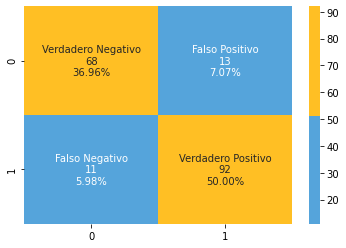

In [236]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

y_prediction = model.predict(X_test_OH_sc)

y_prediction = np.where(y_prediction > 0.5, 1, 0)

cm = confusion_matrix(Y_test_OH,y_prediction)
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(Y_test_OH,y_prediction))